# Thermally Driven Bumblebee Nests

In [1]:
%matplotlib notebook



### Import relevant modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.ndimage as nd
#for polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#for data analysis
import statistics
import time
import random
import pandas as pd
import dataframe_image as dfi
import plotly
import plotly.express as px
# Pre-requisite - Import the writer class from the csv module
from csv import writer
import csv

### The functions used in the simulation

In [3]:
def label (x):
    x = round(x, 1)
    title_contents = [str(x), " %"]
    #join them together
    str_of_ints = ",". join(title_contents)
    #remove the commas to get a nice string
    str_of_ints = str_of_ints.replace(',', '')
    title = str(str_of_ints)
    return(title)


In [4]:
#a function "event monitor" that allows us to stop the animation without 
#needing to restart the kernel
def event_monitor(event):
    if event.key == 'escape':
        anim.event_source.stop()

In [5]:
#function that returns a value representing the percentage of the simulation the nest was in the optimum temp range
def nest_success (nest_temperature):
    nest_temperature_copy = []
    #total number of temperatures we have
    a = len(nest_temperature)

    for i in nest_temperature:
        #if the temperature value is within the optimum bounds, we add it to our new array
        if i <= 33 and i >= 27:  #CHANGE BACK TO 31 IF NEEDED
            nest_temperature_copy.append(i)
    #how many iterations the nest was in optimum range
    b = len(nest_temperature_copy)

    #the percentage of iterations nest was between optimum values
    c = ((b/a))*100
    
    return(c)
    

In [6]:

def energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph):

    #plot energy delivered to nest with energy delivered to honeypot
    #plt.figure()

    b = np.zeros(len(energy_taken))

    for i in range (len(energy_taken)):
        if i == 0:
            b[i] = energy_taken[i]
        else:
            b[i] = (energy_taken[i] + b[i-1])

    #creates a string from 0, 1, 2... total_it - 1 
    x = np.linspace(0, (total_it-1), total_it)
    an_array = np.array(x)
    #x = an_array * time_step

    fig,ax = plt.subplots()
    # make a plot
    ax.plot(x, b, color="black")
    # set x-axis label
    ax.set_xlabel("Time (hr)",fontsize=18)
    # set y-axis label
    ax.set_ylabel("Cumulative Energy Foraged (J)",color="black",fontsize=18)
    #how many ticks on x and y axis
    plt.locator_params(axis='y', nbins=5)
    plt.locator_params(axis='x', nbins=5)
    #sets font size of the ticks on the axes

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(x, honeypot, color="red")
    ax2.set_ylabel("Honeypot Energy (J)",color="red",fontsize=18)
    #ylabels = (0, 200, 400)
    #how many numbers on y axis
    plt.locator_params(axis='y', nbins=4)
    #ax2.set_yticklabels(ylabels, fontsize=18)
    #sets font size of the numbers on the axis
    ax2.tick_params(axis="y", labelsize=18)
    ax.tick_params(labelsize=18)
    
    plt.title(graph_title)
    #current time
    timestr = time.strftime("%Y%m%d-%H%M%S")
    file_title = timestr + graph
    plt.savefig(file_title, bbox_inches='tight')



In [7]:
#function that generates a title for a graph including h value, number of bees and number of flowers used to generate it

def g_title(graph, h, n_bees, n_flowers):
   
    #the string that we want
    title = [str(graph), ": h = ", str(h), " no. bees = ", str(n_bees), " no_flowers = ", str(n_flowers)]
    #join them together
    str_of_ints = ",". join(title)
    #remove the commas to get a nice string
    str_of_ints = str_of_ints.replace(',', '')
    str_of_ints = str(str_of_ints)
    return(str_of_ints)

In [8]:
# #function that generates a title for a graph including h value, number of bees and number of flowers used to generate it

# def f_title(graph):
   
    
#     timestr = time.strftime("%Y%m%d-%H%M%S")
#     z = timestr + graph

# #     h = str(h)
# #     h = h.replace('.', ';')
# #     #the string that we want
# #     title = [str(graph), ": h = ", str(h), " no. bees = ", str(n_bees), " no_flowers = ", str(n_flowers)]
# #     #join them together
# #     str_of_ints = ",". join(title)
# #     #remove the commas to get a nice string
# #     str_of_ints = str_of_ints.replace(',', '')
# #     str_of_ints = str(str_of_ints)
# #     return(str_of_ints)
#     return z

In [9]:
#this function is used to plot single strings of data from the simulation (i.e. only 1 honeypot, only 1 array holding bee number)
def plot(y, xlabel, ylabel, graph_title, file_title):
    
    
    
 
    #creates a string from 0, 1, 2... total_it - 1 
    x = np.linspace(0, (total_it-1), total_it)
   
    an_array = np.array(x)
    #ensures x axis gives us the time in seconds rather than iterations
    #x = an_array * time_step
        
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(graph_title)
    
    plt.savefig(file_title, bbox_inches='tight')
    #let's not show graphs, but try saving them
    #plt.show()

In [10]:

#function that converts list containg our label into a string
def f_title(totc):
    #total available foraging hours for each walker
    #18 days, each with 14 hours day light, minus one as first iteration is mandated incubator
    totf = (18*14) -1
    
    
    
    totcp = round(((totc/totf)*100), 2)
    totclabel = ["n = ", str(totc), " (", str(totcp), " %)"]

    
    #join them together
    str_of_ints = ",". join(totclabel)
    #remove the commas to get a nice string
    str_of_ints = str_of_ints.replace(',', '')
    label = str(str_of_ints)
   

    return label

In [11]:
#function that generates a title for a graph including h value, number of bees and number of flowers used to generate it

def title(graph, h, n_bees, n_flowers):
   
    #the string that we want
    title = [str(graph), ": h = ", str(h), " no. bees = ", str(n_bees), " no_flowers = ", str(n_flowers)]
    #join them together
    str_of_ints = ",". join(title)
    #remove the commas to get a nice string
    str_of_ints = str_of_ints.replace(',', '')
    return(str_of_ints)

In [12]:
#this function is used to plot the energy of each walker against time

#arguments: walker_energy dictionary, the total number of iterations "update" function went though, and the labels for x and 
#y axes
def plot_walker_energy(walker_energy, total_it, xlabel, ylabel):#total_it, it, y, xlabel, ylabel):
   #for each walker
    for i in walker_energy:
        #the number of iterations a given walker went through
        it = len(walker_energy[i])
       

        #if a walker has been alive since the the first iteration
        if it == total_it:
            #x values are time
            x = np.linspace(0, (it-1), it)
            #y values are walker energy
            y = walker_energy[i]
        #if walker born later in the simulation
        else:
            #time before walker born
            prenatal_t = total_it - it
            #x values before bee born
            x_prenatal = np.linspace(0, (prenatal_t - 1), prenatal_t)
            #y values before bee born (i.e 0)
            y_prenatal = np.zeros(len(x_prenatal))
            #x values after bee born
            x_postnatal = np.linspace(prenatal_t, (total_it - 1), it)
            #all x values
            y_postnatal = walker_energy[i]
            #all x values
            x = np.concatenate([x_prenatal,  x_postnatal])
            #all y values
            y = np.concatenate([y_prenatal,  y_postnatal])
        
        #comment out plt.figure to have all bee energyes plotted on one graph
        #plt.figure()
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
      

In [13]:

#function to make a new flower
def new_flower():
    #we will make the ath flower (a-1 flowers already exist)
    a = len(flowers)
    #select the ath x coordinate from the list
    x = flower_x[a]
    #select the ath y coordinate from the list
    y = flower_y[a]
    
    #makes the a th bee
    flowers['flower_{}'.format(a)] = Flower(x,y)
    flower_energy['flower_{}_energy'.format(a)] = []


In [14]:
#a function to make a new walker
def new_walker():
    #how many bees we already have, -1
    #a = len(walkers)
    global walker_tally
    a = walker_tally
    #makes the a th bee
    walkers['walker_{}'.format(a)] = Walker(nest_x, nest_y)
    
    walkers_copy['walker_{}'.format(a)] = Walker(nest_x, nest_y)
    
    walker_energy['walker_{}_energy'.format(a)] = []
    #walker_life['walker_{}_life'.format(a)] = []
    #print(walker_tally)
    walker_tally += 1
   
    
 

In [15]:
#a function to make a new walker
def new_larva():
    #how many bees we already have, -1
    #a = len(walkers)
    global larva_tally
    a = larva_tally
    #makes the a th bee
    larvae['larva_{}'.format(a)] = Larva(nest_x, nest_y)
    
#     _copy['walker_{}'.format(a)] = Walker(nest_x, nest_y)
    
#     walker_energy['walker_{}_energy'.format(a)] = []
    #walker_life['walker_{}_life'.format(a)] = []
    #print(walker_tally)
    larva_tally += 1
   

### Classes i.e. the instructions for a walker, a flower, the nest, the surroundings

In [16]:
class Surroundings:
    
    instances = []
    def __init__(self):
        Surroundings.instances.append(self)
        #True if it is day, False if it is night
        self.daytime = True
        self.temperature  = 11.5#13
        #a counter to monitor the length of day/night
        self.daycounter = 0
        
    #a function that sets the temperature of the surroundings
    def surroundings_temperature(self):
        #if daytime
        if self.daytime == True:
                #it's a nice summer's day
            self.temperature = 11.5#13
            #if it's night time
        elif self.daytime == False:
                #a mild summer's night
            self.temperature = 0.9#4

    def day_counter(self):
        self.daycounter += 1


In [17]:
class Flower:
    
    instances = []
    def __init__(self, x, y):
        Flower.instances.append(self)
        #location of flower
        self.xy = np.array([x,y])
        self.id = len(flowers)
        self.energy = max_flower_energy
        self.pollen = max_pollen_energy
        self.nectar = max_nectar_energy
        
        #if flower is at full energy, no need to recharge, so recharge set to false
        self.recharge = False
        #a marker to tell bees if another bee has already been to the flower; false if flower untouched, true is flower
        #has already been visited
        self.beemarker = False
         #a counter to count how many iterations the flower is visited
        self.visit_counter = 0
        #this array will store the numbers of the bees that have visited this flower
        self.visitor_book = []
    
        

In [18]:
class Nest:
    
    instances = []
    def __init__(self, nest_x, nest_y):
        Nest.instances.append(self)
        self.xy = np.array([nest_x, nest_y])
        #nest temperature
        self.temperature = 31
        #the 'store' of energy where the bee delivers the energy it has collected
        #stores honey (nectar), used for heating, and short term growth
        self.honeypot = 0
        #stores pollen, used only for growth
        self.pollenpot = 0
        self.area = 0
        self.runningcosts = 0
    
    def nest_cool(self):
        #the current nest temperature
        T_t = self.temperature
        #the temp. of the environment
        T_env = surroundings.temperature
        #the heat transfer coefficient - CHANGE THIS FOR DIFFERENT SOILS
        h = - h_value
        #the surface area of heat loss
        #diameter of spherical nest, in cm
        #d = self.area
        #convert diameter in cm to area in m squared
        A = self.area# 4*np.pi*((d/200))**2
        
        #the rate of heat transfer out of the nest in one second
        Q = h*A*(T_t - T_env)*time_step
        #record energy change
        sum_q.append(Q)

        #convert the energy loss to a temperature loss using q = mc delta T
        deltaT = Q/(0.063*4200)
        #update nest temperature (multiply by how many seconds an iteration represents)
        self.temperature += deltaT#*time_step

        
        

In [19]:
 class Larva:
    
    instances = []
    def __init__(self, x, y):
        Larva.instances.append(self)
        self.xy = np.array([x, y])
        self.alive = True
        #walker id number
        self.id = larva_tally
        
        self.feedtally = 0
        
        #we will record how much then larvae needed to receive
        self.target_pollen = 0
        self.target_nectar = 0
        
        #record whether larvae has been fed or not
        self.pollenfed = False
        self.nectarfed = False
        
        #we will record whether larvae receive pollen, nectar or a supplement of the two
        self.pollen_diary = []
        self.nectar_diary = []
        #we will record how much pollen and nectar the larvae actually receives each iteration
        self.pollen = []
        self.nectar = []
        #record which iterations larvae is fed on
        self.pollen_time = []
        self.nectar_time = []
        

In [20]:
 class Walker:
    
    instances = []
    def __init__(self, x, y):
        Walker.instances.append(self)
        #gives the position of the walker
        self.xy = np.array([x, y])#np.array([np.random.randint(0, L), np.random.randint(0, L)])
        #true = bee alive, false = bee dead
        self.alive = True
        #walker id number
        self.id = walker_tally
        #when workers are made, their default is to be lazy incubators that stay in the nest
        self.job = "incubator"
        #a counter to record how many iterations the bee spends foraging
        self.foragingtime = 0
        
        #amount of pollen and nectar bee has foraged from a foraging trip
        self.pollen = 0
        self.nectar = 0
        
        #amount of pollen and nectar bee has foraged from a foraging trip
        self.totalpollen = 0
        self.totalnectar = 0
        self.total_nectar_foraged = 0
        self.total_pollen_foraged = 0
        #record worker's job throughout the simulation
        self.employment_register = []
        
        #records the iteration the walker was born
        self.birthday = counter
        #will record the iteration on which the walker dies
        self.deathday = total_it
        #records how long the walker was alive for
        self.life_timer = 0
        #records how long the walker was dead for
        self.death_timer = 0
        
        #a counter to counter the number of iterations of the simulation
        self.time_alltime = 0
        #a counter for the time spent at the flower
        self.time_flower = 0
        #a counter for the time spent at the nest
        self.time_nest = 0
        #a counter for the time spent flying
        self.time_flying = 0
        
        self.prop_on_nest = 0
        self.prop_on_flower = 0
        self.prop_in_flight = 0
        
        #we record how much pollen and nectar energy queen has eaten each iteration
        self.pollenmeal = []
        self.nectarmeal = []
        
        
        #initial walker energy
        self.energy = walker_life_energy
        #the intial target energy for the walker to obtain (5 more energy than it has to start with)
        self.targetenergy = walker_target_energy
        
        self.targetpollen = walker_target_pollen
        self.targetnectar = walker_target_nectar
        self.target = nest.xy
        self.walking = True
        
        #an array to hold the flowers the walker has visited
        self.flower_log = []
        
        #an array to hold the coordinates of the path taken by the walker
        self.walker_x_path = []
        self.walker_y_path = []
        

    def location_monitor(self):
        if self.alive == True:
            #for every iteration, we count
            self.time_alltime += 1
            #if walker is not moving
            if self.walking == False:   
                #if at the nest
                if np.array_equal(self.xy, nest.xy) == True:
                    self.time_nest += 1
                 #if not at nest and staionary, must be at a flower
                else:
                    self.time_flower += 1 
            if self.walking == True:
                self.time_flying +=1
    
    #calculates walker's next step towards target
    def step(self):
        if self.alive == True:
            if self.walking==True: 
                #the vector between the walker and the centre of mass
                vector = (self.target - self.xy)
                #the largest element of the magnitude of the vector

                z = np.max(np.abs(vector))
                #normalises vector
                vector = vector/z
                #sets elements of vector not 1 or -1 to 0
                for i in np.arange(np.size(vector)):
                    if np.abs(vector[i]) != 1:
                        vector[i] = 0

                #the step the walker ideally wants to take
                target_step = (self.xy + vector)%L

                #if taking this step will put walker on nest, don't worry about other walkers being on nest
                if np.array_equal(target_step, nest.xy) == True:
                    self.xy = target_step
                else:

                    #the current coordinates of the walker
                    x = self.xy[0]
                    y = self.xy[1]

                    #a list of the 8 possible steps the walker could make
                    step_options = [[x, y+1], [x, y-1], [x+1, y], [x-1,y], [x-1, y-1], [x-1, y+1], [x+1, y+1], [x+1, y-1]]
                    
                    
                    #DELETE THIS FOR LOOP SO THAT WALKERS CAN BE ON THE SAME SQUARE
                    for i in walkers:
                        for j in range(len(step_options)):
                            #if any of the walkers are at one of the positions this walker could step onto, remove that option
                            if np.array_equal(walkers[i].xy, step_options[j]) == True:
                                step_options[j] = float('inf')

#                     #THIS FOR LOOP ALLOWS WALKERS TO BE ON THE SAME SQUARE SO LONG AS IT IS NOT A FLOWER SQUARE            
#                     for i in walkers:
#                         for j in range(len(step_options)):
#                             for k in flowers:
#                                 #if any of the walkers are at one of the positions this walker could step onto
#                                 if np.array_equal(walkers[i].xy, step_options[j]) == True:
#                                     #if the position another walker is on is a flower
#                                     if np.array_equal(step_options[j], flowers[k]) == True:
#                                     #remove that option from the array of step options
#                                         step_options[j] = float('inf')
                                
                                
                                
                                
                    #search through the remaining step options
                    for i in range(len(step_options)):
                        #if the target step is still available, take it
                        if np.array_equal(target_step, step_options[i]) == True:
                            self.xy = target_step
                    #if walker can't take the ideal step
                    if np.array_equal(self.xy, target_step) == False:

                        #if the target_step isn't available, is the next closest step available?
                        if np.array_equal((vector + [1, 0]), step_options[i]) == True:
                             #one more step in the x direction of travel
                            self.xy = (vector + [1, 0])
                        elif np.array_equal((vector + [-1, 0]), step_options[i]) == True:
                             #one step against the x direction of travel
                            self.xy = (vector + [-1, 0])
                        elif np.array_equal((vector + [0, 1]), step_options[i]) == True:
                             #one more step in the y direction of travel
                            self.xy = (vector + [0, 1])
                        elif np.array_equal((vector + [0, -1]), step_options[i]) == True:
                            self.xy = (vector + [0, -1])
                        elif np.array_equal((vector + [1, 1]), step_options[i]) == True:
                            self.xy = (vector + [1, 1])
                        elif np.array_equal((vector + [1, -1]), step_options[i]) == True:
                            self.xy = (vector + [1, -1])
                        elif np.array_equal((vector + [-1, 1]), step_options[i]) == True:
                            self.xy = (vector + [-1, 1])
                        elif np.array_equal((vector + [-1, -1]), step_options[i]) == True:
                            self.xy = (vector + [-1, -1])




    def choose_target(self):
        #if alive
        if self.alive == True:
            #if in flight
            if self.walking == True:
                #if walker has target energy, go back to nest
                if self.energy >= self.targetenergy:
                    self.target == nest.xy
                #if not got enough energy, find a flower and get some!
                else:
                    #assume walker can see all flowers, and will choose the nearest flower
                    #creates an array of 0s: one for each flower
                    walker_flower_distance = np.zeros(len(flowers))
                    #for each flower in the list of flower
                    i_n = 0
                    for i in flowers:
                        #if flower has been visited by another bee
                        if flowers[i].beemarker == True:
                            #flower distance set in infinite (bee ignores it)
                            walker_flower_distance[i_n] = float('inf')
                            i_n += 1
                        else:
                            x = np.subtract(flowers[i].xy, self.xy)
                            y = np.hypot(x[0], x[1])
                            #the array stores the distances between the bee and the flowers
                            walker_flower_distance[i_n] = y
                            i_n += 1
                    #array of True and False: if all elemenets are inf, all elements will be True
                    b = np.isinf(walker_flower_distance)        
                    #if all flowers have been visited by a beee
                    if np.all(b == True):
                        #go the nest
                        self.target = nest.xy
                    #else go to nearest flower with energy
                    else:
                        #a is the index of the closest flower
                        a = np.argmin(walker_flower_distance)
                        #so the target is the nearest flower
                        flower_index = 0
                        for i in flowers:
                            if a == flower_index:
                                self.target = flowers[i].xy
                                self.walking = True
                                flower_index += 1
                            else:
                                flower_index += 1
                    #if walker at nest or flower
            elif self.walking == False:
                #if at the nest
                if np.array_equal(self.xy, nest.xy) == True:
                    #if bee energy less than a given amount, walker chooses a flower to go to
                    if self.energy <= walker_life_energy:
                        if nest.honeypot <= honeypot_energy_store:
                                #creates an array of 0s: one for each flower
                            walker_flower_distance = np.zeros(len(flowers))
                            #for each flower in the list of flower
                            i_n = 0
                            for i in flowers:
                                #if flower has been visited by another bee
                                if flowers[i].beemarker == True:
                                    #flower distance set in infinite (bee ignores it)
                                    walker_flower_distance[i_n] = float('inf')
                                    i_n += 1
                                else:
                                    x = np.subtract(flowers[i].xy, self.xy)
                                    y = np.hypot(x[0], x[1])
                                    #the array stores the distances between the bee and the flowers
                                    walker_flower_distance[i_n] = y
                                    i_n += 1
                            #array of True and False: if all elemenets are inf, all elements will be True
                            b = np.isinf(walker_flower_distance)        
                            #if all flowers have been visited by a beee
                            if np.all(b == True):
                                #go the nest
                                self.target = nest.xy
                            #else go to nearest flower with energy
                            else:
                                #a is the index of the closest flower
                                a = np.argmin(walker_flower_distance)
                                #so the target is the nearest flower

                                flower_index = 0
                                for i in flowers:
                                    if a == flower_index:
                                        self.target = flowers[i].xy
                                        self.walking = True
                                        flower_index += 1
                                    else:
                                        flower_index += 1

                        #if walker is at a flower
                elif np.array_equal(self.xy, nest.xy) == False:
                           #find flower walker is at

                    for i in flowers:
                            if np.array_equal(self.xy, flowers[i].xy) == True:
                                #if flower has energy left to give, stay at flower
                                if flowers[i].energy > 0:
                                    self.walking = False
                                #if flower all out of energy
                                else:
                                    #if you've got your target energy, go back to nest
                                    if self.energy >= self.targetenergy:
                                        self.target == [9, 5]#nest.xy
                                        self.walking = True
                                    #if not, choose another flower
                                    else:

                                        #creates an array of 0s: one for each flower
                                        walker_flower_distance = np.zeros(len(flowers))
                                        #for each flower in the list of flower
                                        i_n = 0
                                        for i in flowers:
                                            #if flower has been visited by another bee
                                            if flowers[i].beemarker == True:
                                                #flower distance set in infinite (bee ignores it)
                                                walker_flower_distance[i_n] = float('inf')
                                                i_n += 1
                                            else:
                                                x = np.subtract(flowers[i].xy, self.xy)
                                                y = np.hypot(x[0], x[1])
                                                #the array stores the distances between the bee and the flowers
                                                walker_flower_distance[i_n] = y
                                                i_n += 1
                                        #array of True and False: if all elemenets are inf, all elements will be True
                                        b = np.isinf(walker_flower_distance)        
                                        #if all flowers have been visited by a beee
                                        if np.all(b == True):
                                            #go the nest
                                            self.target = nest.xy
                                            self.walking = True
                                            #else go to nearest flower with energy
                                        else:
                                                #a is the index of the closest flower
                                            a = np.argmin(walker_flower_distance)
                                            #so the target is the nearest flower
                                            flower_index = 0
                                            for i in flowers:
                                                if a == flower_index:
                                                    self.target = flowers[i].xy
                                                    self.walking = True
                                                    flower_index += 1
                                                else:
                                                    flower_index += 1








    def path_tracker(self):
        if self.alive == True:
            self.walker_x_path.append(self.xy[0])
            self.walker_y_path.append(self.xy[1])

    def life_monitor(self):
        if self.alive == True:
            self.life_timer += 1
        elif self.alive == False:
            self.death_timer += 1
        #if the walker has just died
        if self.death_timer == 1:
            self.deathday = counter
            
    def walker_energy(self):
        if self.energy <= 0:
            self.alive = False
        
        if self.alive == True:
            #if walking
            if self.walking == True:
                #lose 1 energy
                self.energy -= energy_loss_in_flight
                #add energy lost to your target energy
                self.targetenergy += energy_loss_in_flight
            #if stationary, on flower or nest
            elif self.walking == False:
                #walker loses energy just existing
                self.energy -= energy_loss_at_rest
                self.targetenergy += energy_loss_at_rest
        

        

### This function is used to create the simulation.


#### We iterate over this function, updating the lattice in which the flowers, walkers, nest and surroundings are stored

In [21]:
#a function to update the lattice i.e. generate the next step of the animation
def update():

    global feeding_iterations
    #go through the walkers
    tally_deleted_walkers = 0
    for i in walkers.copy():
        if walkers[i].alive == False:
            tally_deleted_walkers += 1

            del walkers[i]
            
    tally_dead_walkers.append(tally_deleted_walkers)
    
    lattice = np.zeros((L,L), dtype='uint8')
    #puts the nest in the lattice
    lattice[tuple(np.array([nest.xy]).astype('int').T)] = 1
    for i in flowers:
        #puts the flowers in the lattice
        lattice[tuple(np.array(flowers[i].xy).astype('int').T)] = 2
    #puts the walkers in the lattice
    for i in walkers:
        #if bee is alive, it is shown in the lattice
        if walkers[i].alive == True:
            lattice[tuple(np.array(walkers[i].xy).astype('int').T)] = 3
    
    #records number of bees and flowers in this iteration
    
    number_of_bees_list.append(len(walkers))
    
    number_of_flowers.append(len(flowers))
    nest_honeypot_array.append(nest.honeypot)
    nest_pollenpot_array.append(nest.pollenpot)

    total_pollen_foraged = 0
    total_nectar_foraged = 0

    for i in walkers:
        for j in walkers_copy:
            #if we are dealing with the same walker
            if walkers[i].id == walkers_copy[j].id:
                #update energy
                walkers[i].walker_energy()
                if walkers[i].alive == False:
                    walkers[i].life_monitor()
                    walkers_copy[j].deathday = walkers[i].deathday

                #walkers_copy[j].walker_energy()
                #records the target energy and time_alltime for each walker
                target_energy.append(walkers[i].targetenergy)
                stepcounter.append(walkers[i].time_alltime)
                
                
                #function that records where the walker is throughout the simulation
                walkers[i].location_monitor()
                #walkers_copy[j].location_monitor()

                #proportion of time on nest
                walkers[i].prop_on_nest = (walkers[i].time_nest)/(walkers[i].time_alltime)
                #walkers_copy[j].prop_on_nest = (walkers[i].time_nest)/(walkers[i].time_alltime)
                
                #proportion of time on flower
                walkers[i].prop_on_flower = (walkers[i].time_flower)/(walkers[i].time_alltime)
                #walkers_copy[j].prop_on_flower = (walkers[i].time_flower)/(walkers[i].time_alltime)
                
                #proportion of time in flight
                walkers[i].prop_in_flight = (walkers[i].time_flying)/(walkers[i].time_alltime)
                #walkers_copy[j].prop_in_flight = (walkers[i].time_flying)/(walkers[i].time_alltime)

                #records path taken by walker
                walkers[i].path_tracker()
                #walkers_copy[j].path_tracker()
                
                #walker chooses its target
               # walkers[i].choose_target()
                #walkers_copy[j].choose_target()
#                 if walkers[i].job == "incubator":
#                     walkers[i].employment_register.append(0)
#                 elif walkers[i].job == "forager":
#                     walkers[i].employment_register.append(1)
                    
#                 if walkers_copy[j].job == "incubator":
#                     walkers_copy[j].employment_register.append(0)
#                 elif walkers_copy[j].job == "forager":
#                     walkers_copy[j].employment_register.append(1)
               
   

    
    #adds the walker energy to a dictionary entry to we can plot walker energy against time
    #a counter so that the correct walker energy is assigned to the corrent walker energy array
    i_n = 0
    j_n = 0                    
    for i in walkers:
        for j in walker_energy:
            #walker 1 energy must be added to walker 1 energy list
            if i_n == j_n:
                walker_energy[j].append(walkers[i].energy)
            j_n += 1
        i_n += 1
        j_n = 0
    
    
    
    
    #adds the flower energy to a dictionary entry to we can plot flower energy against time
    #a counter so that the correct flower energy is assigned to the corrent flower energy array
    i_n = 0
    j_n = 0
    for i in flowers:
        for j in flower_energy:
            j_n += 1
            #walker 1 energy must be added to walker 1 energy list
            if i_n == j_n:
                flower_energy[j].append(flowers[i].energy)   
            j_n += 1
        i_n += 1
        j_n = 0
    
    
    
    energy_taken_this_iteration = []
    nectar_taken_this_iteration = []
    pollen_taken_this_iteration = []
    
    
    #we record data at the start of the simulation, for plotting and analysis
    
    nest_temperature.append(nest.temperature)
    honeypot.append(nest.honeypot)
  
   
    
    

    
    #if it's day
    if surroundings.daytime == True:
        #if we've done day hours
        if surroundings.daycounter == day_length_it:
            #change to night
            surroundings.daytime = False
            surroundings.daycounter = 0
      
        #if it's night
    elif surroundings.daytime == False:
        #if we've reached the end of night
        if surroundings.daycounter == night_length_it: 
       
            #change to day
            surroundings.daytime = True
            surroundings.daycounter = 0

    
      
    nest.nest_cool()
    #print(nest.temperature)
    #nest.nest_incubate()
    
    daytime = 'daytime'
    if surroundings.daytime == True:
        daytime = "Day"
    else:
        daytime = "Night"
    
   

#     for i in flowers:
#         #if it's night
#         if surroundings.daytime == False: 
#             if flowers[i].recharge == True:
#                 if flowers[i].pollen < max_pollen_energy:
#             #flower is recharged
#                     flowers[i].pollen == max_pollen_energy# += flower_energy_loss_per_iteration
#                 elif flowers[i].nectar < max_nectar_energy:
#                     flowers[i].nectar == max_nectar_energy
#                 else:
#                     flowers[i].recharge = False

    #for each new hour, each larvae is set to needing to be fed again             
    for l in larvae: 
      
        
        larvae[l].pollenfed = False
        larvae[l].nectarfed = False
        
     
        


    
       
                    
    #if it's daytime
    if surroundings.daytime == True:
        #surrounding temp set to night temp
        surroundings.surroundings_temperature()

       
        for i in walkers:
            for j in walkers_copy:
                if walkers[i].id == walkers_copy[j].id:

                    
                    #if we are at the first iteration of the 4th day (96th hour, though may need 95th iteration as it starts at 0, not 1)
                    
                    
                    #if an incubator, you feed and heat the nest! (therefore assign as forager at the end)
                    if walkers[i].job == "incubator":
                        walkers[i].employment_register.append(0)
                        
                        
                      
                        
                        #if nest too hot
                        if nest.temperature >33:
                            #if there is enough nectar to use for heating
                            if nest.honeypot >= worker_fanning_energy:
                                #worker uses energy from honeypot to fan the brood
                                nest.honeypot -= worker_fanning_energy
                                #nest loses 1 energy via cooling from fanning
                                nest.temperature -= nest_cooling_amount
                                #record how much energy bee uses to cool nest
                                nest.runningcosts += worker_fanning_energy
                            else:
                                #bee tasked to find nectar
                                walkers[i].job = "forager"
                                walkers[i].targetnectar = flowernectarhour
                                walkers[i].targetpollen = flowerpollenhour
                        
            
                        #if nest too cool
                        if nest.temperature < 31:
                            if nest.honeypot >= worker_incubating_energy:
                        
                                #wworker uses energy from honeypot to warm the brood
                                nest.honeypot -= worker_incubating_energy
                                #nest gains 1 energy from non-flight thermogenesis from worker
                                nest.temperature += nest_warming_amount  
                                
                                #record how much energy bee uses to heat nest
                                nest.runningcosts += worker_incubating_energy
                            else:
                                #bee tasked to find nectar
                                walkers[i].job = "forager"
                                walkers[i].targetnectar = flowernectarhour
                                walkers[i].targetpollen = flowerpollenhour
                                
                            
                            
                           #if larvae not feeding yet
                        if counter < 97:
                            for l in larvae:
                                #larvae not fed anything as haven't hatched yet!
                                larvae[l].pollen.append(0)
                                larvae[l].nectar.append(0)
                                #record the iteration this feed amount applies too
                                larvae[l].pollen_time.append(counter)
                                larvae[l].nectar_time.append(counter)
                        elif counter >= 97:

                            #energy needed to feed the larvae each hour
                            #feed_per_hour = n_larvae*(larv_per_day/24)

                                #feeding_iterations += 1
                                #for each of the larvae
                                for l in larvae: 

                                    #if the larvae hasn't been fed in this hour
                                    if larvae[l].pollenfed == False or larvae[l].nectarfed == False:


                                        #if this walker is in the nest, so able to feed the larvae


                                        #larvae have pollen and nectar requirements
                                        #per day 170-680 J pollen needed.  Divide by 24 to get per hour  7.08 - 28.3 J from pollen)
                                        #per dat beed 408-1020 J nectar.  Per hour this is 17-42.5 J from nectar)

                                        #let's choose a random amount of pollen between the upper and lower bounds
                                        #we use an integer for simplicity
                                        pollenfeed = random.randint(6, 24)
                                        nectarfeed = random.randint(17, 42)
                                        larvae[l].target_pollen += pollenfeed
                                        larvae[l].target_nectar += nectarfeed

                                        if larvae[l].pollenfed == False:
                                            #if there is enough pollen ato feed our larva, then we feed it
                                            if nest.pollenpot >= pollenfeed:


                                                nest.pollenpot -= pollenfeed
                                                larvae[l].pollen_diary.append(1)
                                                larvae[l].pollen.append(pollenfeed)
                                                larvae[l].pollen_time.append(counter)
                                                larv_cost.append(pollenfeed)#n_larvae*(larv_per_day/24))
                                                larvae[l].pollenfed = True
                                                larvae[l].feedtally += 1


                                            #if not enough pollen,we top up with nectar this time, but have to go and forage for pollen
                                            else:
    
                                                walkers[i].job = "forager"
                                                walkers[i].targetnectar = flowernectarhour
                                                walkers[i].targetpollen = flowerpollenhour
                                                #record larvae had nothing to eat
                                                larvae[l].pollen.append(0)
                                                larvae[l].pollen_time.append(counter)

                                        if larvae[l].nectarfed == False:

                                            #we do the same for nectar
                                            if nest.honeypot >= nectarfeed:
                                                nest.honeypot -= nectarfeed
                                                larvae[l].nectar_diary.append(2)
                                                larv_cost.append(nectarfeed)
                                                larvae[l].nectar.append(nectarfeed)
                                                
                                                larvae[l].nectar_time.append(counter)
                                                larvae[l].nectarfed = True
                                                larvae[l].feedtally += 1

                                                walkers[i].job = "forager"
                                                walkers[i].targetnectar = flowernectarhour
                                                walkers[i].targetpollen = flowerpollenhour
                                             #if no nectar, go and forage some!
                                            else:
    
                                                walkers[i].job = "forager"
                                                walkers[i].targetnectar = flowernectarhour
                                                walkers[i].targetpollen = flowerpollenhour
                                                #record larvae had nothing to eat
                                                larvae[l].nectar.append(0)
                                                larvae[l].nectar_time.append(counter)
                                                




            #done on every iteration, not just counter > 96

                
                    #if walker is foraging
                    elif walkers[i].job == "forager":
                        walkers[i].employment_register.append(1)
                   
                        #tally how many iterations bee has been foraging
                        walkers[i].foragingtime += 1
                        
                        #IF BEE HAS REACHED THE FLOWER
                        if flower_distance == walkers[i].foragingtime:
                            
                            

                            #a tally of how much energy is available in environment
                            total_e_foraged = 0


                            #tally of flowers visited
                            flowers_visited = 0
                            #go through each flower


                             #if foraging for nectar, bee takes both pollen and nectar
                            if walkers[i].total_nectar_foraged < walkers[i].targetnectar:
                                #but bee only takes pollen/nectar if it hasn't alreayd done in this iteration
                                if walkers[i].total_nectar_foraged == 0:

                                    walkers[i].total_nectar_foraged += flowernectarhour
                                if walkers[i].total_pollen_foraged == 0:

                                    walkers[i].total_pollen_foraged +=  flowerpollenhour




                            #bee takes both pollen and nectar in it's hour of foraging, even if it only needs one
                            #if our bee hasn't foraged enough yet
                            if walkers[i].total_pollen_foraged < walkers[i].targetpollen:

                                 #but bee only takes pollen/nectar if it hasn't alreayd done in this iteration
                                if walkers[i].total_nectar_foraged == 0:

                                    walkers[i].total_nectar_foraged += flowernectarhour
                                if walkers[i].total_pollen_foraged == 0:

                                    walkers[i].total_pollen_foraged +=  flowerpollenhour

                                #total_pollen_foraged +=   flowerpollenhour
                                #total_nectar_foraged += flowernectarhour
                                #marker each flower whose energy we are taking as having been visted
                                   #record energy taken this iteration for this walker
                            energy_taken_this_iteration.append(walkers[i].total_nectar_foraged)
                            energy_taken_this_iteration.append(walkers[i].total_pollen_foraged)


                            nectar_taken_this_iteration.append(walkers[i].total_nectar_foraged)
                            pollen_taken_this_iteration.append(walkers[i].total_pollen_foraged)






                            #bee gains this energy it has foraged
                            walkers[i].pollen += walkers[i].total_pollen_foraged
                            walkers[i].nectar += walkers[i].total_nectar_foraged


                            #we record total amount of pollen and nectar foraged throughout the simulation
                            walkers[i].totalpollen += walkers[i].total_pollen_foraged
                            walkers[i].totalnectar += walkers[i].total_nectar_foraged

                            #energy bee has lost foraging is a function of the number of flowers visited
                            #times by 0 as currently we are saying no energy lost in flight
                            e_lost_foraging = flowers_visited*0

                            #walker loses the energy it spent foraging
                            walkers[i].energy -= e_lost_foraging

                            
                            #print("Flower distance", flower_distance, "walker foraging time:", walkers[i].foragingtime)
                      


                            #if bee has foraged enough, it will be set back to an incubator

                            #if bee was foraging pollen
                            if walkers[i].total_pollen_foraged >= walkers[i].targetpollen:
                                #walker puts everything it has forgaed itno the correct pots
                                if walkers[i].nectar > 0:
                                    nest.honeypot += walkers[i].nectar
                                    walkers[i].nectar = 0

                                if walkers[i].pollen > 0:
                                    nest.pollenpot += walkers[i].pollen
                                    walkers[i].pollen = 0

                         
                                 #once a walker is set back to incubator, it's foraging time counter is reset to 0
                                walkers[i].foragingtime = 0
                                walkers[i].total_pollen_foraged = 0

                            #of walker was foraging nectar
                            if total_nectar_foraged >= walkers[i].targetnectar:
                                 #walker puts everything it has forgaed itno the correct pots
                                if walkers[i].pollen > 0:
                                    nest.pollenpot += walkers[i].pollen
                                    walkers[i].pollen = 0

                                if walkers[i].nectar > 0:
                                    nest.honeypot += walkers[i].nectar
                                    walkers[i].nectar = 0



                                
                                #once a walker is set back to incubator, it's foraging time counter is reset to 0
                                walkers[i].foragingtime = 0
                                walkers[i].total_nectar_foraged = 0
                                
                        walkers[i].job = "incubator"
                
                    
                        
                        
                        
                    #OLD CODE WERE HERE

    #else, if it is night (which it must be, unless perhaps there is a solar eclipse on)
    elif surroundings.daytime == False:

       
        #surrounding temp set to night temp
        surroundings.surroundings_temperature()
           
          #all flowers set to recharge
        for k in flowers:
            #all flowers set to recharge
            flowers[k].recharge = True
            #all flowers set as unvisited
            flowers[k].beemarker = False
        
                #if we are at the first iteration of the 4th day (96th hour, though may need 95th iteration as it starts at 0, not 1)
        
        
        
        for i in walkers:
            for j in walkers_copy:
                if walkers[i].id == walkers_copy[j].id:
                    
        #if this is the first iteration of night
                    #if surroundings.daycounter == 0:
                        
                    if walkers[i].job == "forager":
                        walkers[i].employment_register.append(1)
                  
                        
                        #walker puts everything it has forgaed itno the correct pots
                        if walkers[i].nectar > 0:
                            nest.honeypot += walkers[i].nectar
                            walkers[i].nectar = 0

                        if walkers[i].pollen > 0:
                            nest.pollenpot += walkers[i].pollen
                            walkers[i].pollen = 0
                         #once a walker is set back to incubator, it's foraging time counter is reset to 0
                        walkers[i].foragingtime = 0
                        walkers[i].total_pollen_foraged = 0
                        walkers[i].job = "incubator"


                    if walkers[i].job == "incubator":
                        walkers[i].employment_register.append(0)
                
                            #if nest too hot
                        if nest.temperature >33:
                            #if there is enough nectar to use for heating
                            if nest.honeypot >= worker_fanning_energy:
                                #worker uses energy from honeypot to fan the brood
                                nest.honeypot -= worker_fanning_energy
                                #nest loses 1 energy via cooling from fanning
                                nest.temperature -= nest_cooling_amount
                                #record how much energy bee uses to cool nest
                                nest.runningcosts += worker_fanning_energy



                        #if nest too cool
                        if nest.temperature < 31:
                            if nest.honeypot >= worker_incubating_energy:

                                #wworker uses energy from honeypot to warm the brood
                                nest.honeypot -= worker_incubating_energy
                                #nest gains 1 energy from non-flight thermogenesis from worker
                                nest.temperature += nest_warming_amount  

                                #record how much energy bee uses to heat nest
                                nest.runningcosts += worker_incubating_energy

                            #if larvae not feeding yet
                        if counter < 97:
                            for l in larvae:

                                larvae[l].pollen.append(0)
                                larvae[l].nectar.append(0)
                                larvae[l].pollen_time.append(counter)
                                larvae[l].nectar_time.append(counter)
                        
                        if counter >= 97:
                            #energy needed to feed the larvae each hour
                            #feed_per_hour = n_larvae*(larv_per_day/24)

                            feeding_iterations += 1
                            #for each of the larvae
                            for l in larvae: 
                                #if the larvae hasn't been fed in this hour
                                if larvae[l].pollenfed == False or larvae[l].nectarfed == False:
                                    #if this walker is in the nest, so able to feed the larvae


                                        #larvae have pollen and nectar requirements
                                        #per day 170-680 J pollen needed.  Divide by 24 to get per hour  7.08 - 28.3 J from pollen)
                                        #per dat beed 408-1020 J nectar.  Per hour this is 17-42.5 J from nectar)

                                        #let's choose a random amount of pollen between the upper and lower bounds
                                        #we use an integer for simplicity
                                        pollenfeed = random.randint(6, 24)
                                        nectarfeed = random.randint(17, 42)
                                        larvae[l].target_pollen += pollenfeed
                                        larvae[l].target_nectar += nectarfeed

                                        if larvae[l].pollenfed == False:
                                            #if there is enough pollen ato feed our larva, then we feed it
                                            if nest.pollenpot >= pollenfeed:


                                                nest.pollenpot -= pollenfeed
                                                larvae[l].pollen_diary.append(1)
                                                larvae[l].pollen.append(pollenfeed)
                                                larvae[l].pollen_time.append(counter)
                                                larv_cost.append(pollenfeed)#n_larvae*(larv_per_day/24))
                                                larvae[l].pollenfed = True
                                                larvae[l].feedtally += 1

                                            #if not enough pollen,we top up with nectar this time, but have to go and forage for pollen
                                            else:
                                                #record larvae had  nothing to eat
                                                larvae[l].pollen.append(0)
                                                larvae[l].pollen_time.append(counter)
                                   
#                                                 #pollen pot hasn't got enough in it so bee needs to forage!
#                                                 #if we are at the iteration before day
#                                                 if surroundings.daycounter == night_length_it -1:
#                                                     #walkers[i].job = "forager"
#                                                     walkers[i].targetpollen = flowerpollenhour
                                              

                                                    
                                        if larvae[l].nectarfed == False:
                                            #we do the same for nectar
                                            if nest.honeypot >= nectarfeed:
                                                nest.honeypot -= nectarfeed
                                                larvae[l].nectar_diary.append(2)
                                                larv_cost.append(nectarfeed)
                                                larvae[l].nectar.append(nectarfeed)
                                                larvae[l].nectar_time.append(counter)
                                                larvae[l].nectarfed = True
                                                larvae[l].feedtally += 1

                                             #if not enough nectar,we top up with pollen this time, but have to go and forage for nectar
                                            else:
                                                #record larvae had nothing to eat
                                                larvae[l].nectar.append(0)
                                                larvae[l].nectar_time.append(counter)
                                                  #if we are at the iteration before day
                                                #if surroundings.daycounter == night_length_it -1:
                                                    #pollen pot hasn't got enough in it so bee needs to forage!
                                                    #walkers[i].job = "forager"


                                                    #walkers[i].targetnectar = flowernectarhour
                                               


    pollen_foraged.append(total_pollen_foraged)
    nectar_foraged.append(total_nectar_foraged)
    energy_taken.append(sum(energy_taken_this_iteration))  
    nectar_taken.append(sum(nectar_taken_this_iteration))
    pollen_taken.append(sum(pollen_taken_this_iteration))
                
                 

                            #THESE NEED TO BE DONE AT THE START!!!!!
#     energy_taken.append(sum(energy_taken_this_iteration))
#     nest_temperature.append(nest.temperature)
#     honeypot.append(nest.honeypot)
#     pollen_foraged.append(total_pollen_foraged)
#     nectar_foraged.append(total_nectar_foraged)
    surroundings.day_counter()

                        
                    
    return lattice

## Experiments

In [75]:
#bees_array = [1,2,3]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]
bees_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
h_values = [0.17, 0.74, 1, 2, 4, 6, 8, 10]#, 1, 5]
#h_values = np.linspace(0, 20, 201)

#nest_areas = [0.002]
nest_areas = [0.003]#[0.0028]#[0.00785]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
travelling_it = [1]#, 10, 20]  
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []

nest_temps_array = []

bee_foraging_array = []
bee_employment_array = []

honeypot_energy_array = []
pollenpot_energy_array = []

#record pollen and nectar consumed each iteration by each worker
workers_nectar_consumed = []
workers_pollen_consumed = []

#record pollen and nectar consumed each iteration by each larvae

larvae_nectar_consumed = []
larvae_pollen_consumed = []

larvae_nectar_time = []
larvae_pollen_time = []




#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []

#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate dataframe

col_lar14 = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []



#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer

# flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
# flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


# flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
# flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]

# flowers_nectar_per_hour = [326.6964122]
# flowers_pollen_per_hour = [9787.072243]

# flowername = ["Sunflower"]
# flowername = ["Sunflower"]

flowers_nectar_per_hour = [9450]
flowers_pollen_per_hour = [3502.040816]

flowername = ["Oilseed Rape"]
flowername = ["Oilseed Rape"]



for y in h_values:   
       #for each flower
    for b in range(len(flowers_pollen_per_hour)):
        for z in bees_array:    #for each soil type


            flowerpollenhour =  flowers_pollen_per_hour[b]
            flowernectarhour =  flowers_nectar_per_hour[b]

            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578
                    nest_honeypot_array = []
                    nest_pollenpot_array = []



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    max_flower_energy = 0#360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    max_nectar_energy = 0#10000
                    max_pollen_energy = 0#10000
                    #max_flower_energy = (746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    #array to store wheter a bee is incubating (0) or foraging (1)
                    bee_foraging = []
                    
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment
                    nest_temps_array.append(nest_temperature)
                    bee_foraging_array.append(bee_foraging)
                    honeypot_energy_array.append(nest_honeypot_array)
                    pollenpot_energy_array.append(nest_pollenpot_array)

                    for i in walkers:

                        #total nectar and pollen brought into the nest
                        total_pollen.append(walkers[i].totalpollen)
                        total_nectar.append(walkers[i].totalnectar)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)
                        bee_employment_array.append(walkers[i].employment_register)
                        workers_nectar_consumed.append(walkers[i].nectarmeal)
                        workers_pollen_consumed.append(walkers[i].pollenmeal)
                        

                        

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            
                            
                            #nectar and pollen consumed per iteration
                            larvae_nectar_consumed.append(larvae[l].nectar)
                            larvae_pollen_consumed.append(larvae[l].pollen)
                            
                            larvae_nectar_time.append(larvae[l].nectar_time)
                            larvae_pollen_time.append(larvae[l].pollen_time)

                            
                            #total amount of nectar and pollen consumed through the simulation
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    col10.append((sum(energy_taken))/1000)


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

#datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

#datatable.to_csv("Data1_09_02_2022.csv")
#lar_datatable.to_csv("Lar_data1_09_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)



In [76]:
print(h_values)

[0.17, 0.74, 1, 2, 4, 6, 8, 10]


<IPython.core.display.Javascript object>


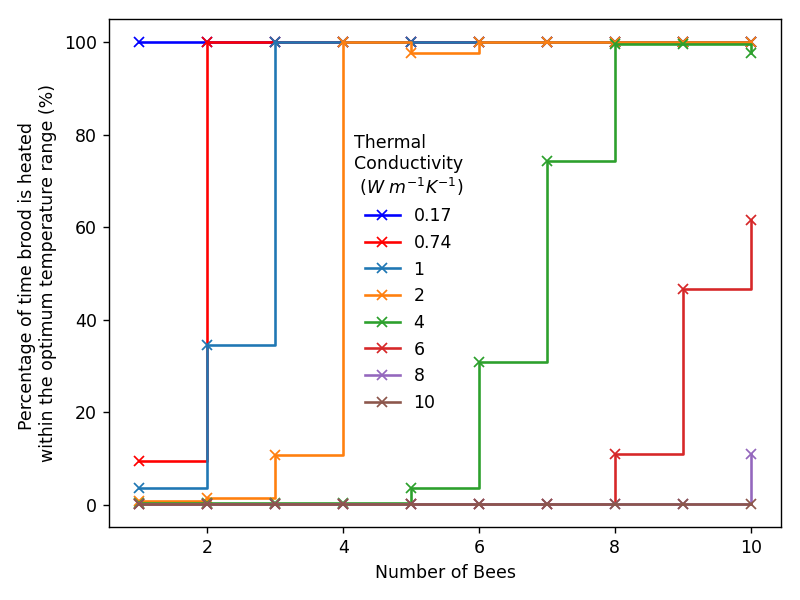

In [97]:

#datatable = pd.read_csv(r"C:\Users\jakef\Desktop\Jupyter Notebooks\Data4.csv", sep = ',')

#fig = px.line(datatable, x="Number of Bees", y="Nest Success (%)", color="Thermal Conductivity", labels={
 #                    "Number of Bees": "Number of Bees",
  #                   "Nest Success (%)": "Nest Success (%)", "Thermal Conductivity": "Thermal<br> Conductivity <br> (W m<sup>-1</sup>K<sup>-1</sup>)"})
dt = datatable

fig, ax = plt.subplots()

#ax2 = ax1.twiny()

#clay
ax.step(dt["Number of Bees"].iloc[0:10], dt["Nest Success (%)"].iloc[0:10], "bx-", where = "post")
ax.step(dt["Number of Bees"].iloc[10:20], dt["Nest Success (%)"].iloc[10:20], "rx-", where = "post")
ax.step(dt["Number of Bees"].iloc[20:30], dt["Nest Success (%)"].iloc[20:30], "x-", where = "post")
ax.step(dt["Number of Bees"].iloc[30:40], dt["Nest Success (%)"].iloc[30:40], "x-", where = "post")
ax.step(dt["Number of Bees"].iloc[40:50], dt["Nest Success (%)"].iloc[40:50], "x-", where = "post")
ax.step(dt["Number of Bees"].iloc[50:60], dt["Nest Success (%)"].iloc[50:60], "x-", where = "post")
ax.step(dt["Number of Bees"].iloc[60:70], dt["Nest Success (%)"].iloc[60:70], "x-", where = "post")
ax.step(dt["Number of Bees"].iloc[70:80], dt["Nest Success (%)"].iloc[70:80], "x-", where = "post")
ax.step(dt["Number of Bees"].iloc[80:90], dt["Nest Success (%)"].iloc[80:90], "x-", where = "post")


ax.set_xlabel("Number of Bees")
ax.set_ylabel("Percentage of time brood is heated \nwithin the optimum temperature range (%)")
#ax.yaxis.set_label_coords(-0.18,0.4)
#plt.legend(["0.08", "0.17 (Clay)", "0.50 (Sandy Loam)", "0.67 (Sandy Clay Loam)", "0.74 (Loam)", "3.85", "10", "20"],  title="Thermal \nConductivity\n ($W$ $m^{-1}K^{-1}$)", frameon = False)
#plt.legend(["0.08", "0.17", "0.50", "0.67", "0.74", "3.85", "10", "20"],  title="Thermal \nConductivity\n ($W$ $m^{-1}K^{-1}$)", frameon = False)
plt.tight_layout()
#plt.xlim([0, 8])

#fig.show()

# fig = px.line(datatable, x="Thermal Conductivity", y="Nest Success (%)", color='Flower', labels={
#                      "Thermal Conductivity": "Thermal Conductivity (W m<sup>-1</sup>K<sup>-1</sup>)",
#                      "Nest Success (%)": "Nest Success (%)"})
plt.legend(h_values, title="Thermal \nConductivity\n ($W$ $m^{-1}K^{-1}$)", frameon = False, bbox_to_anchor = [0.55,0.5])
# fig.show()
plt.savefig("stepped x ptot vs no. bees, legend.svg", format = "svg", bbox_inches='tight')

### Figure 4a e to run nest for 18 days vs h value

In [ ]:
bees_array = [1]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]

# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
#h_values = [0.17, 0.50, 0.67, 0.74]#, 0.50, 0.67, 0.74, 3.85, 10, 20]#, 1, 5]
h_values = np.linspace(0, 1, 101)
#delete fir proper run
#h_values = np.linspace(0, 1, 11)

#nest_areas = [0.002]
nest_areas = [0.003]#[0.0028]#[0.00785]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
travelling_it = [1]#, 10, 20]  
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []

nest_temps_array = []

bee_foraging_array = []
bee_employment_array = []

honeypot_energy_array = []
pollenpot_energy_array = []

#record pollen and nectar consumed each iteration by each worker
workers_nectar_consumed = []
workers_pollen_consumed = []

#record pollen and nectar consumed each iteration by each larvae

larvae_nectar_consumed = []
larvae_pollen_consumed = []

larvae_nectar_time = []
larvae_pollen_time = []

e_run_nest_18_days = []


#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []
col11 = []
col12 = []


#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate dataframe

col_lar14 = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []



#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer

# flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
# flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


# flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
# flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]

# flowers_nectar_per_hour = [326.6964122]
# flowers_pollen_per_hour = [9787.072243]

# flowername = ["Sunflower"]
# flowername = ["Sunflower"]

flowers_nectar_per_hour = [9450]
flowers_pollen_per_hour = [3502.040816]

flowername = ["Oilseed Rape"]
flowername = ["Oilseed Rape"]



        
for z in bees_array:    #for each soil type

    
    
  

        #for each flower
    for b in range(len(flowers_pollen_per_hour)):
        for y in h_values:
    



            flowerpollenhour =  flowers_pollen_per_hour[b]
            flowernectarhour =  flowers_nectar_per_hour[b]






            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578
                    nest_honeypot_array = []
                    nest_pollenpot_array = []



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    max_flower_energy = 0#360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    max_nectar_energy = 0#10000
                    max_pollen_energy = 0#10000
                    #max_flower_energy = (746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    #array to store wheter a bee is incubating (0) or foraging (1)
                    bee_foraging = []
                    
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []
                    
                    nectar_taken = []
                    nectar_taken_this_iteration = []
                    pollen_taken = []
                    pollen_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment
                    nest_temps_array.append(nest_temperature)
                    bee_foraging_array.append(bee_foraging)
                    honeypot_energy_array.append(nest_honeypot_array)
                    pollenpot_energy_array.append(nest_pollenpot_array)

                    for i in walkers:

                        #total nectar and pollen brought into the nest in kJ
                        total_pollen.append(walkers[i].totalpollen/1000)
                        total_nectar.append(walkers[i].totalnectar/1000)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)
                        bee_employment_array.append(walkers[i].employment_register)
                        workers_nectar_consumed.append(walkers[i].nectarmeal)
                        workers_pollen_consumed.append(walkers[i].pollenmeal)
                        

                        

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            
                            
                            #nectar and pollen consumed per iteration
                            larvae_nectar_consumed.append(larvae[l].nectar)
                            larvae_pollen_consumed.append(larvae[l].pollen)
                            
                            larvae_nectar_time.append(larvae[l].nectar_time)
                            larvae_pollen_time.append(larvae[l].pollen_time)

                            
                            #total amount of nectar and pollen consumed through the simulation
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    #col10.append((sum(energy_taken))/1000)
                    
                
                    #total amount of pollen and nectar foraged (kJ)
                    col11.append(sum(total_nectar))
                    col12.append(sum(total_pollen))
                    a = []
                    for i in range(len(total_nectar)):
                        
                        a.append(total_nectar[i] + total_pollen[i])
                    col10.append(sum(a))


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total nectar foraged": col11, "Total pollen foraged": col12, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

#datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

#datatable.to_csv("Data1_09_02_2022.csv")
#lar_datatable.to_csv("Lar_data1_09_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)


In [ ]:

title_contents = ["nest success and energy", "larvae= ", str(n_larvae), " no. bees = ", str(bees_array), " time = ", time.strftime("%Y%m%d-%H%M%S"), ".csv"]
#join them together
str_of_ints = ",". join(title_contents)
#remove the commas to get a nice string
str_of_ints = str_of_ints.replace(',', '')
title = str(str_of_ints)


#total energy needed to run nest for 18 days
with open(title, 'a', newline='') as f_object:  
    # Pass the CSV  file object to the writer() function
    writer_object = writer(f_object)

    writer_object.writerow(col5)  
    writer_object.writerow(col8)  

    # Close the file object
    f_object.close()




In [ ]:

#COL8 = ENERGY TO RUN THE NEST
#COL5 = NEST SUCCESS
#COL10 = TOTAL ENERGY FORAGED
#col11 = total nectar oraged
#col12 = total pollen foraged

h_values = np.linspace(0, 1, 101)
#total energy needed to run nest for 18 days

fig, ax = plt.subplots()

ax.plot(h_values, col5, "k--")


ax.set_xlabel("Soil Thermal Conductivity")
ax.set_ylabel("Percentage of time brood is heated\nwithin the optimum temperature range (%)")
plt.axvline(x=(0.17), color='b', linestyle = '--')
plt.axvline(x=(0.50), color='y', linestyle = '--')
plt.axvline(x=(0.67), color='g', linestyle = '--')
plt.axvline(x=(0.74), color='r', linestyle = '--')
plt.annotate('Clay\n(0.17)', xy = (0.2, 1000), xytext = (0.06, 12500),color = "b")
plt.annotate('Sandy\nLoam\n(0.50)', xy = (0.35, 111), xytext = (0.35, 12000),color = "y")
plt.annotate('Sandy\nClay\nLoam\n(0.67)', xy = (0.2, 111), xytext = (0.54, 11500),color = "g")
plt.annotate('Loam\n(0.74)', xy = (0.2, 111), xytext = (0.76, 13000), color = "r")

In [ ]:

#COL8 = ENERGY TO RUN THE NEST
#COL5 = NEST SUCCESS
#COL10 = TOTAL ENERGY FORAGED
#col11 = total nectar oraged
#col12 = total pollen foraged

h_values = np.linspace(0, 1, 101)
#total energy needed to run nest for 18 days

fig, ax = plt.subplots()

ax.plot(h_values, col11, "k--")
ax.plot(h_values, col12, "k:")
ax.plot(h_values, col10, "k-.")

ax.legend(["Nectar", "Pollen", "Total"])
ax.set_xlabel("Soil Thermal Conductivity")
ax.set_ylabel("Energy foraged over 18 day period (kJ)")
plt.axvline(x=(0.17), color='b', linestyle = '--')
plt.axvline(x=(0.50), color='y', linestyle = '--')
plt.axvline(x=(0.67), color='g', linestyle = '--')
plt.axvline(x=(0.74), color='r', linestyle = '--')
plt.annotate('Clay\n(0.17)', xy = (0.2, 1000), xytext = (0.06, 12500),color = "b")
plt.annotate('Sandy\nLoam\n(0.50)', xy = (0.35, 111), xytext = (0.35, 12000),color = "y")
plt.annotate('Sandy\nClay\nLoam\n(0.67)', xy = (0.2, 111), xytext = (0.54, 11500),color = "g")
plt.annotate('Loam\n(0.74)', xy = (0.2, 111), xytext = (0.76, 13000), color = "r")

#### Brood Temp vs Day, 4 different soils, standard conditions 

In [23]:
bees_array = [1]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]

# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
h_values = [0.17, 0.50, 0.67, 0.74]#, 0.50, 0.67, 0.74, 3.85, 10, 20]#, 1, 5]
#h_values = np.linspace(0, 20, 201)

#nest_areas = [0.002]
nest_areas = [0.003]#[0.0028]#[0.00785]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
travelling_it = [1]#, 10, 20]  
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []

nest_temps_array = []

bee_foraging_array = []
bee_employment_array = []

honeypot_energy_array = []
pollenpot_energy_array = []

#record pollen and nectar consumed each iteration by each worker
workers_nectar_consumed = []
workers_pollen_consumed = []

#record pollen and nectar consumed each iteration by each larvae

larvae_nectar_consumed = []
larvae_pollen_consumed = []

larvae_nectar_time = []
larvae_pollen_time = []




#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []

#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate dataframe

col_lar14 = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []



#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer

# flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
# flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


# flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
# flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]

# flowers_nectar_per_hour = [326.6964122]
# flowers_pollen_per_hour = [9787.072243]

# flowername = ["Sunflower"]
# flowername = ["Sunflower"]

flowers_nectar_per_hour = [9450]
flowers_pollen_per_hour = [3502.040816]

flowername = ["Oilseed Rape"]
flowername = ["Oilseed Rape"]



        
for z in bees_array:    #for each soil type

    
    
  

        #for each flower
    for b in range(len(flowers_pollen_per_hour)):
        for y in h_values:
    



            flowerpollenhour =  flowers_pollen_per_hour[b]
            flowernectarhour =  flowers_nectar_per_hour[b]






            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578
                    nest_honeypot_array = []
                    nest_pollenpot_array = []



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    max_flower_energy = 0#360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    max_nectar_energy = 0#10000
                    max_pollen_energy = 0#10000
                    #max_flower_energy = (746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    #array to store wheter a bee is incubating (0) or foraging (1)
                    bee_foraging = []
                    
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []
                    nectar_taken = []
                    nectar_taken_this_iteration = []
                    pollen_taken = []
                    pollen_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment
                    nest_temps_array.append(nest_temperature)
                    bee_foraging_array.append(bee_foraging)
                    honeypot_energy_array.append(nest_honeypot_array)
                    pollenpot_energy_array.append(nest_pollenpot_array)

                    for i in walkers:

                        #total nectar and pollen brought into the nest
                        total_pollen.append(walkers[i].totalpollen)
                        total_nectar.append(walkers[i].totalnectar)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)
                        bee_employment_array.append(walkers[i].employment_register)
                        workers_nectar_consumed.append(walkers[i].nectarmeal)
                        workers_pollen_consumed.append(walkers[i].pollenmeal)
                        

                        

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            
                            
                            #nectar and pollen consumed per iteration
                            larvae_nectar_consumed.append(larvae[l].nectar)
                            larvae_pollen_consumed.append(larvae[l].pollen)
                            
                            larvae_nectar_time.append(larvae[l].nectar_time)
                            larvae_pollen_time.append(larvae[l].pollen_time)

                            
                            #total amount of nectar and pollen consumed through the simulation
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    col10.append((sum(energy_taken))/1000)


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

#datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

#datatable.to_csv("Data1_09_02_2022.csv")
#lar_datatable.to_csv("Lar_data1_09_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)



In [ ]:
display(datatable)

<IPython.core.display.Javascript object>


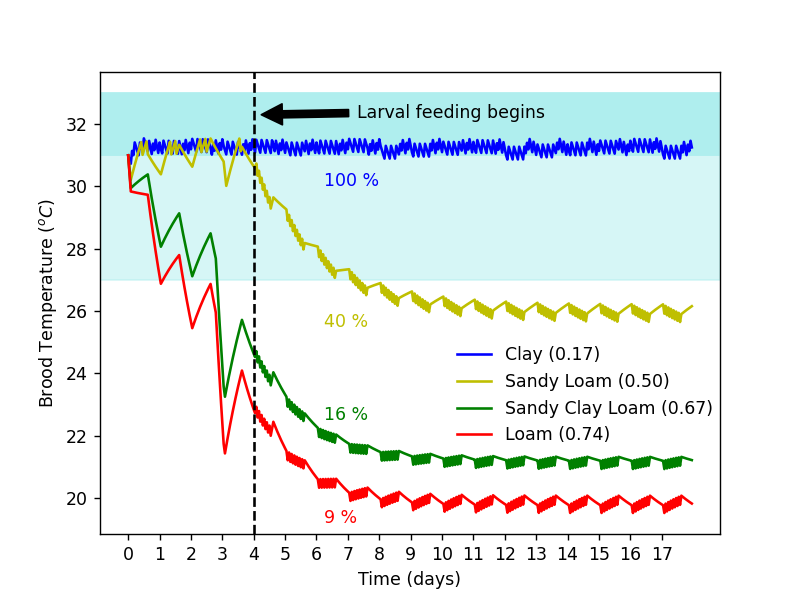

In [32]:





 

x = np.linspace(0, total_it-1, total_it)
#y_1bee = nest_temperature
y_1beefeed16clay = nest_temps_array[0]
y_1beefeed16sandyloam = nest_temps_array[1]
y_1beefeed16sandyclayloam = nest_temps_array[2]
y_1beefeed16loam = nest_temps_array[3]

fig, ax = plt.subplots()
ax.plot(x, y_1beefeed16clay, 'b')
ax.plot(x, y_1beefeed16sandyloam, 'y')
ax.plot(x, y_1beefeed16sandyclayloam, 'g')
ax.plot(x, y_1beefeed16loam, 'r')
#plt.plot(x, y_1beefeed16, 'r')
plt.xlabel("Time (days)")
plt.ylabel("Brood Temperature ($^{o}C$)")
plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], frameon = False, bbox_to_anchor = [0.65, 0.25])



ax.axhspan(31, 33, alpha= 1, color='paleturquoise')
ax.axhspan(27, 31, alpha= 0.5, color='paleturquoise')
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Larval feeding begins', xy = (98, 32.3), xytext = (175, 32.2),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.legend(["Clay (0.17)", "Sandy Loam (0.50)", "Sandy Clay Loam (0.67)", "Loam (0.74)"], frameon = False, bbox_to_anchor = [0.55, 0.30])



# title_contents = [str(col5[0]), " %"]
# #join them together
# str_of_ints = ",". join(title_contents)
# #remove the commas to get a nice string
# str_of_ints = str_of_ints.replace(',', '')
# title = str(str_of_ints)

plt.annotate(label(col5[0]), xy = (0.35, 30), xytext = (150, 30),color = "b")
plt.annotate(label(col5[1]), xy = (0.35, 28), xytext = (150, 25.5),color = "y")
plt.annotate(label(col5[2]), xy = (0.35, 28), xytext = (150, 22.5),color = "g")
plt.annotate(label(col5[3]), xy = (0.35, 28), xytext = (150, 19.2),color = "r")

# #plt.savefig('15.03.2022 Time vs brood temp 4 soils 5cm diam 1 bee highlighted range .svg', format='svg')
plt.savefig("rerounded brood temp vs time, labelled, 1 bee, figure 2a.svg", format = "svg", bbox_inches='tight')


# title_contents = ["brood temp vs time", "larvae= ", str(n_larvae), " no. bees = ", str(bees_array), " time = ", time.strftime("%Y%m%d-%H%M%S"), ".csv"]
# #join them together
# str_of_ints = ",". join(title_contents)
# #remove the commas to get a nice string
# str_of_ints = str_of_ints.replace(',', '')
# title = str(str_of_ints)


# #total energy needed to run nest for 18 days
# with open(title, 'a', newline='') as f_object:  
#     # Pass the CSV  file object to the writer() function
#     writer_object = writer(f_object)

#     writer_object.writerow(nest_temps_array[0])  
#     writer_object.writerow(nest_temps_array[1])
#     writer_object.writerow(nest_temps_array[2])  
#     writer_object.writerow(nest_temps_array[3])
#     writer_object.writerow(col5)
# #     writer_object.writerow(col5[1])
# #     writer_object.writerow(col5[2])
# #     writer_object.writerow(col5[3])

#     # Close the file object
#     f_object.close()


In [30]:
def label (x):
    x = round(x, 0)
    x = int(x)
    title_contents = [str(x), " %"]
    #join them together
    str_of_ints = ",". join(title_contents)
    #remove the commas to get a nice string
    str_of_ints = str_of_ints.replace(',', '')
    title = str(str_of_ints)
    return(title)


#### Foraging trips against time

In [ ]:

x = np.linspace(0, total_it-1, total_it)
#print(bee_employment_array[0])
#array showing 0s and 1s for when bee was incubating and foraging respectively
y_c = bee_employment_array[0]
y_sl = bee_employment_array[1]
y_scl = bee_employment_array[2]
y_l = bee_employment_array[3]

#total foraging trips made in each soil
totc = sum(y_c)
totsl = sum(y_sl)
totscl = sum(y_scl)
totl = sum(y_l)




#use these values in the legend
print(totc, totsl, totscl, totl)

fig, ax = plt.subplots(figsize=(8,1.5))

for i in range(len(x)):
    if y_c[i] ==1:
        ax.plot(x[i], 1, 'b|', markersize= 10)
    else:
        ax.plot(x[i], 1, 'w|', markersize= 10)
        
    if y_sl[i] ==1:
        ax.plot(x[i], 0.98, 'y|', markersize= 10)
    else:
        ax.plot(x[i], 0.98, 'w|', markersize= 10)
    if y_scl[i] ==1:
        ax.plot(x[i], 0.96, 'g|', markersize= 10)
    else:
        ax.plot(x[i], 0.96, 'w|', markersize= 10)
    if y_l[i] ==1:
        ax.plot(x[i], 0.94, 'r|', markersize= 10)
    else:
        ax.plot(x[i], 0.94, 'w|', markersize= 10)

plt.xlabel("Time (days)")

# ax.set_ylim([0.93, 1.01])
#plt.legend(["Clay (n =", totc, ")", "Sandy Loam", "Sandy Clay Loam", "Loam"], bbox_to_anchor = [1,1])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.text(456, 0.995, f_title(totc))
ax.text(456, 0.975, f_title(totsl))
ax.text(456, 0.955, f_title(totscl))
ax.text(456, 0.935, f_title(totl))


ax.set_yticks([0.94, 0.96, 0.98, 1])
plt.tight_layout()
#plt.axis('off')
plt.margins(y = 0.1)
ax.set_yticks([])
#ax.set_ylabel("Queen", rotation = -90, position = (0.1,0.5))
#ax.set_ylabelposition([1,1])

plt.savefig("final foraging vs time, 1 bee, 7 larvae figure 2 -90.svg", format = "svg", bbox_inches='tight')


#### Nectar and pollen energy in pots over time

<IPython.core.display.Javascript object>


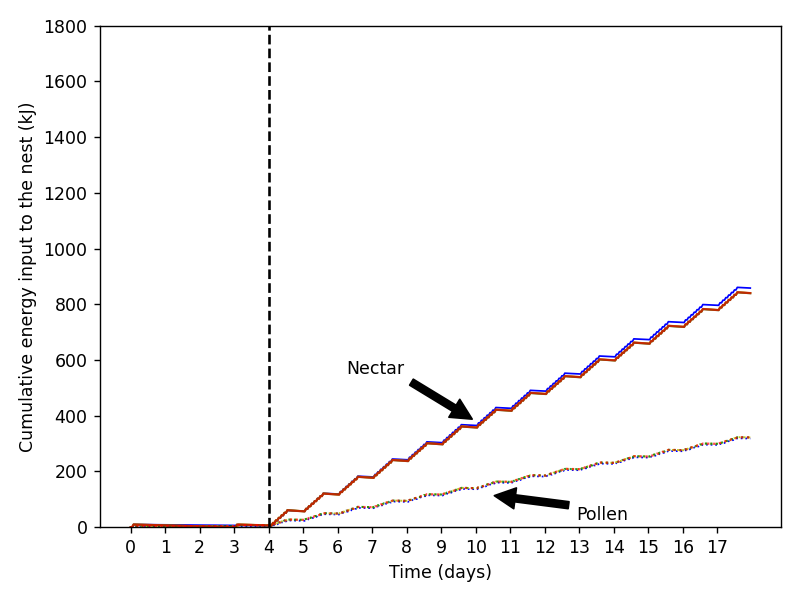

In [47]:

#x values - our series of time steps
x = np.linspace(0, total_it-1, total_it)


#a new array to store honeypot energy
honey_c = []
pollen_c = []
for i in range(len(honeypot_energy_array)):
    a = honeypot_energy_array[i]
        #convert J to kJ
    b = [x/1000 for x in honeypot_energy_array[i]]
    honey_c.append(b)
    
    d = pollenpot_energy_array[i]
        #convert J to kJ
    e = [x/1000 for x in pollenpot_energy_array[i]]
    pollen_c.append(e)
                   
            
fig, ax = plt.subplots()
#clay
ax.plot(x, honey_c[0], 'b-', linewidth = 1, alpha = 1)
ax.plot(x, pollen_c[0], 'b:', linewidth = 1, alpha = 1)
#sandy loam
ax.plot(x, honey_c[1], 'y-', linewidth = 1.1, alpha = 0.9)
ax.plot(x, pollen_c[1], 'y:', linewidth = 1.1, alpha = 0.9)
#sandy clay loam
ax.plot(x, honey_c[2], 'g-', linewidth = 1.2, alpha = 0.8)
ax.plot(x, pollen_c[2], 'g:', linewidth = 1.2, alpha = 0.8)
#loam
ax.plot(x, honey_c[3], 'r-', linewidth = 1.3, alpha = 0.7)
ax.plot(x, pollen_c[3], 'r:', linewidth = 1.3, alpha = 0.7)



ax.set_xlabel("Time (days)")
ax.set_ylabel("Cumulative energy input to the nest (kJ)")
#ax.legend(["Clay (0.17) - Nectar", "Clay (0.17) - Pollen", "Sandy Loam (0.50) - Nectar", "Sandy Loam (0.50) - Pollen", "Sandy Clay Loam (0.67) - Nectar", "Sandy Clay Loam (0.67) - Pollen", "Loam (0.74) - Nectar", "Loam (0.74) - Pollen"], frameon = False)
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Nectar', xy = (240, 380), xytext = (150, 550),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Pollen', xy = (250, 115), xytext = (310, 25),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.set_ylim([0, 1800])
plt.tight_layout()
plt.savefig("scaled 1800 cumulatibe energy input to nest vs time, 1 bee,  no legend, dotted linefigure 2.svg", format = "svg", bbox_inches='tight')

#### Finally, we plot energy consumed by larvae per day

In [43]:



#pollen larval consumption

fix, ax = plt.subplots()

#average of the pollen eaten each iteration by each larvae
c = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[0], larvae_pollen_consumed[1],larvae_pollen_consumed[2],larvae_pollen_consumed[3],larvae_pollen_consumed[4],larvae_pollen_consumed[5],larvae_pollen_consumed[6])]
sl = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[7], larvae_pollen_consumed[8],larvae_pollen_consumed[9],larvae_pollen_consumed[10],larvae_pollen_consumed[11],larvae_pollen_consumed[12],larvae_pollen_consumed[13])]
scl  = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[14], larvae_pollen_consumed[15],larvae_pollen_consumed[16],larvae_pollen_consumed[17],larvae_pollen_consumed[18],larvae_pollen_consumed[19],larvae_pollen_consumed[20])]
l = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[21], larvae_pollen_consumed[22],larvae_pollen_consumed[23],larvae_pollen_consumed[24],larvae_pollen_consumed[25],larvae_pollen_consumed[26],larvae_pollen_consumed[17])]

plt.plot(larvae_pollen_time[0], c, 'b')
plt.plot(larvae_pollen_time[0], sl, 'y')
plt.plot(larvae_pollen_time[0], scl, 'g')
plt.plot(larvae_pollen_time[0], l, 'r')

plt.xlabel("Time (days)")
plt.ylabel("Pollen energy consumed by larvae (J day$^{-1}$)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Larval feeding\n       begins', xy = (98, 5), xytext = (175, 3),arrowprops=dict(facecolor='black', shrink=0.05),)
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"])


#nectar larval consumption



#average of the pollen eaten each iteration by each larvae
c = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[0], larvae_nectar_consumed[1],larvae_nectar_consumed[2],larvae_nectar_consumed[3],larvae_nectar_consumed[4],larvae_nectar_consumed[5],larvae_nectar_consumed[6])]
sl = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[7], larvae_nectar_consumed[8],larvae_nectar_consumed[9],larvae_nectar_consumed[10],larvae_nectar_consumed[11],larvae_nectar_consumed[12],larvae_nectar_consumed[13])]
scl  = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[14], larvae_nectar_consumed[15],larvae_nectar_consumed[16],larvae_nectar_consumed[17],larvae_nectar_consumed[18],larvae_nectar_consumed[19],larvae_nectar_consumed[20])]
l = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[21], larvae_nectar_consumed[22],larvae_nectar_consumed[23],larvae_nectar_consumed[24],larvae_nectar_consumed[25],larvae_nectar_consumed[26],larvae_nectar_consumed[27])]
plt.plot(larvae_pollen_time[0], c, 'b')
plt.plot(larvae_pollen_time[0], sl, 'y')
plt.plot(larvae_pollen_time[0], scl, 'g')
plt.plot(larvae_pollen_time[0], l, 'r')

plt.xlabel("Time (days)")
plt.ylabel("Average energy consumed by larvae (J)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
#ax.annotate('Larval feeding\n       begins', xy = (98, 5), xytext = (175, 3),arrowprops=dict(facecolor='black', shrink=0.05),)
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], frameon = False)
ax.text(1, 29.3, 'Nectar')
ax.text(1, 14.3, 'Pollen')
ax.annotate(r"$\{$",fontsize=80, xy=(37, 26))
ax.annotate(r"$\{$",fontsize=80, xy=(37, 11))

#plt.savefig("Larval energy consumed per day vs time, 1 bee, figure 2.svg", format = "svg", bbox_inches='tight')

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (334,) and (333,)

#### Save the Data!

In [ ]:


# Pre-requisite - Import the writer class from the csv module
from csv import writer
title_contents = ["Data from 2a ", "larvae= ", str(n_larvae), " no. bees = ", str(bees_array), " time = ", time.strftime("%Y%m%d-%H%M%S"), ".csv"]
#join them together
str_of_ints = ",". join(title_contents)
#remove the commas to get a nice string
str_of_ints = str_of_ints.replace(',', '')
title = str(str_of_ints)


# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(title, 'a', newline='') as f_object:  
    # Pass the CSV  file object to the writer() function
    writer_object = writer(f_object)
    # Result - a writer object
    # Pass the data in the list as an argument into the writerow() function
    writer_object.writerow(x)  
    writer_object.writerow(nest_temps_array)  
    writer_object.writerow(bee_employment_array)  
    writer_object.writerow(honeypot_energy_array)  
    writer_object.writerow(pollenpot_energy_array)  
    writer_object.writerow(workers_nectar_consumed)  
    writer_object.writerow(workers_pollen_consumed)  
    writer_object.writerow(larvae_nectar_consumed)  
    writer_object.writerow(larvae_pollen_consumed)  

    # Close the file object
    f_object.close()

    




#### import our saved data for just the queen

In [ ]:
saveddata = pd.read_csv(r"C:\Users\jakef\Documents\Exeter\Natural Sciences\Year 4\NSCM001\Data from 2a larvae= 7 no. bees = [1] time = 20220319-081834.csv")

In [ ]:
broodtemp_sved = saveddata["0.0"].iloc[0]
#print(broodtemp_sved)



### Figure 2b Run model under standard conditions with 5 workers feeding 7 larvae

In [48]:
bees_array = [5]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]

# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
h_values = [0.17, 0.50, 0.67, 0.74]#, 0.50, 0.67, 0.74, 3.85, 10, 20]#, 1, 5]
#h_values = np.linspace(0, 20, 201)

#nest_areas = [0.002]
nest_areas = [0.003]#[0.0028]#[0.00785]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
travelling_it = [1]#, 10, 20]  
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []

nest_temps_array = []

bee_foraging_array = []
bee_employment_array = []

honeypot_energy_array = []
pollenpot_energy_array = []

#record pollen and nectar consumed each iteration by each worker
workers_nectar_consumed = []
workers_pollen_consumed = []

#record pollen and nectar consumed each iteration by each larvae

larvae_nectar_consumed = []
larvae_pollen_consumed = []

larvae_nectar_time = []
larvae_pollen_time = []




#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []

#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate dataframe

col_lar14 = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []



#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer

# flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
# flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


# flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
# flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]

# flowers_nectar_per_hour = [326.6964122]
# flowers_pollen_per_hour = [9787.072243]

# flowername = ["Sunflower"]
# flowername = ["Sunflower"]

flowers_nectar_per_hour = [9450]
flowers_pollen_per_hour = [3502.040816]

flowername = ["Oilseed Rape"]
flowername = ["Oilseed Rape"]



        
for z in bees_array:    #for each soil type

    
    
  

        #for each flower
    for b in range(len(flowers_pollen_per_hour)):
        for y in h_values:
    



            flowerpollenhour =  flowers_pollen_per_hour[b]
            flowernectarhour =  flowers_nectar_per_hour[b]






            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578
                    nest_honeypot_array = []
                    nest_pollenpot_array = []



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    max_flower_energy = 0#360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    max_nectar_energy = 0#10000
                    max_pollen_energy = 0#10000
                    #max_flower_energy = (746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    #array to store wheter a bee is incubating (0) or foraging (1)
                    bee_foraging = []
                    
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []
                    nectar_taken = []
                    nectar_taken_this_iteration = []
                    pollen_taken = []
                    pollen_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment
                    nest_temps_array.append(nest_temperature)
                    bee_foraging_array.append(bee_foraging)
                    honeypot_energy_array.append(nest_honeypot_array)
                    pollenpot_energy_array.append(nest_pollenpot_array)

                    for i in walkers:

                        #total nectar and pollen brought into the nest
                        total_pollen.append(walkers[i].totalpollen)
                        total_nectar.append(walkers[i].totalnectar)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)
                        bee_employment_array.append(walkers[i].employment_register)
                        workers_nectar_consumed.append(walkers[i].nectarmeal)
                        workers_pollen_consumed.append(walkers[i].pollenmeal)
                        

                        

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            
                            
                            #nectar and pollen consumed per iteration
                            larvae_nectar_consumed.append(larvae[l].nectar)
                            larvae_pollen_consumed.append(larvae[l].pollen)
                            
                            larvae_nectar_time.append(larvae[l].nectar_time)
                            larvae_pollen_time.append(larvae[l].pollen_time)

                            
                            #total amount of nectar and pollen consumed through the simulation
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    col10.append((sum(energy_taken))/1000)


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

#datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

#datatable.to_csv("Data1_09_02_2022.csv")
#lar_datatable.to_csv("Lar_data1_09_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)




In [ ]:
display(datatable)

#### 2b Brood temp vs time, standard conditions, 5 workers

<IPython.core.display.Javascript object>


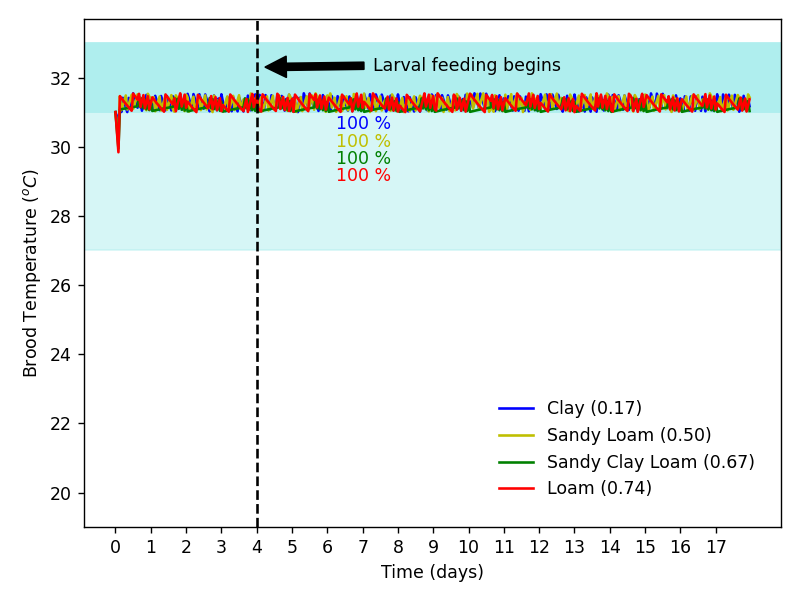

In [63]:

x = np.linspace(0, total_it-1, total_it)
#y_1bee = nest_temperature
y_1beefeed16clay = nest_temps_array[0]
y_1beefeed16sandyloam = nest_temps_array[1]
y_1beefeed16sandyclayloam = nest_temps_array[2]
y_1beefeed16loam = nest_temps_array[3]

fig, ax = plt.subplots()
ax.plot(x, y_1beefeed16clay, 'b')
ax.plot(x, y_1beefeed16sandyloam, 'y')
ax.plot(x, y_1beefeed16sandyclayloam, 'g')
ax.plot(x, y_1beefeed16loam, 'r')
#plt.plot(x, y_1beefeed16, 'r')
plt.xlabel("Time (days)")
plt.ylabel("Brood Temperature ($^{o}C$)")

ax.axhspan(31, 33, alpha= 1, color='paleturquoise')
ax.axhspan(27, 31, alpha= 0.5, color='paleturquoise')
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Larval feeding begins', xy = (98, 32.3), xytext = (175, 32.2),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.legend(["Clay (0.17)", "Sandy Loam (0.50)", "Sandy Clay Loam (0.67)", "Loam (0.74)"], frameon = False, bbox_to_anchor = [0.985, 0.28])
plt.tight_layout()

plt.annotate(label(col5[0]), xy = (0.35, 30), xytext = (150, 30.5),color = "b")
plt.annotate(label(col5[1]), xy = (0.35, 28), xytext = (150, 30),color = "y")
plt.annotate(label(col5[2]), xy = (0.35, 28), xytext = (150, 29.5),color = "g")
plt.annotate(label(col5[3]), xy = (0.35, 28), xytext = (150, 29),color = "r")
plt.ylim([19, 33.7])

#plt.savefig('15.03.2022 Time vs brood temp 4 soils 5cm diam 1 bee highlighted range .svg', format='svg')
plt.savefig("rounded brood temp vs time, 5 bees, 7 larvae, no legend, figure 2 days.svg", format = "svg", bbox_inches='tight')

#### 2b Foraging trips against time

In [ ]:

x = np.linspace(0, total_it-1, total_it)

#array showing 0s and 1s for when bee was incubating and foraging respectively

#we want the average of 0,1,2,3,4, then of 5,6,7,8,9 (though need to make sure we don't have a decima!)

legendlabel = []
#clay
fig, ax = plt.subplots(5, figsize=(8,7))
for i in range(0, 5):
    
    y_c = bee_employment_array[0+i]
    #sandy loam
    y_sl = bee_employment_array[5+i]
    #snady clay loam
    y_scl = bee_employment_array[10+i]
    #loam
    y_l = bee_employment_array[15+i]


    #total foraging trips made in each soil
    totc = sum(y_c)
    totsl = sum(y_sl)
    totscl = sum(y_scl)
    totl = sum(y_l)
    
    legendlabel.append(totc)
    legendlabel.append(totsl)
    legendlabel.append(totscl)
    legendlabel.append(totl)

    #use these values in the legend
  

   
    #print(i, y_c)
    for j in range(len(x)):
        if y_c[j] ==1:
            ax[i].plot(x[j], 1, 'b|', markersize= 10)
        else:
            ax[i].plot(x[j], 1, 'w|', markersize= 10)
        if y_sl[j] ==1:
            ax[i].plot(x[j], 0.98, 'y|', markersize= 10)
        else:
            ax[i].plot(x[j], 0.98, 'w|', markersize= 10)
        if y_scl[j] ==1:
            ax[i].plot(x[j], 0.96, 'g|', markersize= 10)
        else:
            ax[i].plot(x[j], 0.96, 'w|', markersize= 10)
        if y_l[j] ==1:
            ax[i].plot(x[j], 0.94, 'r|', markersize= 10)
        else:
            ax[i].plot(x[j], 0.94, 'w|', markersize= 10)

plt.xlabel("Time (days)")

# ax.set_ylim([0.93, 1.01])
#plt.legend(["Clay (n =", totc, ")", "Sandy Loam", "Sandy Clay Loam", "Loam"], bbox_to_anchor = [1,1])
newticklocations = x[0::24]
ax[4].set_xticks(newticklocations)
#have days, not hours along the x axis
ax[4].set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

for i in range(0,5):
   
    ax[i].set_yticks([])
    if i != 5:
        ax[i].set_xticks([])
ax[0].set_ylabel("Worker 1", rotation = 0)
ax[0].yaxis.set_label_coords(-0.07,0.42)
ax[1].set_ylabel("Worker 2", rotation = 0)
ax[1].yaxis.set_label_coords(-0.07,0.42)
ax[2].set_ylabel("Worker 3", rotation = 0)
ax[2].yaxis.set_label_coords(-0.07,0.42)
ax[3].set_ylabel("Worker 4", rotation = 0)
ax[3].yaxis.set_label_coords(-0.07,0.42)
ax[4].set_ylabel("Worker 5", rotation = 0)
ax[4].yaxis.set_label_coords(-0.07,0.42)



ax[0].text(458, 0.995, (f_title(legendlabel[0])))
ax[0].text(458, 0.975, (f_title(legendlabel[1])))
ax[0].text(458, 0.955, (f_title(legendlabel[2])))
ax[0].text(458, 0.935, (f_title(legendlabel[3])))

ax[1].text(459, 0.995, (f_title(legendlabel[4])))
ax[1].text(459, 0.975, (f_title(legendlabel[5])))
ax[1].text(459, 0.955, (f_title(legendlabel[6])))
ax[1].text(459, 0.935, (f_title(legendlabel[7])))



ax[2].text(460, 0.995, (f_title(legendlabel[8])))
ax[2].text(460, 0.975, (f_title(legendlabel[9])))
ax[2].text(460, 0.955, (f_title(legendlabel[10])))
ax[2].text(460, 0.935, (f_title(legendlabel[11])))


ax[3].text(460, 0.995, (f_title(legendlabel[12])))
ax[3].text(460, 0.975, (f_title(legendlabel[13])))
ax[3].text(460, 0.955, (f_title(legendlabel[14])))
ax[3].text(460, 0.935, (f_title(legendlabel[15])))


ax[4].text(460, 0.995, (f_title(legendlabel[16])))
ax[4].text(460, 0.975, (f_title(legendlabel[17])))
ax[4].text(460, 0.955, (f_title(legendlabel[18])))
ax[4].text(460, 0.935, (f_title(legendlabel[19])))
# # ax.text(450, 0.995, 'Clay (n = 110)')
# ax.text(450, 0.975, 'Sandy Loam (n = 106)')
# ax.text(450, 0.955, 'Sandy Clay Loam (n = 105)')
# ax.text(450, 0.935, 'Loam (n = 107)')
#ax[0].set_yticks([0.94, 0.96, 0.98, 1])

""""""


all_bees_forage = []

#total foraging trips made in clay
tot_c = 0
for i in range(0, 5):
    #all foraging trips made by the 5 workers in clay
    tot_c += sum(bee_employment_array[i])
#find mean number of foraging trips in each hour
c = [(a + b +c +d +e ) for a,b,c,d,e in zip(bee_employment_array[0], bee_employment_array[1], bee_employment_array[2], bee_employment_array[3], bee_employment_array[4])]

for i in range(len(c)):
    #if not zero i.e. one of the bees foraged at this hour
    if c[i] != 0:
        c[i] = 1
#array showing whether foraging occured in an hour or not
all_bees_forage.append(c)

     
tot_sl = 0
for i in range(5, 10):
    tot_sl += sum(bee_employment_array[i])

#find mean number of foraging trips in each hour
c = [(a + b +c +d +e ) / 5 for a,b,c,d,e in zip(bee_employment_array[5], bee_employment_array[6], bee_employment_array[7], bee_employment_array[8], bee_employment_array[9])]

for i in range(len(c)):
    #if not zero i.e. one of the bees foraged at this hour
    if c[i] != 0:
        c[i] = 1
#array showing whether foraging occured in an hour or not
all_bees_forage.append(c)

    
tot_scl = 0
for i in range(10, 15):
    tot_scl += sum(bee_employment_array[i])
    
    #find mean number of foraging trips in each hour
c = [(a + b +c +d +e ) / 5 for a,b,c,d,e in zip(bee_employment_array[10], bee_employment_array[11], bee_employment_array[12], bee_employment_array[13], bee_employment_array[14])]

for i in range(len(c)):
    #if not zero i.e. one of the bees foraged at this hour
    if c[i] != 0:
        c[i] = 1
#array showing whether foraging occured in an hour or not
all_bees_forage.append(c)

tot_l = 0
for i in range(15, 20):
    tot_l += sum(bee_employment_array[i])
    
    
    #find mean number of foraging trips in each hour
c = [(a + b +c +d +e ) / 5 for a,b,c,d,e in zip(bee_employment_array[15], bee_employment_array[16], bee_employment_array[17], bee_employment_array[18], bee_employment_array[19])]

for i in range(len(c)):
    #if not zero i.e. one of the bees foraged at this hour
    if c[i] != 0:
        c[i] = 1
#array showing whether foraging occured in an hour or not
all_bees_forage.append(c)




# x = np.linspace(0, total_it-1, total_it)



# for i in range(len(x)):
#     if all_bees_forage[0][i] ==1:
#         ax[5].plot(x[i], 1, 'b|', markersize= 10)
#     else:
#         ax[5].plot(x[i], 1, 'w|', markersize= 10)
        
#     if all_bees_forage[1][i] ==1:
#         ax[5].plot(x[i], 0.98, 'y|', markersize= 10)
#     else:
#         ax[5].plot(x[i], 0.98, 'w|', markersize= 10)
#     if all_bees_forage[2][i] ==1:
#         ax[5].plot(x[i], 0.96, 'g|', markersize= 10)
#     else:
#         ax[5].plot(x[i], 0.96, 'w|', markersize= 10)
#     if all_bees_forage[3][i] ==1:
#         ax[5].plot(x[i], 0.94, 'r|', markersize= 10)
#     else:
#         ax[5].plot(x[i], 0.94, 'w|', markersize= 10)
    
# legendlabel = [f_title(tot_c),f_title(tot_sl), f_title(tot_scl), f_title(tot_l)]
# ax[5].text(459, 0.995, (legendlabel[0]))
# ax[5].text(459, 0.975, (legendlabel[1]))
# ax[5].text(459, 0.955, (legendlabel[2]))
# ax[5].text(459, 0.935, (legendlabel[3]))
newticklocations = x[0::24]
ax[4].set_xticks(newticklocations)
#have days, not hours along the x axis
ax[4].set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
#ax[5].set_ylabel("All\n workers", rotation = 0)
#ax[5].yaxis.set_label_coords(-0.07,0.34)
#plt.tight_layout()
#plt.savefig("total forage vs time, 5 bees, figure 2, 1.svg", format = "svg", bbox_inches='tight')







plt.tight_layout()
#plt.axis('off')
#plt.margins(y = 0.1)
#ax.set_yticks([])

#plt.savefig("foraging vs time, figure 2.svg", format = "svg")
plt.savefig("colour and white Indiv worker forage vs time, 5 bees, 7 larvae, figure 2.svg", format = "svg", bbox_inches='tight')

In [ ]:
print(all_bees_forage[0])

In [ ]:
x = np.linspace(0, total_it-1, total_it)
fig, ax = plt.subplots()
for j in range(len(x)):
    if bee_employment_array[3][j] ==1:
        ax.plot(x[j], 1, 'b|', markersize= 10)
    else:
        ax.plot(x[j], 1, 'w|', markersize= 10)

#### Energy consumed per day by the workers

In [ ]:
print(len(workers_pollen_consumed))

##### plots energy consumed by each worker

In [ ]:

#x values - our series of time steps
x = np.linspace(0, total_it-1, total_it)

fig, ax = plt.subplots()


for i in range(len(workers_nectar_consumed)):
    if i in range(0, 5):
        plt.plot(x, workers_nectar_consumed[i], 'b')
#        plt.plot(x, workers_pollen_consumed[i], 'b:')
    if i in range(5, 10):
        plt.plot(x, workers_nectar_consumed[i], 'y')
      #  plt.plot(x, workers_pollen_consumed[i], 'y:')
    if i in range(10, 15):
        plt.plot(x, workers_nectar_consumed[i], 'g')
       # plt.plot(x, workers_pollen_consumed[i], 'g:')
    if i in range(15, 20):
        plt.plot(x, workers_nectar_consumed[i], 'r')
        #plt.plot(x, workers_pollen_consumed[i], 'r:')
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"])
plt.xlabel("Time (days)")
plt.ylabel("Nectar energy consumed by workers (J)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
#plt.savefig("Queen nectar consumed per day vs time, figure 2.svg", format = "svg")
plt.savefig("individual nectar energy consumption vs time, 5 bees, figure 2, 1.svg", format = "svg", bbox_inches='tight')


fig, ax = plt.subplots()


for i in range(len(workers_pollen_consumed)):
    if i in range(0, 5):
        #plt.plot(x, workers_nectar_consumed[i], 'b')
        plt.plot(x, workers_pollen_consumed[i], 'b:')
    if i in range(5, 10):
        #plt.plot(x, workers_nectar_consumed[i], 'y')
        plt.plot(x, workers_pollen_consumed[i], 'y:')
    if i in range(10, 15):
       # plt.plot(x, workers_nectar_consumed[i], 'g')
        plt.plot(x, workers_pollen_consumed[i], 'g:')
    if i in range(15, 20):
        #plt.plot(x, workers_nectar_consumed[i], 'r')
        plt.plot(x, workers_pollen_consumed[i], 'r:')
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"])
plt.xlabel("Time (days)")
plt.ylabel("Pollen energy consumed by workers (J)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
#plt.savefig("Queen pollen consumed per day vs time, figure 2.svg", format = "svg")
plt.savefig("individual pollen energy consumption vs time, 5 bees, figure 2, 1.svg", format = "svg", bbox_inches='tight')

##### plots average eneryg consumed per hour by workers

<IPython.core.display.Javascript object>


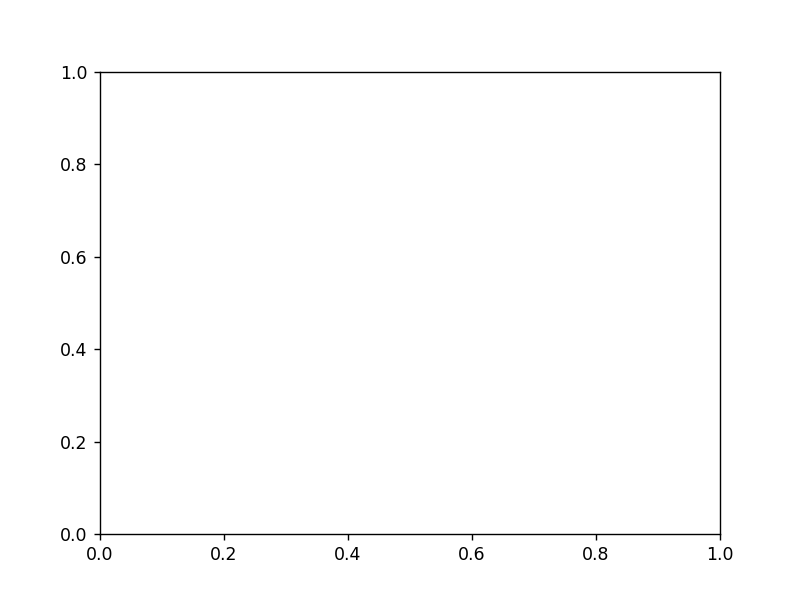

ValueError: x and y must have same first dimension, but have shapes (432,) and (0,)

In [51]:

#x values - our series of time steps
x = np.linspace(0, total_it-1, total_it)

fig, ax = plt.subplots()

#average of the nectar eaten each iteration by each worker
c = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_nectar_consumed[0], workers_nectar_consumed[1], workers_nectar_consumed[2], workers_nectar_consumed[3], workers_nectar_consumed[4])]
sl = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_nectar_consumed[5], workers_nectar_consumed[6], workers_nectar_consumed[7], workers_nectar_consumed[8], workers_nectar_consumed[9])]
scl  = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_nectar_consumed[10], workers_nectar_consumed[11], workers_nectar_consumed[12], workers_nectar_consumed[13], workers_nectar_consumed[14])]
l = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_nectar_consumed[15], workers_nectar_consumed[16], workers_nectar_consumed[17], workers_nectar_consumed[18], workers_nectar_consumed[19])]

plt.plot(x, c, 'b')
plt.plot(x, sl, 'y')
plt.plot(x, scl, 'g')
plt.plot(x, l, 'r')

plt.xlabel("Time (days)")
plt.ylabel("Average nectar energy consumed by worker (J day$^{-1}$)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])


#average of the nectar eaten each iteration by each worker
c = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_pollen_consumed[0], workers_pollen_consumed[1], workers_pollen_consumed[2], workers_pollen_consumed[3], workers_pollen_consumed[4])]
sl = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_pollen_consumed[5], workers_pollen_consumed[6], workers_pollen_consumed[7], workers_pollen_consumed[8], workers_pollen_consumed[9])]
scl  = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_pollen_consumed[10], workers_pollen_consumed[11], workers_pollen_consumed[12], workers_pollen_consumed[13], workers_pollen_consumed[14])]
l = [(a + b +c +d +e) / 5 for a,b,c,d,e, in zip(workers_pollen_consumed[15], workers_pollen_consumed[16], workers_pollen_consumed[17], workers_pollen_consumed[18], workers_pollen_consumed[19])]

plt.plot(x, c, 'b')
plt.plot(x, sl, 'y')
plt.plot(x, scl, 'g')
plt.plot(x, l, 'r')

plt.xlabel("Time (days)")
plt.ylabel("Average energy consumed by worker (J)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Larval feeding\n       begins', xy = (98, 45), xytext = (145, 55),arrowprops=dict(facecolor='black', shrink=0.05),)
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], frameon = False)
ax.annotate('Nectar', xy = (380, 100), xytext = (400, 55),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Pollen', xy = (350, 25), xytext = (288, 55),arrowprops=dict(facecolor='black', shrink=0.05),)

#plt.savefig("total energy consumption vs time, 5 bees, figure 2, 1.svg", format = "svg", bbox_inches='tight')

#### 2b Nectar and pollen energy in pots over time

<IPython.core.display.Javascript object>


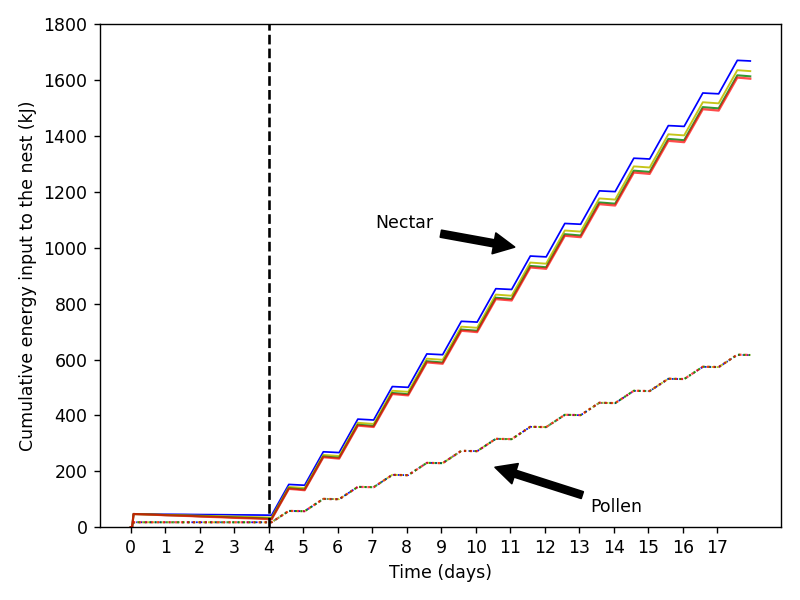

In [52]:

#x values - our series of time steps
x = np.linspace(0, total_it-1, total_it)


#a new array to store honeypot energy
honey_c = []
pollen_c = []
for i in range(len(honeypot_energy_array)):
    a = honeypot_energy_array[i]
        #convert J to kJ
    b = [x/1000 for x in honeypot_energy_array[i]]
    honey_c.append(b)
    
    d = pollenpot_energy_array[i]
        #convert J to kJ
    e = [x/1000 for x in pollenpot_energy_array[i]]
    pollen_c.append(e)
                   
            
fig, ax = plt.subplots()
#clay
ax.plot(x, honey_c[0], 'b-', linewidth = 1, alpha = 1)
ax.plot(x, pollen_c[0], 'b:', linewidth = 1, alpha = 1)
#sandy loam
ax.plot(x, honey_c[1], 'y-', linewidth = 1.1, alpha = 0.9)
ax.plot(x, pollen_c[1], 'y:', linewidth = 1.1, alpha = 0.9)
#sandy clay loam
ax.plot(x, honey_c[2], 'g-', linewidth = 1.2, alpha = 0.8)
ax.plot(x, pollen_c[2], 'g:', linewidth = 1.2, alpha = 0.8)
#loam
ax.plot(x, honey_c[3], 'r-', linewidth = 1.3, alpha = 0.7)
ax.plot(x, pollen_c[3], 'r:', linewidth = 1.3, alpha = 0.7)
 
ax.set_xlabel("Time (days)")
#ax.set_ylabel("Energy stored in nest pot (kJ)")
ax.set_ylabel("Cumulative energy input to the nest (kJ)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Nectar', xy = (270, 1000), xytext = (170, 1070),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Pollen', xy = (250, 220), xytext = (320, 55),arrowprops=dict(facecolor='black', shrink=0.05),)
#ax.legend(["Clay (0.17) - Nectar", "Clay (0.17) - Pollen", "Sandy Loam (0.50) - Nectar", "Sandy Loam (0.50) - Pollen", "Sandy Clay Loam (0.67) - Nectar", "Sandy Clay Loam (0.67) - Pollen", "Loam (0.74) - Nectar", "Loam (0.74) - Pollen"], frameon = False)
plt.tight_layout()
ax.set_ylim([0, 1800])
#plt.savefig("energy nectar and pollen stored in nest vs time, figure 2.svg", format = "svg")
plt.savefig("scaled cumulative energy input to the nest vs time, 5 bees, figure 2, no legend days.svg", format = "svg", bbox_inches='tight')

#### 2b Finally, we plot energy consumed by larvae per day

In [ ]:



#pollen larval consumption

fix, ax = plt.subplots()

#average of the pollen eaten each iteration by each larvae
c = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[0], larvae_pollen_consumed[1],larvae_pollen_consumed[2],larvae_pollen_consumed[3],larvae_pollen_consumed[4],larvae_pollen_consumed[5],larvae_pollen_consumed[6])]
sl = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[7], larvae_pollen_consumed[8],larvae_pollen_consumed[9],larvae_pollen_consumed[10],larvae_pollen_consumed[11],larvae_pollen_consumed[12],larvae_pollen_consumed[13])]
scl  = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[14], larvae_pollen_consumed[15],larvae_pollen_consumed[16],larvae_pollen_consumed[17],larvae_pollen_consumed[18],larvae_pollen_consumed[19],larvae_pollen_consumed[20])]
l = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_pollen_consumed[21], larvae_pollen_consumed[22],larvae_pollen_consumed[23],larvae_pollen_consumed[24],larvae_pollen_consumed[25],larvae_pollen_consumed[26],larvae_pollen_consumed[17])]

plt.plot(larvae_pollen_time[0], c, 'b')
plt.plot(larvae_pollen_time[0], sl, 'y')
plt.plot(larvae_pollen_time[0], scl, 'g')
plt.plot(larvae_pollen_time[0], l, 'r')

plt.xlabel("Time (days)")
plt.ylabel("Pollen energy consumed by larvae (J day$^{-1}$)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Larval feeding\n       begins', xy = (98, 5), xytext = (175, 3),arrowprops=dict(facecolor='black', shrink=0.05),)
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"])


#nectar larval consumption



#average of the pollen eaten each iteration by each larvae
c = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[0], larvae_nectar_consumed[1],larvae_nectar_consumed[2],larvae_nectar_consumed[3],larvae_nectar_consumed[4],larvae_nectar_consumed[5],larvae_nectar_consumed[6])]
sl = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[7], larvae_nectar_consumed[8],larvae_nectar_consumed[9],larvae_nectar_consumed[10],larvae_nectar_consumed[11],larvae_nectar_consumed[12],larvae_nectar_consumed[13])]
scl  = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[14], larvae_nectar_consumed[15],larvae_nectar_consumed[16],larvae_nectar_consumed[17],larvae_nectar_consumed[18],larvae_nectar_consumed[19],larvae_nectar_consumed[20])]
l = [(a + b +c +d +e +f + g) / 7 for a,b,c,d,e,f,g, in zip(larvae_nectar_consumed[21], larvae_nectar_consumed[22],larvae_nectar_consumed[23],larvae_nectar_consumed[24],larvae_nectar_consumed[25],larvae_nectar_consumed[26],larvae_nectar_consumed[27])]
plt.plot(larvae_pollen_time[0], c, 'b')
plt.plot(larvae_pollen_time[0], sl, 'y')
plt.plot(larvae_pollen_time[0], scl, 'g')
plt.plot(larvae_pollen_time[0], l, 'r')

plt.xlabel("Time (days)")
plt.ylabel("Average energy consumed by larva (J)")
#ax.legend(["Clay Nectar","Clay Pollen"])
newticklocations = x[0::24]
ax.set_xticks(newticklocations)
#have days, not hours along the x axis
ax.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axvline(x=(4*24), color='k', linestyle = '--')
ax.annotate('Larval feeding\n       begins', xy = (98, 5), xytext = (175, 3),arrowprops=dict(facecolor='black', shrink=0.05),)
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], frameon = False)
ax.text(1, 29.3, 'Nectar')
ax.text(1, 14.3, 'Pollen')
ax.annotate(r"$\{$",fontsize=80, xy=(37, 26))
ax.annotate(r"$\{$",fontsize=80, xy=(37, 11))
plt.savefig("average larval energy consumption vs time, 5 bees, figure 2, 1.svg", format = "svg", bbox_inches='tight')
#plt.savefig("Larval energy consumed per day vs time, figure 2.svg", format = "svg")

In [ ]:
# Pre-requisite - Import the writer class from the csv module
from csv import writer
title_contents = ["Data from 2b ", "larvae= ", str(n_larvae), " no. bees = ", str(bees_array), " time = ", time.strftime("%Y%m%d-%H%M%S"), ".csv"]
#join them together
str_of_ints = ",". join(title_contents)
#remove the commas to get a nice string
str_of_ints = str_of_ints.replace(',', '')
title = str(str_of_ints)


# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(title, 'a', newline='') as f_object:  
    # Pass the CSV  file object to the writer() function
    writer_object = writer(f_object)
    # Result - a writer object
    # Pass the data in the list as an argument into the writerow() function
    writer_object.writerow(x)  
    writer_object.writerow(nest_temps_array)  
    writer_object.writerow(bee_employment_array)  
    writer_object.writerow(honeypot_energy_array)  
    writer_object.writerow(pollenpot_energy_array)  
    writer_object.writerow(workers_nectar_consumed)  
    writer_object.writerow(workers_pollen_consumed)  
    writer_object.writerow(larvae_nectar_consumed)  
    writer_object.writerow(larvae_pollen_consumed)  

    # Close the file object
    f_object.close()

    




### Figure 3

In [103]:
bees_array = [1]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]

# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
h_values = np.linspace(0, 1.1, 201)#[0.17, 0.50, 0.67, 0.74]#, 0.50, 0.67, 0.74, 3.85, 10, 20]#, 1, 5]
#h_values = np.linspace(0, 20, 201)

#nest_areas = [0.002]
nest_areas = [0.003]#[0.00785]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
travelling_it = [1]#, 10, 20]  
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []

nest_temps_array = []

bee_foraging_array = []
bee_employment_array = []

honeypot_energy_array = []
pollenpot_energy_array = []

#record pollen and nectar consumed each iteration by each worker
workers_nectar_consumed = []
workers_pollen_consumed = []

#record pollen and nectar consumed each iteration by each larvae

larvae_nectar_consumed = []
larvae_pollen_consumed = []

larvae_nectar_time = []
larvae_pollen_time = []




#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []

#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate dataframe

col_lar14 = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []







#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer

flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]

        
for z in bees_array:    #for each soil type

    
    
  

        #for each flower
    for b in range(len(flowers_pollen_per_hour)):
        for y in h_values:
    



            flowerpollenhour =  flowers_pollen_per_hour[b]
            flowernectarhour =  flowers_nectar_per_hour[b]






            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    #max_flower_energy = 360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    #max_nectar_energy = 10000
                    #max_pollen_energy = 10000
                    #max_flower_energy = (746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment

                    for i in walkers:

                        #total nectar and pollen brought into the nest
                        total_pollen.append(walkers[i].totalpollen)
                        total_nectar.append(walkers[i].totalnectar)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    col10.append((sum(energy_taken))/1000)


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

#datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

#datatable.to_csv("Data4_07_02_2022.csv")
#lar_datatable.to_csv("Lar_data4_07_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)



### Figure 3a - PTOT vs thermal conductivity with 1 queen feeding 7 larvae in standard soil/nest area (clay, 0.003) on four different flowers

<IPython.core.display.Javascript object>


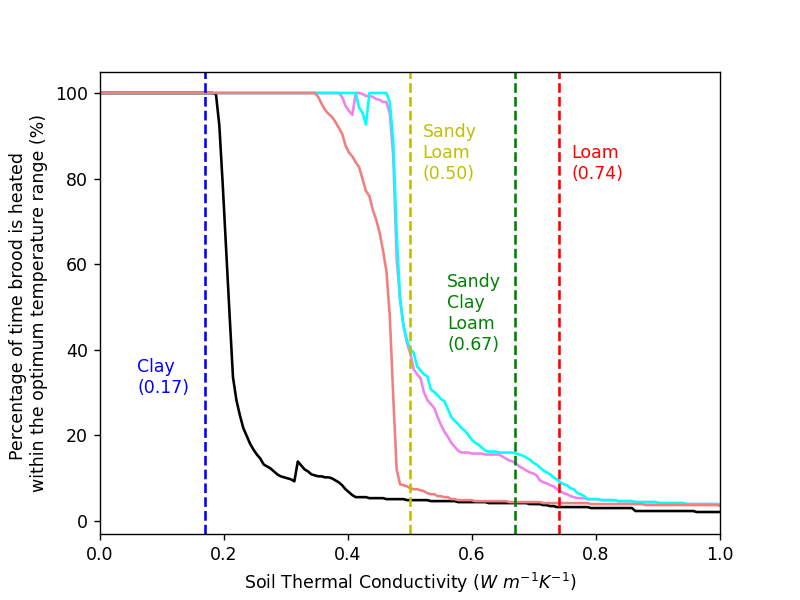

In [109]:
dt = datatable
fig = plt.figure()
#clay

#datatable length divided by 4 (the entries for one flower)
len_dt = int(len(dt)/4)

#PLOT LINE OF BEST FIT???
plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*0):(len_dt*1)], dt["Nest Success (%)"].iloc[(len_dt*0):(len_dt*1)], "violet")
plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*1):(len_dt*2)], dt["Nest Success (%)"].iloc[(len_dt*1):(len_dt*2)], "aqua")
plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*2):(len_dt*3)], dt["Nest Success (%)"].iloc[(len_dt*2):(len_dt*3)], "black")
plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*3):(len_dt*4)], dt["Nest Success (%)"].iloc[(len_dt*3):(len_dt*4)], "lightcoral")

#plt.title("1 bee, nest diameter 5cm, no feeding")
plt.ylabel("Percentage of time brood is heated \nwithin the optimum temperature range (%)")
plt.xlabel("Soil Thermal Conductivity ($W$ $m^{-1} K^{-1}$)")

plt.axvline(x=(0.17), color='b', linestyle = '--')
plt.axvline(x=(0.50), color='y', linestyle = '--')
plt.axvline(x=(0.67), color='g', linestyle = '--')
plt.axvline(x=(0.74), color='r', linestyle = '--')
plt.annotate('Clay\n(0.17)', xy = (0.2, 30), xytext = (0.06, 30),color = "b")
plt.annotate('Sandy\nLoam\n(0.50)', xy = (0.35, 30), xytext = (0.52, 80),color = "y")
plt.annotate('Sandy\nClay\nLoam\n(0.67)', xy = (0.2, 30), xytext = (0.56, 40),color = "g")
plt.annotate('Loam\n(0.74)', xy = (0.2, 30), xytext = (0.76,80), color = "r")
#plt.legend(["Field\nBean\n($4.4$ $kJ$ $hr^{-1}$)", "Oilseed\nRape\n($9.5$ $kJ$ $hr^{-1}$)", "Sunflower\n($0.3$ $kJ$ $hr^{-1}$)", "White\nClover\n($1.9$ $kJ$ $hr^{-1}$)"], frameon=False, bbox_to_anchor = [0.7,0.13])
plt.xlim([0, 1.0])


# datatable.to_csv("Data1_18_03_2022.csv")
# lar_datatable.to_csv("Lar_data1_18_03_2022.csv")
plt.savefig('aqua and black h vs ptot 1bee feed 7 larvae 0.003 sa 1.1 tight.svg', format='svg', bbox_inches = "tight")

### Figure 3b - PTOT vs thermal conductivity with 5 workers feeding 7 larvae in standard soil/nest area (clay, 0.003) on four different flowers

In [112]:
bees_array = [5]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]

# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
h_values = np.linspace(0, 5, 201)#[0.17, 0.50, 0.67, 0.74]#, 0.50, 0.67, 0.74, 3.85, 10, 20]#, 1, 5]
#h_values = np.linspace(0, 20, 201)

#nest_areas = [0.002]
nest_areas = [0.003]#[0.00785]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
travelling_it = [1]#, 10, 20]  
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []

nest_temps_array = []

bee_foraging_array = []
bee_employment_array = []

honeypot_energy_array = []
pollenpot_energy_array = []

#record pollen and nectar consumed each iteration by each worker
workers_nectar_consumed = []
workers_pollen_consumed = []

#record pollen and nectar consumed each iteration by each larvae

larvae_nectar_consumed = []
larvae_pollen_consumed = []

larvae_nectar_time = []
larvae_pollen_time = []




#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []

#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate dataframe

col_lar14 = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []







#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer

flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]

        
for z in bees_array:    #for each soil type

    
    
  

        #for each flower
    for b in range(len(flowers_pollen_per_hour)):
        for y in h_values:
    



            flowerpollenhour =  flowers_pollen_per_hour[b]
            flowernectarhour =  flowers_nectar_per_hour[b]






            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    #max_flower_energy = 360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    #max_nectar_energy = 10000
                    #max_pollen_energy = 10000
                    #max_flower_energy = (746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment

                    for i in walkers:

                        #total nectar and pollen brought into the nest
                        total_pollen.append(walkers[i].totalpollen)
                        total_nectar.append(walkers[i].totalnectar)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    col10.append((sum(energy_taken))/1000)


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

#datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

#datatable.to_csv("Data4_07_02_2022.csv")
#lar_datatable.to_csv("Lar_data4_07_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)



<IPython.core.display.Javascript object>


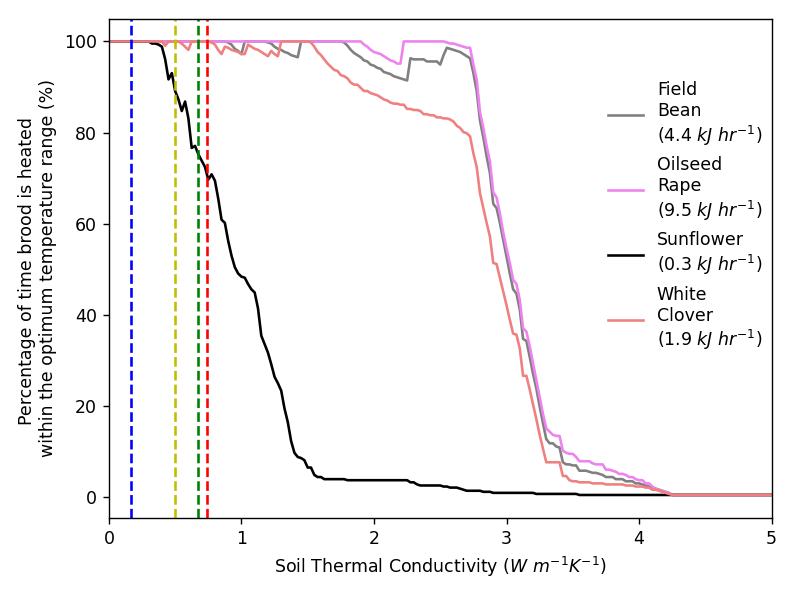

In [115]:
dt = datatable
fig = plt.figure()
#clay

#datatable length divided by 4 (the entries for one flower)
len_dt = int(len(dt)/4)

#PLOT LINE OF BEST FIT???

plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*0):(len_dt*1)], dt["Nest Success (%)"].iloc[(len_dt*0):(len_dt*1)], "grey")
plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*1):(len_dt*2)], dt["Nest Success (%)"].iloc[(len_dt*1):(len_dt*2)], "violet")
plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*2):(len_dt*3)], dt["Nest Success (%)"].iloc[(len_dt*2):(len_dt*3)], "black")
plt.plot(dt["Thermal Conductivity"].iloc[(len_dt*3):(len_dt*4)], dt["Nest Success (%)"].iloc[(len_dt*3):(len_dt*4)], "lightcoral")

#plt.title("1 bee, nest diameter 5cm, no feeding")
plt.ylabel("Percentage of time brood is heated \nwithin the optimum temperature range (%)")
plt.xlabel("Soil Thermal Conductivity ($W$ $m^{-1} K^{-1}$)")

plt.axvline(x=(0.17), color='b', linestyle = '--')
plt.axvline(x=(0.50), color='y', linestyle = '--')
plt.axvline(x=(0.67), color='g', linestyle = '--')
plt.axvline(x=(0.74), color='r', linestyle = '--')
# plt.annotate('Clay\n(0.17)', xy = (0.2, 30), xytext = (0.04, 30),color = "b")
# plt.annotate('Sandy\nLoam\n(0.50)', xy = (0.35, 30), xytext = (0.34, 80),color = "y")
# plt.annotate('Sandy\nClay\nLoam\n(0.67)', xy = (0.2, 30), xytext = (0.52, 80),color = "g")
# plt.annotate('Loam\n(0.74)', xy = (0.2, 30), xytext = (0.76,80), color = "r")

#plt.legend(["Field Bean ($4.4$ $kJ$ $hr^{-1}$)", "Oilseed Rape ($9.5$ $kJ$ $hr^{-1}$)", "Sunflower ($0.3$ $kJ$ $hr^{-1}$)", "White Clover ($1.9$ $kJ$ $hr^{-1}$)"], frameon=False, bbox_to_anchor = [0.5,0.5])
plt.legend(["Field\nBean\n($4.4$ $kJ$ $hr^{-1}$)", "Oilseed\nRape\n($9.5$ $kJ$ $hr^{-1}$)", "Sunflower\n($0.3$ $kJ$ $hr^{-1}$)", "White\nClover\n($1.9$ $kJ$ $hr^{-1}$)"], frameon=False, bbox_to_anchor = [0.73,0.3])
plt.xlim([0, 5])
plt.tight_layout()

# datatable.to_csv("Data1_18_03_2022.csv")
# lar_datatable.to_csv("Lar_data1_18_03_2022.csv")
plt.savefig('black and grey soil h value vs ptot, 5 bees 7 larvae 0.003 SA.svg', format='svg', bbox_inches = "tight")

### Figure 3c - PTOT and Total energy foraged vs distance, four flowers, 1 and 5 workers

In [116]:
bees_array = [1, 5]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]

# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
h_values = [0.74]#, 0.22, 0.29, 0.36, 0.43, 0.50, 0.67, 0.74]#np.linspace(0, 2, 21)#[0.17, 0.50, 0.67, 0.74]#, 0.50, 0.67, 0.74, 3.85, 10, 20]#, 1, 5]
#h_values = np.linspace(0, 20, 201)

#nest_areas = [0.002]
nest_areas = [0.003]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
travelling_it = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] 
#travelling_it = [1,5,10]
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []



flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]




#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []

#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate data

col_lar14 = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []







#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer


#for each soil type
for y in h_values:
    
    #for each flower
    for b in range(len(flowers_pollen_per_hour)):
    
         
                      
        flowerpollenhour =  flowers_pollen_per_hour[b]
        flowernectarhour =  flowers_nectar_per_hour[b]
                                              
    
    
    
        for z in bees_array:
            
            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    nest_honeypot_array = []
                    nest_pollenpot_array = []
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    max_flower_energy = 360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    max_nectar_energy = 10000
                    max_pollen_energy = 10000
                    #max_flower_energy = (746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []
                    nectar_taken = []
                    nectar_taken_this_iteration = []
                    pollen_taken = []
                    pollen_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment

                    for i in walkers:

                        #total nectar and pollen brought into the nest
                        total_pollen.append(walkers[i].totalpollen)
                        total_nectar.append(walkers[i].totalnectar)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    col10.append((sum(energy_taken))/1000)


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

datatable.to_csv("Data2_08_03_2022.csv")
lar_datatable.to_csv("Lar_data2_08_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)



In [ ]:
display(datatable[96:110])

<IPython.core.display.Javascript object>


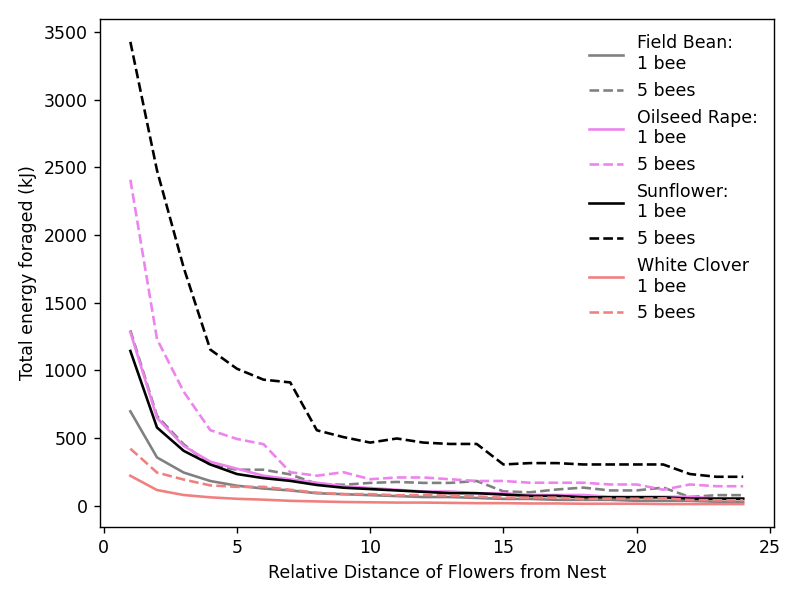

In [120]:
dt = datatable

#clay
fig, ax = plt.subplots()



#clay 1 bee




plt.plot(dt["Distance to Flower"].iloc[0:24], dt["Total energy foraged (kJ)"].iloc[0:24], color =  "grey", linestyle = "solid")
plt.plot(dt["Distance to Flower"].iloc[24:48], dt["Total energy foraged (kJ)"].iloc[24:48], color = "grey", linestyle = "dashed")

plt.plot(dt["Distance to Flower"].iloc[48:72], dt["Total energy foraged (kJ)"].iloc[48:72], color = "violet", linestyle = "solid")
plt.plot(dt["Distance to Flower"].iloc[72:96], dt["Total energy foraged (kJ)"].iloc[72:96], color = "violet", linestyle = "dashed")

plt.plot(dt["Distance to Flower"].iloc[96:120], dt["Total energy foraged (kJ)"].iloc[96:120],color =  "black", linestyle = "solid")
plt.plot(dt["Distance to Flower"].iloc[120:144], dt["Total energy foraged (kJ)"].iloc[120:144], color = "black", linestyle = "dashed")

plt.plot(dt["Distance to Flower"].iloc[144:168], dt["Total energy foraged (kJ)"].iloc[144:168], color = "lightcoral", linestyle = "solid")
plt.plot(dt["Distance to Flower"].iloc[168:192], dt["Total energy foraged (kJ)"].iloc[168:192],color =  "lightcoral", linestyle = "dashed")


#plt.legend(["Field Bean 1 bee ($4.4$ $kJ$ $hr^{-1}$)", " Field Bean 10 bees", "OSR 1 bee ($9.6$ $kJ$ $hr^{-1}$)", "OSR 10 bees", "Sunflower 1 bee  ($0.3$ $kJ$ $hr^{-1}$)", "Sunflower 10 bees", "White Clover 1 bee", "White Clover 10 bees ($1.9$ $kJ$ $hr^{-1}$)"])
plt.ylabel("Total energy foraged (kJ)")
plt.xlabel("Relative Distance of Flowers from Nest")
#plt.title("diameter 5cm, h = 0.17, 16 larvae")


#plt.legend(["Field\nBean\n($4.4$ $kJ$ $hr^{-1}$):\n1 bee","5 bees", "Oilseed\nRape\n($9.5$ $kJ$ $hr^{-1}$):\n1 bee", "5 bees", "Sunflower\n($0.3$ $kJ$ $hr^{-1}$):\n1 bee", "5 bees", "White\nClover\n($1.9$ $kJ$ $hr^{-1}$):\n1 bee", "5 bees"], frameon=False)
plt.legend(["Field Bean:\n1 bee","5 bees", "Oilseed Rape:\n1 bee", "5 bees", "Sunflower:\n1 bee", "5 bees", "White Clover\n1 bee", "5 bees"], frameon=False)
#plt.table(cellText=flowerdata.values, colWidths = [0.05]*5, colLabels=flowerdata.columns, bbox = [1.1, 0.0, 0.5, 0.5])
plt.tight_layout()
plt.savefig('black and grey d vs total energy foraged 1 and 5 bee 7 larvae 0.003sa.svg', format='svg', bbox_inches = "tight")

### Figure 3d PTOT, Number of larvae alive vs flower distance, 1 and 5 workers foraging on four different flowers

<IPython.core.display.Javascript object>


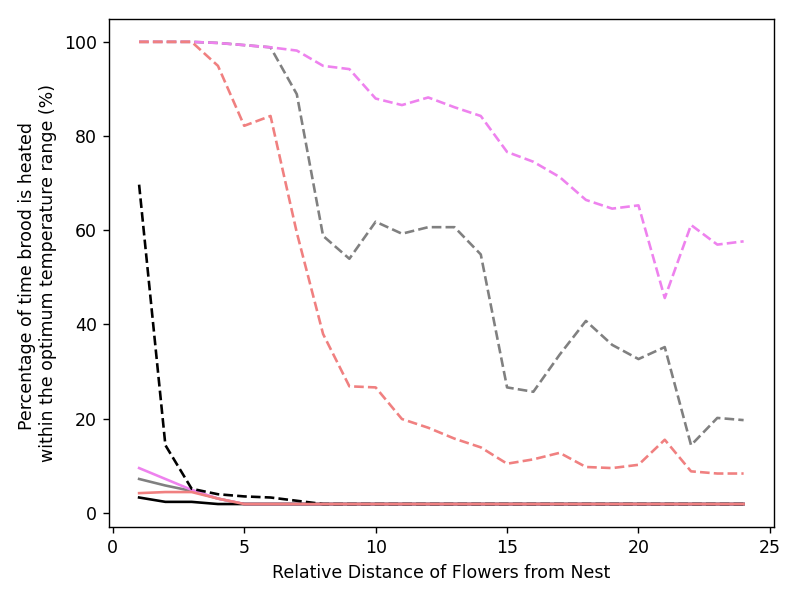

In [122]:
dt = datatable
fig = plt.figure()
#clay



plt.plot(dt["Distance to Flower"].iloc[0:24], dt["Nest Success (%)"].iloc[0:24],  color='grey', linestyle='solid')
plt.plot(dt["Distance to Flower"].iloc[24:48], dt["Nest Success (%)"].iloc[24:48], color = "grey", linestyle = "dashed")

plt.plot(dt["Distance to Flower"].iloc[48:72], dt["Nest Success (%)"].iloc[48:72], color = "violet", linestyle='solid')
plt.plot(dt["Distance to Flower"].iloc[72:96], dt["Nest Success (%)"].iloc[72:96],  color = "violet", linestyle = "dashed")

plt.plot(dt["Distance to Flower"].iloc[96:120], dt["Nest Success (%)"].iloc[96:120],  color = "black", linestyle='solid')
plt.plot(dt["Distance to Flower"].iloc[120:144], dt["Nest Success (%)"].iloc[120:144], color =  "black", linestyle = "dashed")

plt.plot(dt["Distance to Flower"].iloc[144:168], dt["Nest Success (%)"].iloc[144:168], color =  "lightcoral", linestyle='solid')
plt.plot(dt["Distance to Flower"].iloc[168:192], dt["Nest Success (%)"].iloc[168:192], color =  "lightcoral", linestyle = "dashed")

# plt.plot(dt["Distance to Flower"].iloc[192:216], dt["Nest Success (%)"].iloc[192:216])

# plt.plot(dt["Distance to Flower"].iloc[216:240], dt["Nest Success (%)"].iloc[216:240])
# plt.plot(dt["Distance to Flower"].iloc[240:264], dt["Nest Success (%)"].iloc[240:264])
# plt.plot(dt["Distance to Flower"].iloc[264:288], dt["Nest Success (%)"].iloc[264:288])

#plt.legend(["Field Bean 1 bee", " Field Bean 10 bees", "OSR 1 bee", "OSR 10 bees", "Sunflower 1 bee", "Sunflower 10 bees", "White Clover 1 bee", "White Clover 10 bees"], bbox_to_anchor = [1, 1])



#plt.legend(["Field Bean ($4.4$ $kJ$ $hr^{-1}$) - 1 bee", " Field Bean ($4.4$ $kJ$ $hr^{-1}$) - 10 bees", "Oilseed Rape ($9.6$ $kJ$ $hr^{-1}$) - 1 bee ", "Oilseed Rape ($9.6$ $kJ$ $hr^{-1}$) - 10 bees", "Sunflower ($0.3$ $kJ$ $hr^{-1}$) - 1 bee", "Sunflower ($0.3$ $kJ$ $hr^{-1}$) - 10 bees", "White Clover ($1.9$ $kJ$ $hr^{-1}$) - 1 bee", "White Clover ($1.9$ $kJ$ $hr^{-1}$) - 10 bees"], frameon=False, bbox_to_anchor = [0.4,1])
plt.ylabel("Percentage of time brood is heated \nwithin the optimum temperature range (%)")
plt.xlabel("Relative Distance of Flowers from Nest")
#plt.title("nest diameter 5cm, h = 0.17, 16 larvae")

#plt.legend(["Field\nBean\n($4.4$ $kJ$ $hr^{-1}$)", "Oilseed\nRape\n($9.5$ $kJ$ $hr^{-1}$)", "Sunflower\n($0.3$ $kJ$ $hr^{-1}$)", "White\nClover\n($1.9$ $kJ$ $hr^{-1}$)"], frameon=False)
plt.tight_layout()
plt.savefig('black and grey d vs ptot 1 and 5 bee 7 larvae 0.003 sa.svg', format='svg', bbox_inches = "tight")

## 3d no larvae alivve vs distance, and ptot vs distance

In [26]:
bees_array = [1, 2, 5, 10]#2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]#, 5, 10, 20]

# bees_array =  np.linspace(0, 25, 26)
# for i in range(len(bees_array)):
#     bees_array[i] = int(bees_array[i])


#[1]#, 2, 3, 4, 5, 10, 15, 20, 25]#, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100]#[1, 5, 10, 15, 20]#, 100]
#h values h_values = [0.08, 0.17, 0.27, 0.50, 0.67, 0.74, 1, 2, 3.85, 100, 500, 1000]
#h_values = np.linspace(0, 7, 11)#[0.17, 0.50, 0.67, 0.74]#, 0.50, 0.67, 0.74, 3.85, 10, 20]#, 1, 5]
#h_values = np.linspace(0, 20, 201)
h_values = [0.17]
#nest_areas = [0.002]
nest_areas = [0.003]#[0.00785]#np.arange(0.001, 0.016, 0.001)#np.linspace(0.001, 0.03, 10)
#diameter of the nest, in cm
#nest_areas = np.arange(1, 11, 1)

#h_values = np.linspace(0, 5, 10)
            
#the different numbers of iterations a bee will spend "travelling" to a flower i.e. from close to far away flowers
#travelling_it = [1]#, 10, 20]  
travelling_it = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]  
#travelling_it = np.arange(1, 25, 1)
    
nest_success_array = []
lst = []

nest_temps_array = []

bee_foraging_array = []
bee_employment_array = []

honeypot_energy_array = []
pollenpot_energy_array = []

#record pollen and nectar consumed each iteration by each worker
workers_nectar_consumed = []
workers_pollen_consumed = []

#record pollen and nectar consumed each iteration by each larvae

larvae_nectar_consumed = []
larvae_pollen_consumed = []

larvae_nectar_time = []
larvae_pollen_time = []




#arrays to hold data we will present in a pandas dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
#for nest surfface areas
col8 = []
#store distance to flowers
col9 = []

col10 = []

#store larval id
col_lar1 = []
#store target pollen
col_lar2 = []
#store actual pollen
col_lar3 = []
#store target nectar
col_lar4 = []
#store actuall nectar
col_lar5 = []
#percentage different nectar
col_lar6 = []
#percentage difference pollen
col_lar7 = []
#larvae alive or dead
col_lar8 = []
col_lar9 = []

col_lar10 = []
col_lar11 = []


col_lar12 = []
col_lar13 = []
#arrays for a separate dataframe

col_lar14 = []

thermalconducts = []

col7 = []
col8 = []
#arrayf for pollen
y_osr = []
y_sun = []
y_bea = []
y_clo = []

#arrayf for nectar
y_osrn = []
y_sunn = []
y_bean = []
y_clon = []


#array to store total pollen foraged in each simulatoin
total_pollen = []
total_nectar = []

#the amount of pollen and nectar in pots at the end of the simulation
nest_pollenstore = []
nest_nectarstore = []

larvae_pollenconsumed = []
larvae_nectarconsumed = []

nectar_energy_for_thermoregulation = []







#array of flower pollen and nectar energies per hour for OSR, sunflower, field been and white clvoer

# flowers_nectar_per_hour = [9450,	326.6964122]
# flowers_pollen_per_hour = [3502.040816,	9787.072243]


# flowername = ["Oilseed Rape", "Sunflower"]
# flowername = ["Oilseed Rape", "Sunflower"]

flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]


flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]


for b in range(len(flowers_pollen_per_hour)):        
    for z in bees_array:    #for each soil type

    
    
  

        #for each flower
    
        for y in h_values:
    



            flowerpollenhour =  flowers_pollen_per_hour[b]
            flowernectarhour =  flowers_nectar_per_hour[b]






            for a in nest_areas:
                
                #NEED TO IMPLEMENT THIS LOOP
                
                for c in travelling_it:
                
                    flower_distance = c


                    #an array to store the energy loss per iteration.  We will then sum these to find total energy change
                    sum_q = []
                    nest_success_array = []
                    #array to store the energy spent feeding larvae
                    larv_cost = []

                    #arrays to record pollen and nectar foraged over time
                    pollen_foraged = []
                    nectar_foraged = []


                    #number of iterations (each iteration is an hour)
                    total_it = 24*18
                    #number of iterations before switching frmo day to night
                    day_length_it = 14
                    night_length_it = 24 - day_length_it

                    h_value = y
                    #number of bees we begin simulation with
                    initial_walker_number = z

                    #number of larvae in the brood
                    n_larvae = 7
                    #energy oer day the larvae need to grow
                    #larv_per_day = 578



                    #original energy values were for 1 second = 1 iteration.  We are now using 1 hour time steps, so we multiple all energy values
                    #by 3600
                    time_step = 3600

                    #conversion factor from arbitrary to real energy is 1 arbitrary energy = 0.04
                    energy_conversion_factor = 0.04

                    #10 flowers of oilseed rape, each providing 360 J, is used here
                    #max_flower_energy = 360*10 #10*energy_conversion_factor*10
                    #get actual numbers for a given flower
                    max_nectar_energy = 0#10000
                    max_pollen_energy = 0#10000
                    max_flower_energy = 0#(746.469*h_value)

                    #energy lost by walker in flight
                    energy_loss_in_flight = 0
                    #energy lost by walker at rest each iteration(1 mJ per second, timed by 30 as one iteration is 30 seconds)
                    energy_loss_at_rest = 0#0.01*time_step
                    #the target energy each walker will be set to collect from flowers - at the moment this is the energy of one full flower
                    #bee initally has plenty of pollen and nectar so it's target energy is 0
                    walker_target_energy = 0#max_flower_energy*10
                    walker_target_pollen = 0
                    walker_target_nectar = 0
                    
                    nest_honeypot_array = []
                    nest_pollenpot_array = []
                    nectar_taken = []
                    nectar_taken_this_iteration = []
                    pollen_taken = []
                    pollen_taken_this_iteration = []

                    #here we will define how much 1 unit of arbitrary energy is worth

                    #energy per iteration work spends fanning brood
                    worker_fanning_energy = 1*energy_conversion_factor*time_step
                    #energy per iteration worker spends heating brood via NFT
                    worker_incubating_energy = 1*energy_conversion_factor*time_step
                    #temperature by which nest cools upon being fanned by workers
                    nest_cooling_amount = (worker_fanning_energy/(0.063*4200))#*time_step
                    #temperature by which nest warms upon being incubated by workers
                    nest_warming_amount = (worker_incubating_energy/(0.063*4200))#*time_step

                    #amount of energy bee has from moment of creation (at 0, bee is dead)
                    walker_life_energy = 100*energy_conversion_factor
                    #amount of energy in honeypot below which it needs to be refilled
                    honeypot_energy_store = 500*energy_conversion_factor#*time_step
                    #amount of energy a bee will take from the honeypot to replenish its own energy
                    honeypot_feed_amount = 50*energy_conversion_factor*time_step
                    #energy value at which bee needs more energy and feeds from the hoenypot
                    walker_hunger_threshold = 50*energy_conversion_factor*time_step




                    #an array to hold how many wlakers there are in each iteration
                    number_of_bees_list = []
                    #arrays to store values from each simulation iteration
                    dead_bees_over_time = []
                    alive_bees_over_time =[]
                    nest_temperature = []
                    honeypot = []
                    walker_energy = []
                    number_of_flowers = []
                    walker_tally = 0
                    target_energy = []
                    stepcounter = []
                    tally_dead_walkers = []

                    number_bees_in_nest = []

                    #counters the iteration number we are on
                    counter = 0

                    Surroundings.instances = []
                    surroundings = Surroundings()
                    surroundings.daytime = True

                    #empties the list of instances in the nest class to reset the experiment
                    Nest.instances = []
                    #y coord of nest
                    nest_x = 10
                    #x coord of nest
                    nest_y = 10
                    #an instance of the nest class
                    nest = Nest(nest_x, nest_y)
                    nest.area = a

                    #joules of nectar the honeypot has at the start of the simulation
                    nest.honeypot = 0#17820.5
                    #joules worth of pollen the pollen pot has in it at the start of the simulation
                    nest.pollenpot = 0#17820.5

                    larva_tally = 0
                    Larva.instances = []
                    larvae = {}
                    for i in range(0, n_larvae):
                        new_larva()


                    #114 flowers, for L = 21, flowers every other row, alternating
                    flower_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
                    flower_y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


                    flower_energy_loss_per_iteration = max_flower_energy

                    #empties the list of instances in the Flower class to reset the experiment
                    Flower.instances = []
                    flowers = {}
                    flower_energy = {}

                    #an array to store the energy taken from all flowers per iteration
                    energy_taken = []
                    energy_taken_this_iteration = []


                    #the number of flowers we want to have in our simulation
                    initial_flower_number = len(flower_x)
                    for i in range (initial_flower_number):
                        #makes a new flower
                        new_flower()


                        #empties the list of instances in the Walker class to reset the experiment
                    Walker.instances = []
                    walkers = {}
                    #a dictionary to hold the energies of the different walkers
                    walker_energy = {}
                    #copy dictionaries - needed to store data after deleting dead bees
                    walkers_copy = {}
                    walkers_energy_copy = {}




                    for i in range(0, initial_walker_number):
                        new_walker()

                    for i in walkers:
                        walkers[i].choose_target()


                    feeding_iterations = 0

                    #the size of the lattive
                    L = 21

                    lattice = np.zeros((L,L), dtype='uint8')

                    for i in range (0, total_it):
                        update()
                        counter += 1


                               #code to run for each flower treatment

                    for i in walkers:

                        #total nectar and pollen brought into the nest
                        total_pollen.append(walkers[i].totalpollen)
                        total_nectar.append(walkers[i].totalnectar)

                        #pollen and nectar left over at end of simulation
                        nest_pollenstore.append(nest.pollenpot)
                        nest_nectarstore.append(nest.honeypot)

                        #pollen and nectar consumed by larvae

                        p = 0
                        n = 0
                        #add up total pollen consumed be all larvae, and total nectar consumed by all larvae
                        for l in larvae:
                            p += sum(larvae[l].pollen)
                            n += sum(larvae[l].nectar)
                        larvae_pollenconsumed.append(p)
                        larvae_nectarconsumed.append(n)

                        #nectar used for heating
                        nectar_energy_for_thermoregulation.append(nest.runningcosts)



        #             print("h = ", h_value, "No. bees = ", initial_walker_number, "No. flowers = ", initial_flower_number, "Nest success: ", nest_success(nest_temperature))

        #             print("Flower: ", flowername[b])
        #             print("Energy loss from cooling nest: ", sum(np.abs(sum_q)))
        #             print("Energy feeding larvae: ", sum(larv_cost))

        #             print("Energy needed to run nest:", (sum(np.abs(sum_q))+sum(larv_cost)))
        #             #print("Energy taken from honeypot per day: ", max(np.abs(honeypot))/(total_it/24))
        #             print("")

                    #h_names = ["Concrete (lower)", "Clay", "Sandy Loam", "Sandy Clay Loam", "Loam", "Concrete (upper)", "Air (light breeze)", "Air (strong breeze)"]


                    col1.append(y)      

                    col2.append(z)
                    col3.append(a)
                    col4.append(flowername[b])

                    col5.append(nest_success(nest_temperature))
                    col6.append((sum(np.abs(sum_q)))/1000)
                    col7.append((sum(larv_cost))/1000)
                    col8.append((sum(np.abs(sum_q))+sum(larv_cost))/1000)
                    col9.append(c)
                    col10.append((sum(energy_taken))/1000)


        #for pollen
                    for l in larvae:
                #record larval id
                        col_lar1.append(larvae[l].id)
                        #store target pollen
                        col_lar2.append(larvae[l].target_pollen)
                        thermalconducts.append(str(h_value))

                        #store actual pollen
                        col_lar3.append(sum(larvae[l].pollen))
                        col_lar10.append(c)
                        #store target nectar
                        col_lar4.append(larvae[l].target_nectar)
                        #store actuall nectar
                        col_lar5.append(sum(larvae[l].nectar))
                        col_lar11.append(z)
                        col_lar9.append(flowername[b])
                        col_lar12.append(larvae[l].feedtally)
                        col_lar13.append((total_it-96)*2)

                        #difference in pollen
                                               
                        if larvae[l].target_pollen > 0:
                            diff_poll = 100*((larvae[l].target_pollen - sum(larvae[l].pollen))/larvae[l].target_pollen)
                            col_lar7.append(diff_poll)
                        else:
                            col_lar7.append("Not fed")
                        
                                        
                       #difference in nectar
                    
                        if larvae[l].target_nectar > 0:
                            diff_nect = 100*((larvae[l].target_nectar - sum(larvae[l].nectar))/larvae[l].target_nectar)
                    #store % difference in nectar
                            col_lar6.append(diff_nect)
                        else:
                            col_lar6.append("Not fed")

                        #if larvae "Not fed"
                        if isinstance(diff_poll, str) == True:
                            col_lar8.append("Dead")  
                        #if larvae receives 10 less pollen than it should 
                        elif np.abs(diff_poll) > 10:
                            col_lar8.append("Dead")
                        #if larvae "Not fed"
                        elif isinstance(diff_nect, str) == True:
                            col_lar8.append("Dead")
                        #if larvae recives 10 less nectar than it should
                        elif np.abs(diff_nect) > 10:
                            col_lar8.append("Dead")
                        else:
                            col_lar8.append("Alive")
                            
                        
                        #if larvae not fed for more than 10 iterations
                        if ((total_it-96)*2) - (larvae[l].feedtally) > 10:
                            col_lar14.append("Dead")
                        else:
                            col_lar14.append("Alive")






                        if flowername[b] == "Oilseed Rape":
                            y_osr.append(sum(larvae[l].pollen)/1000)
                            y_osrn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Sunflower":
                            y_sun.append(sum(larvae[l].pollen)/1000)
                            y_sunn.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "Field Bean":
                            y_bea.append(sum(larvae[l].pollen)/1000)
                            y_bean.append(sum(larvae[l].nectar)/1000)
                        elif flowername[b] == "White Clover":
                            y_clo.append(sum(larvae[l].pollen)/1000)
                            y_clon.append(sum(larvae[l].nectar)/1000)





                """Here we generate graphs for each experimental condition and save them for later examination """

        #         graph = "Title"#" Energy foraged and stored in honeypot vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         energy_foraged_and_stored_vs_time(energy_taken, honeypot, total_it, graph_title, graph)


        #         graph = " Number of Bees vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(number_of_bees_list, "Time (hours)", "Number of Bees", graph_title, f_title(graph))

        #         graph = " Honeypot Energy vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(honeypot, "Time (hours)", "Honeypot Energy (J)", graph_title, f_title(graph))

        #         graph = " Nest Temperature vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)

        #         plot(nest_temperature, "Time (hours)", "Nest Temperature ($^o$C)", graph_title, f_title(graph))

        #         graph = " Energy foraged vs Time "
        #         graph_title = g_title(graph, h_value, initial_walker_number, initial_flower_number)
        #         plot(energy_taken, "Time (hours)", "Energy Foraged from Flowers (J)", graph_title, f_title(graph))
    """

                x = np.linspace(0, total_it + 1, total_it)
                y1 = pollen_foraged
                #lets convert this to a cumulative amount

                #convert J to kJ
                for i in range(len(y1)):
                    y1[i] = (y1[i])/1000

                y1c = np.zeros(total_it)
                for i in range(len(y1)):
                    if i == 0:
                        y1c[i] = y1[i]
                    else:
                        y1c[i] = (y1[i]+ y1c[i-1])
                plt.figure()
                plt.plot(x, y1c)
                plt.title("Cumulative Pollen Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Pollen Energy Foraged (kJ)")


                y2 = nectar_foraged
                #convert J to kJ
                for i in range(len(y2)):
                    y2[i] = (y2[i])/1000

                y2c = np.zeros(total_it)
                for i in range(len(y2)):
                    if i == 0:
                        y2c[i] = y2[i]
                    else:
                        y2c[i] = (y2[i]+ y2c[i-1])
                plt.figure()
                plt.plot(x, y2c)
                plt.title("Cumulative Nectar Energy Foraged Over Time")
                plt.xlabel("Time (hours)")
                plt.ylabel("Nectar Energy Foraged (kJ)")

    """
                #nest_success_array.append((z, initial_flower_number, initial_walker_number, nest_success(nest_temperature)))
            #lst.append(nest_success_array)


            
         


#print(bees_array)
#print(nest_success_array)
datatable = pd.DataFrame({"Thermal Conductivity": col1, "Number of Bees": col2, "Nest Surface Area": col3,
                         "Flower": col4, "Distance to Flower": col9, "Nest Success (%)" : col5, "Total energy foraged (kJ)": col10, "Energy Heating Nest (kJ)": col6, 
                          "Energy Feeding Larvae (kJ)": col7, "Energy to heat and feed (kJ)": col8})

#datatable.to_csv("Data5_01022022.csv")

lar_datatable = pd.DataFrame({"Flower": col_lar9, "Thermal conductivity": thermalconducts, "Number of bees": col_lar11, "Distance to Flower": col_lar10, "Larval ID": col_lar1, "Target Pollen Energy": col_lar2, "Actual Pollen Energy Received": col_lar3,
                         "Target Nectar Energy": col_lar4, "Actual Nectar Energy Received" : col_lar5, "% Difference Pollen": col_lar7,"% Difference Nectar": col_lar6,  "Alive/Dead?": col_lar8, "Expected Feeds": col_lar13, "Feed Tally": col_lar12, "Alive/Dead": col_lar14})

#datatable.to_csv("Data4_07_02_2022.csv")
#lar_datatable.to_csv("Lar_data4_07_03_2022.csv")
#pd.set_option('display.max_rows', None)
#display(datatable)
#display(lar_datatable)
#df_styled = datatable.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(datatable,"Data4.csv")
#datatable.to_csv("Data0_08022022.csv")
#print(datatable)



In [133]:
display(lar_datatable)

,Flower,Thermal conductivity,Number of bees,Distance to Flower,Larval ID,Target Pollen Energy,Actual Pollen Energy Received,Target Nectar Energy,Actual Nectar Energy Received,% Difference Pollen,% Difference Nectar,Alive/Dead?,Expected Feeds,Feed Tally,Alive/Dead
0,Field Bean,0.17,1,1,0,3647,3647,7054,7054,0.000000,0.000000,Alive,672,476,Dead
1,Field Bean,0.17,1,1,1,3648,3648,7133,7133,0.000000,0.000000,Alive,672,476,Dead
2,Field Bean,0.17,1,1,2,3630,3630,7264,7234,0.000000,0.412996,Alive,672,475,Dead
3,Field Bean,0.17,1,1,3,3562,3562,7065,7046,0.000000,0.268931,Alive,672,475,Dead
4,Field Bean,0.17,1,1,4,3520,3520,7000,6970,0.000000,0.428571,Alive,672,475,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,White Clover,0.17,5,24,2,16165,836,31767,2449,94.828333,92.290742,Dead,672,140,Dead
1340,White Clover,0.17,5,24,3,16479,793,32605,2534,95.187815,92.228186,Dead,672,139,Dead
1341,White Clover,0.17,5,24,4,16430,772,31662,2455,95.301278,92.246226,Dead,672,135,Dead
1342,White Clover,0.17,5,24,5,16369,657,32263,2618,95.986316,91.885442,Dead,672,132,Dead


In [27]:
lt = lar_datatable
index = np.arange(0, (len(lt)+1), n_larvae)
#print(index)
y_osr1 = []
y_sun1 = []
y_osr10 = []
y_sun10 = []

y_osr2 = []
y_sun2 = []
y_osr5 = []
y_sun5 = []
#go through each experimental run
for i in index:
    df2 = lt.iloc[i:(i+n_larvae)]
 
        
    a = df2['Number of bees'].tolist()
    #if in clay

    if df2['Alive/Dead?'].str.contains('Alive').sum():
        #if field bean
        if df2['Flower'].str.contains('Field Bean').all() == True:
            if 1 in a:
                y_fb1_c.append(df2['Alive/Dead?'].value_counts().Alive)
            if 5 in a:
                y_fb5_c.append(df2['Alive/Dead?'].value_counts().Alive)
        #if oilseed rape
        if df2['Flower'].str.contains('Oilseed Rape').all() == True:  
            #if 1 bee
            if 1 in a:
                y_osr1_c.append(df2['Alive/Dead?'].value_counts().Alive)
            #if 5 bees
            if 5 in a:
                y_osr5_c.append(df2['Alive/Dead?'].value_counts().Alive)
        #if sunflower
        if df2['Flower'].str.contains('Sunflower').all() == True:
            if 1 in a:
                y_sun1_c.append(df2['Alive/Dead?'].value_counts().Alive)
            if 5 in a:
                y_sun5_c.append(df2['Alive/Dead?'].value_counts().Alive)
        #if white clover
        if df2['Flower'].str.contains('White Clover').all() == True:
            if 1 in a:
                y_sun1_c.append(df2['Alive/Dead?'].value_counts().Alive)
            if 5 in a:
                y_sun5_c.append(df2['Alive/Dead?'].value_counts().Alive)

    #if none alive, all are dead
    else:

        if df2['Flower'].str.contains('Field Bean').all() == True:
             if 1 in a:
         #count how many larvae dead
                y_fb1_c.append(0)
             if 5 in a:
                y_fb5_c.append(0)
        if df2['Flower'].str.contains('Oilseed Rape').all() == True:
             if 1 in a:
         #count how many larvae dead
                y_osr1_c.append(0)
             if 5 in a:
                y_osr5_c.append(0)

        if df2['Flower'].str.contains('Sunflower').all() == True:
         #count how many larvae dead
            if 1 in a:
         #count how many larvae dead
                y_sun1_c.append(0)
            if 5 in a:
                y_sun5_c.append(0)
        if df2['Flower'].str.contains('White Clover').all() == True:
             if 1 in a:
         #count how many larvae dead
                y_wc1_c.append(0)
             if 5 in a:
                y_wc5_c.append(0)


# print(y_osr1)
# print(y_osr10)
# print(y_sun1)
# print(y_sun10)
print(len(y_sun1_c))


plt.figure()
#x = 
x = travelling_it
#x = [1,2,3,4,5,6]
plt.plot(x, y_osr1_c, 'y-', alpha = 1)
#plt.plot(x, y_osr2, 'y--', alpha = 1)
#plt.plot(x, y_osr5_c, 'y-.', alpha = 1)
#plt.plot(x, y_osr10, 'y:', alpha =1)

#plt.plot(x, y_sun1_c, 'g-', alpha = 1)
#plt.plot(x, y_sun2, 'g--', alpha = 1)
#plt.plot(x, y_sun5_c, 'g-.', alpha = 1)
#plt.plot(x, y_sun10, 'g:', alpha = 1)


plt.plot(x, y_fb1_c, '-', alpha = 1)
plt.plot(x, y_wc1_c, '-', alpha = 1)

#plt.plot(x, y_sun1, 'b-', alpha = 1)
#plt.plot(x, y_sun10, 'b--', alpha = 1)
#plt.ylim(0, 17)
plt.ylabel("Number of larvae alive at\n the end of the 18 day simulation")
plt.xlabel("Relative Distance of Flowers from Nest")
#plt.legend(["Oilseed Rape, 1 bee","Oilseed Rape, 2 bees", "Oilseed Rape, 5 bees", "Oilseed Rape, 10 bees", "Sunflower, 1 bee","Sunflower, 2 bees", "Sunflower, 5 bees", "Sunflower, 10 bees"], bbox_to_anchor = [1,1])
plt.legend(["Oilseed Rape, 1 bee", "Oilseed Rape, 5 bees",  "Sunflower, 1 bee", "Sunflower, 5 bees"], bbox_to_anchor = [1,1])
plt.tight_layout()
#plt.savefig('10.03.2022 Legend Flower distance vs larval survival', format='svg', bbox_inches = "tight")

NameError: name 'y_fb1_c' is not defined

<IPython.core.display.Javascript object>


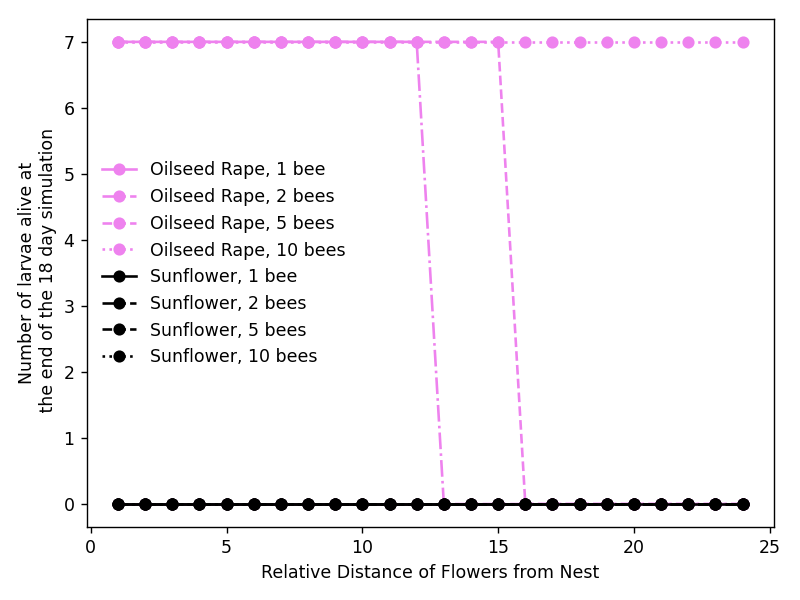

In [30]:
lt = lar_datatable
index = np.arange(0, (len(lt)+1), n_larvae)
#print(index)
y_osr1 = []
y_sun1 = []
y_osr10 = []
y_sun10 = []

y_osr2 = []
y_sun2 = []
y_osr5 = []
y_sun5 = []

#go through each experimental run
for i in index:
    df2 = lt.iloc[i:(i+n_larvae)]
 
        
    a = df2['Number of bees'].tolist()
    #check that Alive is present, else code will break
    if df2['Alive/Dead'].str.contains('Alive').sum():


        if df2['Flower'].str.contains('Oilseed Rape').all() == True:     
            if 1 in a:

                y_osr1.append(df2['Alive/Dead?'].value_counts().Alive)
                
            if 2 in a:

                y_osr2.append(df2['Alive/Dead?'].value_counts().Alive)
                
            if 5 in a:

                y_osr5.append(df2['Alive/Dead?'].value_counts().Alive)

            #code is running this when it shouldn't! 
            if 10 in a:
                y_osr10.append(df2['Alive/Dead?'].value_counts().Alive)
            

        if df2['Flower'].str.contains('Sunflower').all() == True:
            if 1 in a:
                y_sun1.append(df2['Alive/Dead?'].value_counts().Alive)
            if 10 in a:
                y_sun10.append(df2['Alive/Dead?'].value_counts().Alive)
                
            if 2 in a:
                y_sun2.append(df2['Alive/Dead?'].value_counts().Alive)
            if 5 in a:
                y_sun5.append(df2['Alive/Dead?'].value_counts().Alive)


    #if none alive, all are dead
    else:
        if df2['Flower'].str.contains('Oilseed Rape').all() == True:
             if 1 in a:
         #count how many larvae dead
                y_osr1.append(0)
            
             if 10 in a:
                y_osr10.append(0)
                
             if 2 in a:
         #count how many larvae dead
                y_osr2.append(0)
             if 5 in a:
                y_osr5.append(0)

        if df2['Flower'].str.contains('Sunflower').all() == True:
         #count how many larvae dead
            if 1 in a:
         #count how many larvae dead
                y_sun1.append(0)
            if 10 in a:
                y_sun10.append(0)
            if 2 in a:
         #count how many larvae dead
                y_sun2.append(0)
            if 5 in a:
                y_sun5.append(0)

            
# print(y_osr1)
# print(y_osr10)
# print(y_sun1)
# print(y_sun10)
# print(len(y_osr1),len(y_osr10),len(y_sun1),len(y_sun10))


plt.figure()
#x = 
x = travelling_it
#x = [1,2,3,4,5,6]
plt.plot(x, y_osr1, "o", color = "violet", linestyle = 'solid', alpha = 1)
plt.plot(x, y_osr2, "o",color = "violet", linestyle = 'dashdot', alpha = 1)
plt.plot(x, y_osr5, "o",color = "violet", linestyle = 'dashed', alpha = 1)
plt.plot(x, y_osr10,"o", color = "violet", linestyle = 'dotted', alpha =1)

plt.plot(x, y_sun1, "o",color = "black", linestyle = 'solid', alpha = 1)
plt.plot(x, y_sun2, "o",color = "black", linestyle = 'dashdot', alpha = 1)
plt.plot(x, y_sun5,"o",color = "black", linestyle = 'dashed', alpha = 1)
plt.plot(x, y_sun10,"o", color = "black", linestyle = 'dotted', alpha = 1)

#plt.plot(x, y_sun1, 'b-', alpha = 1)
#plt.plot(x, y_sun10, 'b--', alpha = 1)
#plt.ylim(0, 17)
plt.ylabel("Number of larvae alive at\n the end of the 18 day simulation")
plt.xlabel("Relative Distance of Flowers from Nest")
plt.legend(["Oilseed Rape, 1 bee","Oilseed Rape, 2 bees", "Oilseed Rape, 5 bees", "Oilseed Rape, 10 bees", "Sunflower, 1 bee","Sunflower, 2 bees", "Sunflower, 5 bees", "Sunflower, 10 bees"], bbox_to_anchor = [0.4,0.75], frameon = False)
#plt.legend(["Oilseed Rape, 1 bee", "Oilseed Rape, 5 bees",  "Sunflower, 1 bee", "Sunflower, 5 bees"], bbox_to_anchor = [1,1])
plt.tight_layout()
#plt.savefig('black and violet legend Flower distance vs larval survival.svg', format='svg', bbox_inches = "tight")

In [147]:
display(datatable)

,Thermal Conductivity,Number of Bees,Nest Surface Area,Flower,Distance to Flower,Nest Success (%),Total energy foraged (kJ),Energy Heating Nest (kJ),Energy Feeding Larvae (kJ),Energy to heat and feed (kJ)
0,0.17,1,0.003,Field Bean,1,100.000000,682.687995,19.140358,73.549,92.689358
1,0.17,1,0.003,Field Bean,2,100.000000,341.343998,19.128701,73.706,92.834701
2,0.17,1,0.003,Field Bean,3,100.000000,229.884733,19.123804,73.281,92.404804
3,0.17,1,0.003,Field Bean,4,100.000000,167.188897,19.113690,72.712,91.825690
4,0.17,1,0.003,Field Bean,5,100.000000,139.324081,19.095086,72.315,91.410086
...,...,...,...,...,...,...,...,...,...,...
379,0.17,10,0.003,White Clover,20,88.657407,84.054738,18.206584,52.710,70.916584
380,0.17,10,0.003,White Clover,21,91.666667,88.365237,18.442425,60.365,78.807425
381,0.17,10,0.003,White Clover,22,47.453704,34.483995,15.569586,21.076,36.645586
382,0.17,10,0.003,White Clover,23,78.472222,62.502241,17.635089,46.649,64.284089


<IPython.core.display.Javascript object>


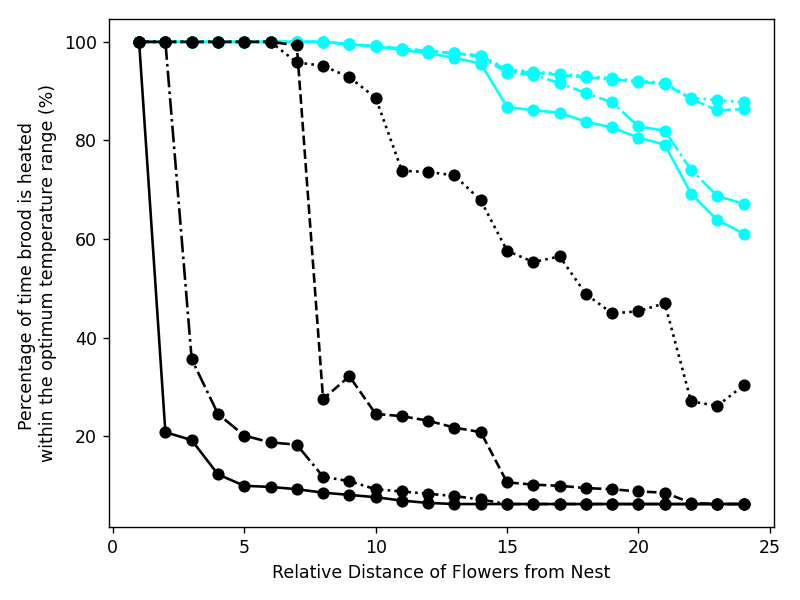

In [33]:
dt = datatable
fig = plt.figure()
#clay



plt.plot(dt["Distance to Flower"].iloc[96:120], dt["Nest Success (%)"].iloc[96:120],  "o",color='aqua', linestyle='solid')
plt.plot(dt["Distance to Flower"].iloc[120:144], dt["Nest Success (%)"].iloc[120:144],"o", color = "aqua", linestyle = "dashdot")

plt.plot(dt["Distance to Flower"].iloc[144:168], dt["Nest Success (%)"].iloc[144:168],"o", color = "aqua", linestyle='dashed')
plt.plot(dt["Distance to Flower"].iloc[168:192], dt["Nest Success (%)"].iloc[168:192], "o", color = "aqua", linestyle = "dotted")



plt.plot(dt["Distance to Flower"].iloc[192:216], dt["Nest Success (%)"].iloc[192:216],"o",  color = "black", linestyle='solid')
plt.plot(dt["Distance to Flower"].iloc[216:240], dt["Nest Success (%)"].iloc[216:240],"o", color =  "black", linestyle = "dashdot")

plt.plot(dt["Distance to Flower"].iloc[240:264], dt["Nest Success (%)"].iloc[240:264],"o", color =  "black", linestyle='dashed')
plt.plot(dt["Distance to Flower"].iloc[264:288], dt["Nest Success (%)"].iloc[264:288],"o", color =  "black", linestyle = "dotted")

# plt.plot(dt["Distance to Flower"].iloc[192:216], dt["Nest Success (%)"].iloc[192:216])

# plt.plot(dt["Distance to Flower"].iloc[216:240], dt["Nest Success (%)"].iloc[216:240])
# plt.plot(dt["Distance to Flower"].iloc[240:264], dt["Nest Success (%)"].iloc[240:264])
# plt.plot(dt["Distance to Flower"].iloc[264:288], dt["Nest Success (%)"].iloc[264:288])

#plt.legend(["Field Bean 1 bee", " Field Bean 10 bees", "OSR 1 bee", "OSR 10 bees", "Sunflower 1 bee", "Sunflower 10 bees", "White Clover 1 bee", "White Clover 10 bees"], bbox_to_anchor = [1, 1])



#plt.legend(["Field Bean ($4.4$ $kJ$ $hr^{-1}$) - 1 bee", " Field Bean ($4.4$ $kJ$ $hr^{-1}$) - 10 bees", "Oilseed Rape ($9.6$ $kJ$ $hr^{-1}$) - 1 bee ", "Oilseed Rape ($9.6$ $kJ$ $hr^{-1}$) - 10 bees", "Sunflower ($0.3$ $kJ$ $hr^{-1}$) - 1 bee", "Sunflower ($0.3$ $kJ$ $hr^{-1}$) - 10 bees", "White Clover ($1.9$ $kJ$ $hr^{-1}$) - 1 bee", "White Clover ($1.9$ $kJ$ $hr^{-1}$) - 10 bees"], frameon=False, bbox_to_anchor = [0.4,1])
plt.ylabel("Percentage of time brood is heated \nwithin the optimum temperature range (%)")
plt.xlabel("Relative Distance of Flowers from Nest")
#plt.title("nest diameter 5cm, h = 0.17, 16 larvae")

#plt.legend(["Field\nBean\n($4.4$ $kJ$ $hr^{-1}$)", "Oilseed\nRape\n($9.5$ $kJ$ $hr^{-1}$)", "Sunflower\n($0.3$ $kJ$ $hr^{-1}$)", "White\nClover\n($1.9$ $kJ$ $hr^{-1}$)"], frameon=False)
plt.tight_layout()
#plt.savefig('black and aqua 3d osr and sunflower d vs ptot 1 and 5 bee 7 larvae 0.003 sa.svg', format='svg', bbox_inches = "tight")

## Other

[   0    7   14   21   28   35   42   49   56   63   70   77   84   91
   98  105  112  119  126  133  140  147  154  161  168  175  182  189
  196  203  210  217  224  231  238  245  252  259  266  273  280  287
  294  301  308  315  322  329  336  343  350  357  364  371  378  385
  392  399  406  413  420  427  434  441  448  455  462  469  476  483
  490  497  504  511  518  525  532  539  546  553  560  567  574  581
  588  595  602  609  616  623  630  637  644  651  658  665  672  679
  686  693  700  707  714  721  728  735  742  749  756  763  770  777
  784  791  798  805  812  819  826  833  840  847  854  861  868  875
  882  889  896  903  910  917  924  931  938  945  952  959  966  973
  980  987  994 1001 1008 1015 1022 1029 1036 1043 1050 1057 1064 1071
 1078 1085 1092 1099 1106 1113 1120 1127 1134 1141 1148 1155 1162 1169
 1176 1183 1190 1197 1204 1211 1218 1225 1232 1239 1246 1253 1260 1267
 1274 1281 1288 1295 1302 1309 1316 1323 1330 1337 1344]
[1, 2, 3, 4, 5, 6, 7

<IPython.core.display.Javascript object>


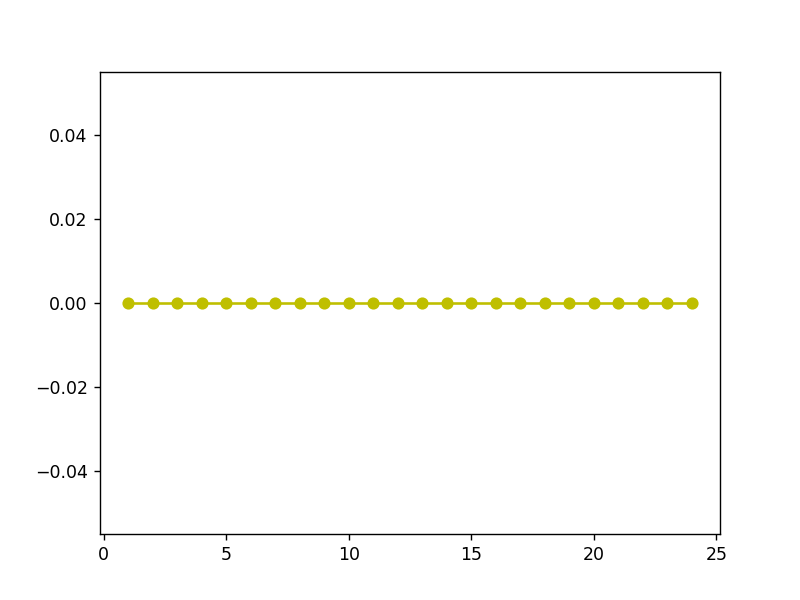

ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

In [129]:
lt = lar_datatable
index = np.arange(0, (len(lt)+1), n_larvae)
print(index)
y_osr1 = []
y_sun1 = []
y_osr10 = []
y_sun10 = []

y_osr2 = []
y_sun2 = []
y_osr5 = []
y_sun5 = []

#go through each experimental run
for i in index:
    df2 = lt.iloc[i:(i+n_larvae)]
 
        
    a = df2['Number of bees'].tolist()
    #check that Alive is present, else code will break
    if df2['Alive/Dead'].str.contains('Alive').sum():


        if df2['Flower'].str.contains('Oilseed Rape').all() == True:     
            if 1 in a:

                y_osr1.append(df2['Alive/Dead'].value_counts().Alive)
                
            if 2 in a:

                y_osr2.append(df2['Alive/Dead'].value_counts().Alive)
                
            if 5 in a:

                y_osr5.append(df2['Alive/Dead'].value_counts().Alive)

            #code is running this when it shouldn't! 
            if 10 in a:
                y_osr10.append(df2['Alive/Dead'].value_counts().Alive)
            

        if df2['Flower'].str.contains('Sunflower').all() == True:
            if 1 in a:
                y_sun1.append(df2['Alive/Dead'].value_counts().Alive)
            if 10 in a:
                y_sun10.append(df2['Alive/Dead'].value_counts().Alive)
                
            if 2 in a:
                y_sun2.append(df2['Alive/Dead'].value_counts().Alive)
            if 5 in a:
                y_sun5.append(df2['Alive/Dead'].value_counts().Alive)


    #if none alive, all are dead
    else:
        if df2['Flower'].str.contains('Oilseed Rape').all() == True:
             if 1 in a:
         #count how many larvae dead
                y_osr1.append(0)
             if 10 in a:
                y_osr10.append(0)
                
             if 2 in a:
         #count how many larvae dead
                y_osr2.append(0)
             if 5 in a:
                y_osr5.append(0)

        if df2['Flower'].str.contains('Sunflower').all() == True:
         #count how many larvae dead
            if 1 in a:
         #count how many larvae dead
                y_sun1.append(0)
            if 10 in a:
                y_sun10.append(0)
            if 2 in a:
         #count how many larvae dead
                y_sun2.append(0)
            if 5 in a:
                y_sun5.append(0)
print(x)
print(y_osr1)
print(y_sun1)
plt.figure()
x = bees_array
x = travelling_it
plt.plot(x, y_osr1, 'yo-', alpha = 1)
plt.plot(x, y_osr2, 'yo--', alpha = 1)
plt.plot(x, y_osr5, 'yo-.', alpha = 1)
plt.plot(x, y_osr10, 'yo:', alpha =1)

plt.plot(x, y_sun1, 'go-', alpha = 1)
plt.plot(x, y_sun2, 'go--', alpha = 1)
plt.plot(x, y_sun5, 'go-.', alpha = 1)
plt.plot(x, y_sun10, 'go:', alpha = 1)

#plt.plot(x, y_sun1, 'b-', alpha = 1)
#plt.plot(x, y_sun10, 'b--', alpha = 1)
#plt.ylim(0, 17)
plt.ylabel("Number of larvae alive at\n the end of the 18 day simulation")
plt.xlabel("Relative distance of flowers from the nest")
plt.legend(["Oilseed Rape, 1 worker","Oilseed Rape, 2 workers", "Oilseed Rape, 5 workers", "Oilseed Rape, 10 workers", "Sunflower, 1 worker","Sunflower, 2 workers", "Sunflower, 5 workers", "Sunflower, 10 workers"], bbox_to_anchor = [1,0.8])
plt.tight_layout()
#plt.savefig('10.03.2022 Flower distance vs larval survival.svg', format='svg')

### Figure 3e Number of larvae alive vs flower distance, 1 and 5 workers foraging on four different flowers

In [131]:
lt = lar_datatable
index = np.arange(0, (len(lt)+1), 7)
print(index)
y_osr1 = []
y_sun1 = []
y_osr10 = []
y_sun10 = []

y_osr2 = []
y_sun2 = []
y_osr5 = []
y_sun5 = []

#go through each experimental run
for i in index:
    df2 = lt.iloc[i:(i+7)]
 
        
    a = df2['Number of bees'].tolist()
    #check that Alive is present, else code will break
    if df2['Alive/Dead'].str.contains('Alive').sum():


        if df2['Flower'].str.contains('Oilseed Rape').all() == True:     
            if 1 in a:

                y_osr1.append(df2['Alive/Dead'].value_counts().Alive)
                
            if 2 in a:

                y_osr2.append(df2['Alive/Dead'].value_counts().Alive)
                
            if 5 in a:

                y_osr5.append(df2['Alive/Dead'].value_counts().Alive)

            #code is running this when it shouldn't! 
            if 10 in a:
                y_osr10.append(df2['Alive/Dead'].value_counts().Alive)
            

        if df2['Flower'].str.contains('Sunflower').all() == True:
            if 1 in a:
                y_sun1.append(df2['Alive/Dead'].value_counts().Alive)
            if 10 in a:
                y_sun10.append(df2['Alive/Dead'].value_counts().Alive)
                
            if 2 in a:
                y_sun2.append(df2['Alive/Dead'].value_counts().Alive)
            if 5 in a:
                y_sun5.append(df2['Alive/Dead'].value_counts().Alive)


    #if none alive, all are dead
    else:
        if df2['Flower'].str.contains('Oilseed Rape').all() == True:
             if 1 in a:
         #count how many larvae dead
                y_osr1.append(0)
             if 10 in a:
                y_osr10.append(0)
                
             if 2 in a:
         #count how many larvae dead
                y_osr2.append(0)
             if 5 in a:
                y_osr5.append(0)

        if df2['Flower'].str.contains('Sunflower').all() == True:
         #count how many larvae dead
            if 1 in a:
         #count how many larvae dead
                y_sun1.append(0)
            if 10 in a:
                y_sun10.append(0)
            if 2 in a:
         #count how many larvae dead
                y_sun2.append(0)
            if 5 in a:
                y_sun5.append(0)

            
print(y_osr1)
print(y_osr10)
print(y_sun1)
print(y_sun10)

[   0    7   14   21   28   35   42   49   56   63   70   77   84   91
   98  105  112  119  126  133  140  147  154  161  168  175  182  189
  196  203  210  217  224  231  238  245  252  259  266  273  280  287
  294  301  308  315  322  329  336  343  350  357  364  371  378  385
  392  399  406  413  420  427  434  441  448  455  462  469  476  483
  490  497  504  511  518  525  532  539  546  553  560  567  574  581
  588  595  602  609  616  623  630  637  644  651  658  665  672  679
  686  693  700  707  714  721  728  735  742  749  756  763  770  777
  784  791  798  805  812  819  826  833  840  847  854  861  868  875
  882  889  896  903  910  917  924  931  938  945  952  959  966  973
  980  987  994 1001 1008 1015 1022 1029 1036 1043 1050 1057 1064 1071
 1078 1085 1092 1099 1106 1113 1120 1127 1134 1141 1148 1155 1162 1169
 1176 1183 1190 1197 1204 1211 1218 1225 1232 1239 1246 1253 1260 1267
 1274 1281 1288 1295 1302 1309 1316 1323 1330 1337 1344]
[0, 0, 0, 0, 0, 0, 0

## 3a Flower energy pie charts


[7.0, 13.0, 10.1, 2.2]


<IPython.core.display.Javascript object>


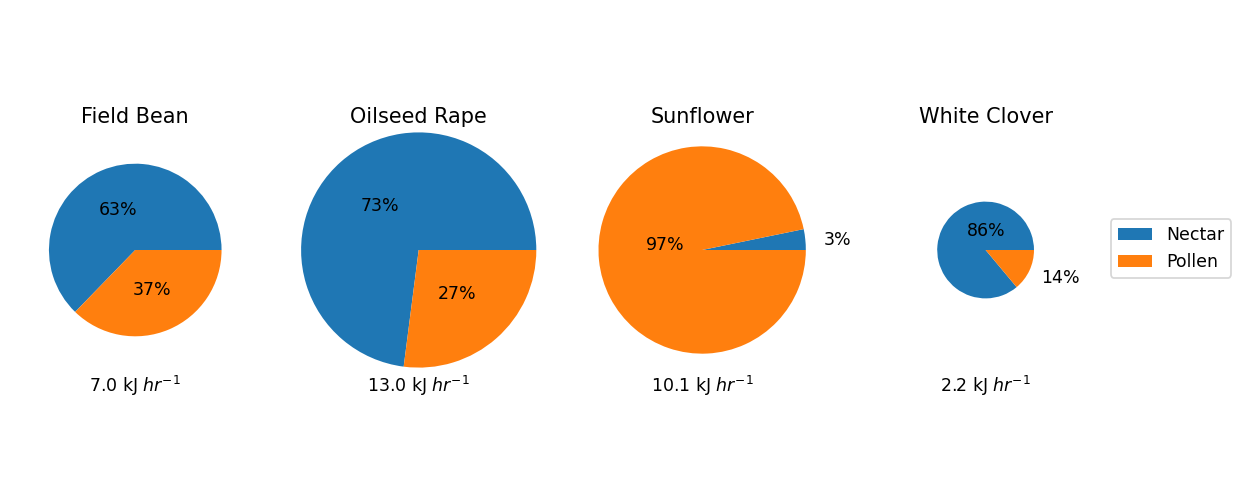

In [64]:
flowers_nectar_per_hour = [4370.573782,	9450,	326.6964122,	1855.214724]
flowers_pollen_per_hour = [2595.630252,	3502.040816,	9787.072243,	300.0349691]

flowers_total_energy = [7.0, 13.0, 10.1, 2.2]

#total energy available per flower, in kJ to 1 dp, per hour to one foraging bee
c = [round(((a + b)/1000), 1) for a,b, in zip(flowers_nectar_per_hour, flowers_pollen_per_hour)]

print(c)


flowername = ["Field Bean", "Oilseed Rape", "Sunflower",  "White Clover"]
flowername = ["Field Bean","Oilseed Rape", "Sunflower", "White Clover"]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(10,4))
for i in range(len(flowers_pollen_per_hour)):
    a = [flowers_nectar_per_hour[i], flowers_pollen_per_hour[i]]

    if i == 0:
        ax1.pie(a, autopct='%1.0f%%', pctdistance=0.5, radius = 0.35*np.sqrt(flowers_total_energy[i]))
        ax1.set_title(flowername[i])
        ax1.set_xlabel("7.0 kJ $hr^{-1}$")
    if i == 1:
        ax2.pie(a, autopct='%1.0f%%', pctdistance=0.5, radius = 0.35*np.sqrt(flowers_total_energy[i]))
        ax2.set_title(flowername[i])
        ax2.set_xlabel("13.0 kJ $hr^{-1}$")
    if i == 2:
        ax3.pie(a, pctdistance=0.5, radius = 0.35*np.sqrt(flowers_total_energy[i]))
        ax3.set_title(flowername[i])
        ax3.set_xlabel("10.1 kJ $hr^{-1}$")
        ax3.text(-0.6,0.0, "97%")
        ax3.text(1.3,0.05, "3%")
    if i == 3:
        ax4.pie(a, pctdistance=0.5, radius = 0.35*np.sqrt(flowers_total_energy[i]))
        ax4.set_title(flowername[i])
        ax4.set_xlabel("2.2 kJ $hr^{-1}$")
        ax4.text(-0.2,0.15, "86%")
        ax4.text(0.6, -0.35, "14%")
plt.legend(['Nectar', "Pollen"], bbox_to_anchor = [1,0.67])
plt.tight_layout()
#fig.suptitle("Energy one bee can forage per hour", x = 0.5, y = 0.8)
#plt.savefig("scaled Figure 3a pie chart percentage nectar and pollen.svg", format = "svg",  bbox_inches='tight')


# for label, ax in axs.items():
#     ax.set_title('Normal Title', fontstyle='italic')
#     ax.set_title(label, fontfamily='serif', loc='left', fontsize='medium')


## 4a Model and equation together!

In [ ]:
#numbers for an average April day

broodtemp = 31


#array of day temps from jan to december (https://www.ncei.noaa.gov/)
#day_temp = [7, 7, 10, 13, 16, 19, 22, 21, 18, 14, 10, 7]
#night_temp = [2, 2, 3, 5, 8, 11, 13, 13, 11, 8, 5, 3]

#daylength = 12 hours

#array of daylengths in hours in 2021, from 1st of each month (https://www.timeanddate.com/sun/uk/london?month=1&year=2021)
#day_length = [7.93, 9.18, 10.92, 12.97, 14.85, 16.32, 16.53, 15.38, 13.55, 11.60, 9.63, 8.12]
#night_length = [16.07, 14.82, 13.08, 11.03, 9.15, 7.68, 7.47, 8.62, 10.45, 12.4, 14.37, 15.88]

# x = np.zeros(100)
# for i in range(len(x)):
#     #average 14 hours in april
#     x[i] = 14
    
# day_length = x   #[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
# night_length = x   #[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
# error = np.zeros(len(day_length))
# for i in range(len(error)):
#     error[i] = 4.5




#range of conductivities
h = np.arange(0, 1.1, 0.1)



e_array = []
#average energy per day one larva consumes
e_lar = 1063.1 #1700

e_lar_max = 1580
e_lar_min = 546.2

larvae = 7#np.linspace(0, 20, 1000)# 33060

A = 0.003


#fig, ax = plt.subplots()

fig, ax = plt.subplots()


#clrs = sns.color_palette("husl", 4)
#lins = ['b', 'y', 'g', 'r']#sns.color_palette("Set2", 4)
#clrs = ['b', 'g', 'y', 'r']


e_array = []
e_max = []
e_min = []
for j in range(len(h)):
 

        
  
    #temp differnce in day
    dTd = 31 - 11.5
#temp dif at night
    dTn = 31 - 0.9
    #convert hours to seconds
    dl = 60*60*14
    nl = 60*60*10

    #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
    #e = (h[j]*A[l]*((dTd*dl)+(dTn*nl)))/1000
    e = ((larvae*14*e_lar) +(18*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000

    e_array.append(e)
    
    e = ((larvae*14*e_lar_max) +(18*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000

    e_max.append(e)
    
    e = ((larvae*14*e_lar_min) +(18*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000

    e_min.append(e)

            

plt.plot(h, e_array)
plt.fill_between(h, e_max, e_min,  alpha=0.05)
 
    
# #plt.title("Optimum brood temp = 31$^o$C, E$_{larvperday}$ = 578")


# #plt.xticks(np.arange(0, 22, 2))
# #plt.yticks(np.arange(0, 45000, 5000))

# ax2.set_xlabel(r"Nest Diameter $(cm)$")


# ax1.set_ylabel("Energy required to\n thermoeregulate nest (kJ day$^{-1}$)")
     
# #plt.title("Energy required to thermoregulate a $\it B. terrestris$ \n nest with varying nest surface area")

ax.set_xlabel("Soil Thermal Conductivity ($W$ $m^{-1} K^{-1}$)")
ax.set_ylabel("Energy to run nest for 18 days (kJ)")


#import data from our 10 trials
df = pd.read_excel(r'C:\Users\jakef\Documents\Exeter\Natural Sciences\Year 4\NSCM001\21.03.2022 model data\energy.xlsx', header = None)
h_values = np.linspace(0, 1, 101)

#mean values for each conductivity
y = df.mean()
#standard deviation
std = df.std()

#y values plus stndeviation
upper = y.add(std, fill_value=0)
#yvalues minus stnddeviation
lower = y.subtract(std, fill_value=0)
display("Max std in model data: ", max(std), "Min std in model data: ", min(std))

#fig, ax = plt.subplots()

ax.plot(h_values, y, 'k', linewidth = 1)
ax.fill_between(h_values, lower, upper, color = "magenta", alpha= 0.5)
ax.legend(["Equation", "Model"], frameon = False, loc = "lower right")

plt.annotate('', xy=(h[9], e_min[9]), xytext=(h[9], e_max[9]),
            arrowprops=dict(arrowstyle='<->', color='k'))
plt.text(0.91, 180, "$e_{larmax}$ - \n $e_{larmin}$")

plt.axvline(x=(0.17), color='b', linestyle = '--')
plt.axvline(x=(0.50), color='y', linestyle = '--')
plt.axvline(x=(0.67), color='g', linestyle = '--')
plt.axvline(x=(0.74), color='r', linestyle = '--')
plt.annotate('Clay\n(0.17)', xy = (0.2, 111), xytext = (0.04, 222),color = "b")
plt.annotate('Sandy\nLoam\n(0.50)', xy = (0.35, 111), xytext = (0.36, 212),color = "y")
plt.annotate('Sandy\nClay\nLoam\n(0.67)', xy = (0.2, 111), xytext = (0.54, 200),color = "g")
plt.annotate('Loam\n(0.74)', xy = (0.2, 111), xytext = (0.76, 227), color = "r")
# plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], loc = "upper left")#bbox_to_anchor=[1, 1])
#plt.annotate('', xy=(100,100), xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
plt.savefig('Figure 4 Model and Equation h value vs energy to run nest for day days.svg', format='svg', bbox_inches = "tight")

## 4b corresponding ptot

<IPython.core.display.Javascript object>


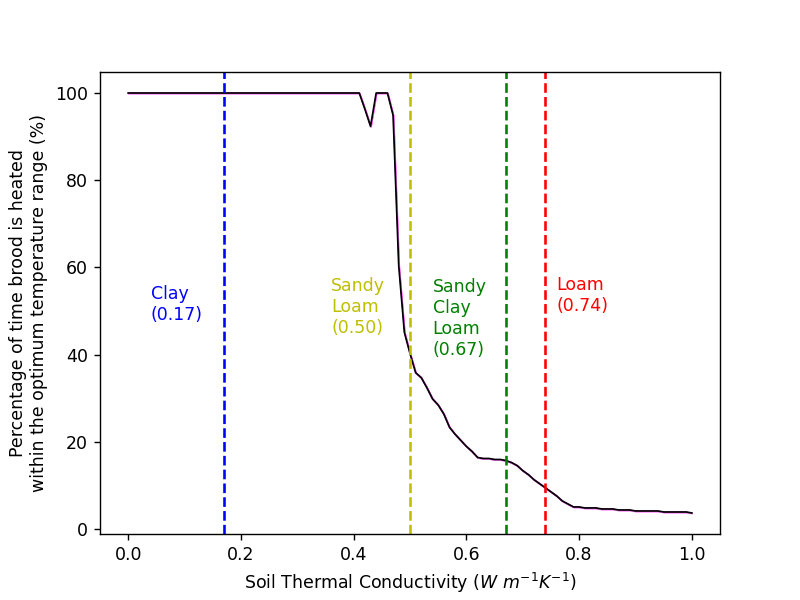

'Max std in model data: '

1.4979556132593925e-14

'Min std in model data: '

0.0

In [102]:
fig, ax = plt.subplots()

ax.set_xlabel("Soil Thermal Conductivity ($W$ $m^{-1} K^{-1}$)")
ax.set_ylabel("Percentage of time brood is heated\nwithin the optimum temperature range (%)")


#import data from our 10 trials
df = pd.read_excel(r'C:\Users\jakef\Documents\Exeter\Natural Sciences\Year 4\NSCM001\FINAL FIGURES 21.03.2022\21.03.2022 model data - Figure 4\nest success.xlsx', header = None)
h_values = np.linspace(0, 1, 101)

#mean values for each conductivity
y = df.mean()
#standard deviation
std = df.std()

#y values plus stndeviation
upper = y.add(std, fill_value=0)
#yvalues minus stnddeviation
lower = y.subtract(std, fill_value=0)
display("Max std in model data: ", max(std), "Min std in model data: ", min(std))

#fig, ax = plt.subplots()

ax.plot(h_values, y, 'k', linewidth = 1)
ax.fill_between(h_values, lower, upper, color = "magenta", alpha= 0.5)
#ax.legend(["Equation", "Model"], frameon = False, loc = "lower right")

# plt.annotate('', xy=(h[9], e_min[9]), xytext=(h[9], e_max[9]),
#             arrowprops=dict(arrowstyle='<->', color='k'))
# plt.text(0.91, 180, "$e_{larmax}$ - \n $e_{larmin}$")

plt.axvline(x=(0.17), color='b', linestyle = '--')
plt.axvline(x=(0.50), color='y', linestyle = '--')
plt.axvline(x=(0.67), color='g', linestyle = '--')
plt.axvline(x=(0.74), color='r', linestyle = '--')
plt.annotate('Clay\n(0.17)', xy = (0.2, 50), xytext = (0.04, 48),color = "b")
plt.annotate('Sandy\nLoam\n(0.50)', xy = (0.35, 50), xytext = (0.36, 45),color = "y")
plt.annotate('Sandy\nClay\nLoam\n(0.67)', xy = (0.2, 50), xytext = (0.54, 40),color = "g")
plt.annotate('Loam\n(0.74)', xy = (0.2, 50), xytext = (0.76, 50), color = "r")
# plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], loc = "upper left")#bbox_to_anchor=[1, 1])
#plt.annotate('', xy=(100,100), xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
plt.savefig('Figure 4 h balue vs ptot.svg', format='svg', bbox_inches = "tight")

## 4b LHS 2021 conditions

In [ ]:
#numbers for an average April day

broodtemp = 31
#Met Office data
day_temp = [5.7,7.9,10.7,11.5,14.4,20,22.1,19.8,20.1,15.1,10.5,8.6]
night_temp = [0.2, 1.7, 3.3, 0.9, 5.5, 10.7, 12.9, 11.8, 11.4, 8.5, 4.1, 3.6]
#day lengths from met office
day_length = [8.417,	10.83	,11.9,	13.93,	15.683,	16.683,	16.25,	14.683,	12.733,	10.783,	8.95,	7.933]
night_length = [15.583,	13.17,	12.1,	10.07,	8.317,	7.317,	7.75,	9.317,	11.267,	13.217,	15.05,	16.067]



#array of day temps from jan to december (https://www.ncei.noaa.gov/)
#day_temp = [7, 7, 10, 13, 16, 19, 22, 21, 18, 14, 10, 7]
#night_temp = [2, 2, 3, 5, 8, 11, 13, 13, 11, 8, 5, 3]


day_minus_night = []

#the difference between day and night temp
for i in range(len(day_temp)):
    a = day_temp[i] - night_temp[i]
    day_minus_night.append(a)


#day lengths from met office
day_length = [8.417,	10.83	,11.9,	13.93,	15.683,	16.683,	16.25,	14.683,	12.733,	10.783,	8.95,	7.933]
night_length = [15.583,	13.17,	12.1,	10.07,	8.317,	7.317,	7.75,	9.317,	11.267,	13.217,	15.05,	16.067]

#array of daylengths in hours in 2021, from 1st of each month (https://www.timeanddate.com/sun/uk/london?month=1&year=2021)

#day_length = [7.93, 9.18, 10.92, 12.97, 14.85, 16.32, 16.53, 15.38, 13.55, 11.60, 9.63, 8.12]
#night_length = [16.07, 14.82, 13.08, 11.03, 9.15, 7.68, 7.47, 8.62, 10.45, 12.4, 14.37, 15.88]


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ]
#delta t day

#h values for clay, sandy loam, sandy clay loam and loam
h = [0.17, 0.5, 0.67, 0.74]
A = 0.003
e_array = []
#energy per day one larva consumes
e_lar = 1063.1 #1700
#e_worker = 4330.7 
#e_queen = 13066.75
larvae = 7
#n_queen = 1
#n_workers = 5

fig, ax = plt.subplots()

for j in range(len(h)):
    #A = hA/h[j]
    flowers = []
 
  
    e_array = []

    for l in range(len(day_temp)):
        dTd = 31 - day_temp[l]
        dTn = 31 - night_temp[l]
        #convert hours to seconds
        dl = 60*60*day_length[l]
        nl = 60*60*night_length[l]

        ##only takes into account energy for heating nest and feeding larvae
        e = ((larvae*14*e_lar) +(18*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000
        ##when nest heated by one queen
        #e = ((larvae*14*e_lar) + (n_queen*18*e_queen) +(18*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000
        ##when nest heated by 5 workers
        #e = ((larvae*14*e_lar) + (n_workers*18*e_worker) +(18*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000



        e_array.append(e)
    plt.plot(months, e_array)

    flowers.append(e)


ax.set_xlabel("Month")
ax.set_ylabel("Energy to run nest for 18 days (kJ)")
#line at 180kJ
plt.axhline(y=(180), color='k', linestyle = '--')

plt.title("2021 Conditions") #\n Optimum brood temp = 31$^o$C, E$_{larvperday}$ = 578")
ax.set_ylim(105, 205)


#plt.xticks(np.arange(0, 22, 2))
#plt.yticks(np.arange(0, 45000, 5000))
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], bbox_to_anchor=[1.5, 0.85])




ax2=ax.twinx()
ax2.bar(months, night_temp, alpha = 0.1)
ax2.bar(months, day_minus_night, alpha = 0.1, bottom = night_temp)
#ax2.legend(["Night", "Day"], title = "Temperature", bbox_to_anchor = [1.345, 0.55])
#ax2.set_ylabel("Average Monthly Temperature ($^{o}C$)")
ax2.set_yticks([])

ax2.set_ylim([0, 26])
#plt.savefig('Figure 4a LHS.svg', format='svg')


plt.savefig('Figure 4 2021.svg', format='svg', bbox_inches='tight')

## 4b RHS 2070 temperature

In [ ]:
#numbers for an average April day

broodtemp = 31
#Met Office data
day_temp = [5.7,7.9,10.7,11.5,14.4,20,22.1,19.8,20.1,15.1,10.5,8.6]
night_temp = [0.2, 1.7, 3.3, 0.9, 5.5, 10.7, 12.9, 11.8, 11.4, 8.5, 4.1, 3.6]
#day lengths from met office
day_length = [8.417,	10.83	,11.9,	13.93,	15.683,	16.683,	16.25,	14.683,	12.733,	10.783,	8.95,	7.933]
night_length = [15.583,	13.17,	12.1,	10.07,	8.317,	7.317,	7.75,	9.317,	11.267,	13.217,	15.05,	16.067]



# #day temos
# day_temp = [7, 7, 10, 13, 16, 19, 22, 21, 18, 14, 10, 7]
# night_temp = [2, 2, 3, 5, 8, 11, 13, 13, 11, 8, 5, 3]

#error above
day_temp_up = []
night_temp_up = []
#error below
day_temp_do = []
night_temp_do = []

#predicted temperature changes for each month

winter_temp_change = 2.45
spring_temp_change = 2.8
summer_temp_change = 3.15
autumn_temp_change = 2.8

#errors in predicted values

winter_error = 1.75
spring_error = 2.0
summer_error = 2.25
autumn_error = 2.0



for i in range(len(day_temp)):
    #jan,feb
    if i in range(0, 2):
        #increase temperatuer by predicted amount
        day_temp[i] += winter_temp_change
        night_temp[i] += winter_temp_change
        #error above
        day_temp_up.append(day_temp[i] + winter_error)
        night_temp_up.append(night_temp[i] + winter_error)
        #error below
        day_temp_do.append(day_temp[i] - winter_error)
        night_temp_do.append(night_temp[i] - winter_error)

    #mar, aprl, may
    if i in range(2, 5):
        day_temp[i] += spring_temp_change 
        night_temp[i] += spring_temp_change 
        day_temp_up.append(day_temp[i] + spring_error)
        night_temp_up.append(night_temp[i] + spring_error)
        #error below
        day_temp_do.append(day_temp[i] - spring_error)
        night_temp_do.append(night_temp[i] - spring_error)
        
    #jun, july, august
    if i in range(5, 8):
        day_temp[i] +=  summer_temp_change
        night_temp[i] +=  summer_temp_change
        day_temp_up.append(day_temp[i] + summer_error)
        night_temp_up.append(night_temp[i] + summer_error)
        #error below
        day_temp_do.append(day_temp[i] - summer_error)
        night_temp_do.append(night_temp[i] - summer_error)
    #sept, oct, nov
    if i in range(8, 11):
        day_temp[i] += autumn_temp_change
        night_temp[i] += autumn_temp_change
        day_temp_up.append(day_temp[i] + autumn_error)
        night_temp_up.append(night_temp[i] + autumn_error)
        #error below
        day_temp_do.append(day_temp[i] - autumn_error)
        night_temp_do.append(night_temp[i] - autumn_error)
    #dec
    if i == 11:
        day_temp[i] += winter_temp_change
        night_temp[i] += winter_temp_change
        #error above
        day_temp_up.append(day_temp[i] + winter_error)
        night_temp_up.append(night_temp[i] + winter_error)
        #error below
        day_temp_do.append(day_temp[i] - winter_error)
        night_temp_do.append(night_temp[i] - winter_error)




day_minus_night = []

#the difference between day and night temp
for i in range(len(day_temp)):
    a = day_temp[i] - night_temp[i]
    day_minus_night.append(a)

# #array of daylengths in hours in 2021, from 1st of each month (https://www.timeanddate.com/sun/uk/london?month=1&year=2021)
# day_length = [7.93, 9.18, 10.92, 12.97, 14.85, 16.32, 16.53, 15.38, 13.55, 11.60, 9.63, 8.12]
# night_length = [16.07, 14.82, 13.08, 11.03, 9.15, 7.68, 7.47, 8.62, 10.45, 12.4, 14.37, 15.88]


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ]
#delta t day

#h values for clay, sandy loam, sandy clay loam and loam
h = [0.17, 0.5, 0.67, 0.74]

A = 0.003

#average energy consumed per day by larvae
e_lar = 1063.1 #1700
#n larvae
#larvae = 7


e_array = []


larvae = [7]#np.linspace(0, 20, 1000)# 33060


fig, ax = plt.subplots()

for j in range(len(h)):

    for i in range(len(larvae)):
        e_array = []
        err_above = []
        err_below = []
        
        
        for l in range(len(day_temp)):
            dTd = 31 - day_temp[l]
            dTn = 31 - night_temp[l]
            #convert hours to seconds
            dl = 60*60*day_length[l]
            nl = 60*60*night_length[l]

            #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
            e = ((larvae[i]*14*e_lar) +(4*(h[j]*A*((dTd*dl)+(dTn*nl))))+(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000
            
            e_array.append(e)
            
            #upper error
            dTd = 31 - day_temp_up[l]
            dTn = 31 - night_temp_up[l]
            #convert hours to seconds
            dl = 60*60*day_length[l]
            nl = 60*60*night_length[l]
           
            errorabove = ((larvae[i]*14*e_lar) +(4*(h[j]*A*((dTd*dl)+(dTn*nl))))+(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000
            err_above.append(errorabove)
   
            
            #lower error
            dTd = 31 - day_temp_do[l]
            dTn = 31 - night_temp_do[l]
            #convert hours to seconds
            dl = 60*60*day_length[l]
            nl = 60*60*night_length[l]
           
            errorbelow = ((larvae[i]*14*e_lar) +(4*(h[j]*A*((dTd*dl)+(dTn*nl))))+(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/1000
            err_below.append(errorbelow)
            
            
        plt.plot(months, e_array)
        plt.fill_between(months, err_above, err_below, alpha=0.1)
        
        
        
      

ax.set_xlabel("Month")
#ax.set_ylabel("Energy to run nest for 18 days (kJ)")
#plt.legend(["8 larva", "16 larvae", "30 larvae"], bbox_to_anchor=[1, 1])
plt.title("2070 High Emissions Scenario - Temperature Effects")# \n Optimum brood temp = 31$^o$C, E$_{larvperday}$ = 578")
plt.axhline(y=(180), color='k', linestyle = '--')
plt.ylim(105, 205)

#plt.xticks(np.arange(0, 22, 2))
#plt.yticks(np.arange(0, 45000, 5000))
plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"],title ="Soil Type", bbox_to_anchor=[1.5, 0.85])

ax2=ax.twinx()
ax2.bar(months, night_temp, alpha = 0.1)
ax2.bar(months, day_minus_night, alpha = 0.1, bottom = night_temp)
ax2.legend(["Night", "Day"], title = "Temperature", bbox_to_anchor = [1.345, 0.45])
ax2.set_ylabel("Average Monthly Temperature ($^{o}C$)")
ax2.set_ylim([0, 26])
ax.set_yticks([])

plt.savefig('Figure 4 2070 Temp.svg', format='svg',bbox_inches='tight')

## 4c LHS 2070 moisture

In [ ]:
#numbers for an average April day

broodtemp = 31


#Met Office data
day_temp = [5.7,7.9,10.7,11.5,14.4,20,22.1,19.8,20.1,15.1,10.5,8.6]
night_temp = [0.2, 1.7, 3.3, 0.9, 5.5, 10.7, 12.9, 11.8, 11.4, 8.5, 4.1, 3.6]
#day lengths from met office
day_length = [8.417,	10.83	,11.9,	13.93,	15.683,	16.683,	16.25,	14.683,	12.733,	10.783,	8.95,	7.933]
night_length = [15.583,	13.17,	12.1,	10.07,	8.317,	7.317,	7.75,	9.317,	11.267,	13.217,	15.05,	16.067]



# day_temp = [7, 7, 10, 13, 16, 19, 22, 21, 18, 14, 10, 7]
# night_temp = [2, 2, 3, 5, 8, 11, 13, 13, 11, 8, 5, 3]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ]
#delta t day

#h values for clay, sandy loam, sandy clay loam and loam
h = [0.17, 0.5, 0.67, 0.74]


A = 0.003
e_array = []
#energy per day one larva consumes
e_lar = 1063.1 #1700
#e_worker = 4330.7 
#e_queen = 13066.75
larvae = 7


larvae = [7]#np.linspace(0, 20, 1000)# 33060
#Eflower = 5

fig, ax = plt.subplots()

for j in range(len(h)):
    #A = hA/h[j]
    flowers = []
 
    for i in range(len(larvae)):
        e_array = []
        err_above = []
        err_below = []
        
        
        for l in range(len(day_temp)):
            dTd = 31 - day_temp[l]
            dTn = 31 - night_temp[l]
            #convert hours to seconds
            dl = 60*60*day_length[l]
            nl = 60*60*night_length[l]
            
            #if winter
            if l in range(0,2):
                #h has icnreased by 17%
                h_n = h[j]*1.17
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error
                h_n = h[j]*0.99
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
                
                #lower error
                h_n = h[j]*1.35
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
                
                
            #if spring 
            if l in range(2, 5):
                #h has decreased by 2.75%
                h_n = h[j]*0.9725
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error
                h_n = h[j]*0.76
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
                #lower error
                h_n = h[j]*1.185
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
            #if summer 
            if l in range(5,8):
                #h has decreased by 22.5%
                h_n = h[j]*0.775
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error
                h_n = h[j]*0.53
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
                
                    #lower error
                h_n = h[j]*1.02
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
             #if autumn 
            if l in range(8, 11):
                #h has decreased by 2.75%
                h_n = h[j]*0.9725
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error
                h_n = h[j]*0.76
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
                  #lower error
                h_n = h[j]*1.185
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
                
            #if winter
            if l == 11:
                #h has icnreased by 17%
                h_n = h[j]*1.17
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error
                h_n = h[j]*0.99
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
                #lower error
                h_n = h[j]*1.35
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
 
            
        plt.plot(months, e_array)
        plt.fill_between(months, err_above, err_below, alpha=0.1)
        
        
        
        
        flowers.append(e)

#    plt.plot(larvae, flowers)
plt.xlabel("Month")
plt.ylabel("Energy to run nest for 18 days (kJ)")
plt.axhline(y=(180), color='k', linestyle = '--')
#plt.legend(["8 larva", "16 larvae", "30 larvae"], bbox_to_anchor=[1.46, 1])
plt.title("2070 High Emissions Scenario - Moisture Effects")# \n Optimum brood temp = 31$^o$C, E$_{larvperday}$ = 578")

plt.ylim(105, 240)

#plt.xticks(np.arange(0, 22, 2))
#plt.yticks(np.arange(0, 45000, 5000))
#plt.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], title = "Soil Type", bbox_to_anchor=[1.56, 0.95])


# props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# # place a text box in upper left in axes coords
# text = "Moisture Change\nSpring:  -2.75 $\pm$ 21.25% \nSummer: -22.50 $\pm$ 24.5% \nAutumn:  -2.75 $\pm$ 21.25%\nWinter: +17 $\pm$ 18%"
# plt.text(1.13, 0.45, text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox = props)
#props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
#text = "Moisture Change\nSpring:  -2.75 $\pm$ 21.25% \nSummer: -22.50 $\pm$ 24.5% \nAutumn:  -2.75 $\pm$ 21.25%\nWinter: +17 $\pm$ 18%"
#plt.text(1.13, 0.3, text, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox = props)


plt.savefig('Figure 4 2070 Moisture.svg', format='svg', bbox_inches='tight')

## 4c RHS 2070 moisture and temperature

In [ ]:
#numbers for an average April day

broodtemp = 31



#Met Office data
day_temp = [5.7,7.9,10.7,11.5,14.4,20,22.1,19.8,20.1,15.1,10.5,8.6]
night_temp = [0.2, 1.7, 3.3, 0.9, 5.5, 10.7, 12.9, 11.8, 11.4, 8.5, 4.1, 3.6]
#day lengths from met office
day_length = [8.417,	10.83	,11.9,	13.93,	15.683,	16.683,	16.25,	14.683,	12.733,	10.783,	8.95,	7.933]
night_length = [15.583,	13.17,	12.1,	10.07,	8.317,	7.317,	7.75,	9.317,	11.267,	13.217,	15.05,	16.067]



# #day temos
# day_temp = [7, 7, 10, 13, 16, 19, 22, 21, 18, 14, 10, 7]
# night_temp = [2, 2, 3, 5, 8, 11, 13, 13, 11, 8, 5, 3]

#error above
day_temp_up = []
night_temp_up = []
#error below
day_temp_do = []
night_temp_do = []

#predicted temperature changes for each month

winter_temp_change = 2.45
spring_temp_change = 2.8
summer_temp_change = 3.15
autumn_temp_change = 2.8

#errors in predicted values

winter_error = 1.75
spring_error = 2.0
summer_error = 2.25
autumn_error = 2.0



for i in range(len(day_temp)):
    #jan,feb
    if i in range(0, 2):
        #increase temperatuer by predicted amount
        day_temp[i] += winter_temp_change
        night_temp[i] += winter_temp_change
        #error above
        day_temp_up.append(day_temp[i] + winter_error)
        night_temp_up.append(night_temp[i] + winter_error)
        #error below
        day_temp_do.append(day_temp[i] - winter_error)
        night_temp_do.append(night_temp[i] - winter_error)

    #mar, aprl, may
    if i in range(2, 5):
        day_temp[i] += spring_temp_change 
        night_temp[i] += spring_temp_change 
        day_temp_up.append(day_temp[i] + spring_error)
        night_temp_up.append(night_temp[i] + spring_error)
        #error below
        day_temp_do.append(day_temp[i] - spring_error)
        night_temp_do.append(night_temp[i] - spring_error)
        
    #jun, july, august
    if i in range(5, 8):
        day_temp[i] +=  summer_temp_change
        night_temp[i] +=  summer_temp_change
        day_temp_up.append(day_temp[i] + summer_error)
        night_temp_up.append(night_temp[i] + summer_error)
        #error below
        day_temp_do.append(day_temp[i] - summer_error)
        night_temp_do.append(night_temp[i] - summer_error)
    #sept, oct, nov
    if i in range(8, 11):
        day_temp[i] += autumn_temp_change
        night_temp[i] += autumn_temp_change
        day_temp_up.append(day_temp[i] + autumn_error)
        night_temp_up.append(night_temp[i] + autumn_error)
        #error below
        day_temp_do.append(day_temp[i] - autumn_error)
        night_temp_do.append(night_temp[i] - autumn_error)
    #dec
    if i == 11:
        day_temp[i] += winter_temp_change
        night_temp[i] += winter_temp_change
        #error above
        day_temp_up.append(day_temp[i] + winter_error)
        night_temp_up.append(night_temp[i] + winter_error)
        #error below
        day_temp_do.append(day_temp[i] - winter_error)
        night_temp_do.append(night_temp[i] - winter_error)





day_minus_night = []

#the difference between day and night temp
for i in range(len(day_temp)):
    a = day_temp[i] - night_temp[i]
    day_minus_night.append(a)

#array of daylengths in hours in 2021, from 1st of each month (https://www.timeanddate.com/sun/uk/london?month=1&year=2021)
# day_length = [7.93, 9.18, 10.92, 12.97, 14.85, 16.32, 16.53, 15.38, 13.55, 11.60, 9.63, 8.12]
# night_length = [16.07, 14.82, 13.08, 11.03, 9.15, 7.68, 7.47, 8.62, 10.45, 12.4, 14.37, 15.88]





#day_temp = [7, 7, 10, 13, 16, 19, 22, 21, 18, 14, 10, 7]
#night_temp = [2, 2, 3, 5, 8, 11, 13, 13, 11, 8, 5, 3]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ]
#delta t day

#h values for clay, sandy loam, sandy clay loam and loam
h = [0.17, 0.5, 0.67, 0.74]

A = 0.003

e_lar = 1063.1 #1700


e_array = []
#energy per day one larva consumes


larvae = [7]#np.linspace(0, 20, 1000)# 33060
#Eflower = 5

fig, ax = plt.subplots()

for j in range(len(h)):
    #A = hA/h[j]
    flowers = []
 
    for i in range(len(larvae)):
        e_array = []
        err_above = []
        err_below = []
        
        
        for l in range(len(day_temp)):
            dTd = 31 - day_temp[l]
            dTn = 31 - night_temp[l]
            #convert hours to seconds
            dl = 60*60*day_length[l]
            nl = 60*60*night_length[l]
        
                    
                    
            
            #if winter
            if l in range (0, 2):
                
                dTd = 31 - day_temp[l]
                dTn = 31 - night_temp[l]
                #h has icnreased by 17%
                h_n = h[j]*1.17
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error (temp difference will be largest when temps are lowest, giving most energy needed to run nest)
                dTd = 31 - day_temp_do[l]
                dTn = 31 - night_temp_do[l]
                
                #upper error
                h_n = h[j]*1.35
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
                
                
                #lower error (temp difference smallest when temps are highest, giving least energy to run nest)
                dTd = 31 - day_temp_up[l]
                dTn = 31 - night_temp_up[l]
                #lower error
                h_n = h[j]*0.99
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
            #if spring 
            if l in range (2,5):
                
                dTd = 31 - day_temp[l]
                dTn = 31 - night_temp[l]
                
                #h has decreased by 2.75%
                h_n = h[j]*0.9725
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error (temp difference will be largest when temps are lowest, giving most energy needed to run nest)
                dTd = 31 - day_temp_do[l]
                dTn = 31 - night_temp_do[l]
                
                #upper error
                h_n = h[j]*1.185
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
                
                
                #lower error (temp difference smallest when temps are highest, giving least energy to run nest)
                dTd = 31 - day_temp_up[l]
                dTn = 31 - night_temp_up[l]
                #ulower error
                h_n = h[j]*0.76
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
                  
                
                
                  
                
                
           
            #if summer 
            if l in range(5,8):
                dTd = 31 - day_temp[l]
                dTn = 31 - night_temp[l]
                #h has decreased by 22.5%
                h_n = h[j]*0.775
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error (temp difference will be largest when temps are lowest, giving most energy needed to run nest)
                dTd = 31 - day_temp_do[l]
                dTn = 31 - night_temp_do[l]
                #upper error
                h_n = h[j]*1.02
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
                
                
                
                #lower error (temp difference smallest when temps are highest, giving least energy to run nest)
                dTd = 31 - day_temp_up[l]
                dTn = 31 - night_temp_up[l]
                #lower error
                h_n = h[j]*0.53
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
             
             #if autumn 
            if l in range(8,11):
                
                dTd = 31 - day_temp[l]
                dTn = 31 - night_temp[l]
                #h has decreased by 2.75%
                h_n = h[j]*0.9725
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                #upper error (temp difference will be largest when temps are lowest, giving most energy needed to run nest)
                dTd = 31 - day_temp_do[l]
                dTn = 31 - night_temp_do[l]
                
                #upper error
                h_n = h[j]*1.185
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
                
                
                #lower error (temp difference smallest when temps are highest, giving least energy to run nest)
                dTd = 31 - day_temp_up[l]
                dTn = 31 - night_temp_up[l]
                
                #lower error
                h_n = h[j]*0.76
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                
            #if winter
            if l == 11:
                dTd = 31 - day_temp[l]
                dTn = 31 - night_temp[l]
                #h has icnreased by 17%
                h_n = h[j]*1.17
                #n_larv = ((n_flower[i]*Eflower)-(4*(h[j]*A*((dTd*dl)+(dTn*nl))))-(14*(h[j]*A*((dTd*dl)+(dTn*nl)))))/(e_lar*14)
                e = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                e_array.append(e)
                
                  #upper error (temp difference will be largest when temps are lowest, giving most energy needed to run nest)
                dTd = 31 - day_temp_do[l]
                dTn = 31 - night_temp_do[l]
                
                 #upper error
                h_n = h[j]*1.35
                errorbelow = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_below.append(errorbelow)
                
                
                   #lower error (temp difference smallest when temps are highest, giving least energy to run nest)
                dTd = 31 - day_temp_up[l]
                dTn = 31 - night_temp_up[l]
                #upper error
                h_n = h[j]*0.99
                errorabove = ((larvae[i]*14*e_lar) +(4*(h_n*A*((dTd*dl)+(dTn*nl))))+(14*(h_n*A*((dTd*dl)+(dTn*nl)))))/1000
                err_above.append(errorabove)
                

            
        plt.plot(months, e_array)
        plt.fill_between(months, err_below, err_above, alpha=0.1)
        
        
        
        
        flowers.append(e)

#    plt.plot(larvae, flowers)
ax.set_xlabel("Month")
#ax.set_ylabel("Energy to run nest for 18 days (kJ)")

#plt.legend(["8 larva", "16 larvae", "30 larvae"], bbox_to_anchor=[1, 1])
plt.title("2070 High Emissions Scenario \n Moisture and Temperature Effects")# \n Optimum brood temp = 31$^o$C, E$_{larvperday}$ = 578")
ax.set_ylim(105, 240)
plt.axhline(y=(180), color='k', linestyle = '--')
#ax.tick_params('y', which = "both", left = False, labelleft = False)
#plt.xticks(np.arange(0, 22, 2))
#plt.yticks(np.arange(0, 45000, 5000))
ax.legend(["Clay", "Sandy Loam", "Sandy Clay Loam", "Loam"], title = "Soil Type", bbox_to_anchor=[1.5, 1.0])


props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
text = "Moisture Change\nSpring:  -2.75 $\pm$ 21.25% \nSummer: -22.50 $\pm$ 24.5% \nAutumn:  -2.75 $\pm$ 21.25%\nWinter: +17 $\pm$ 18%"
plt.text(1.13, 0.3, text, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox = props)

ax2=ax.twinx()
ax2.bar(months, night_temp, alpha = 0.1)
ax2.bar(months, day_minus_night, alpha = 0.1, bottom = night_temp)
ax2.legend(["Night", "Day"], title = "Temperature", bbox_to_anchor = [1.345, 0.6])
ax2.set_ylabel("Average Monthly Temperature ($^{o}C$)")
ax2.set_ylim([0, 26])
ax.set_yticks([])


plt.savefig('Figure 4 2070 Temp and moisture.svg', format='svg', bbox_inches='tight')